# Project: Filling the Knowledge Gap Around Cetacean Population, Entanglement and Mortality Associated with Small-scale Fisheries in Pakistan

# Activity 1.1: Questionnaire-based rapid survey assessment carried out in Gwadar, Pasni, and Kharo Chan to identify six fishermen (observers) for data collection on entanglement and mortality during their fishing trips for a year (excluding June and July)

1.1.1 Selection of observers from 3 main villages along the coastline, collect information on the gillnet fisheries and cetaceans interactions


In [1]:
import pandas as pd
import numpy as np

import io
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import seaborn as sns

# External Factors Affected Survey and Fishing Season 

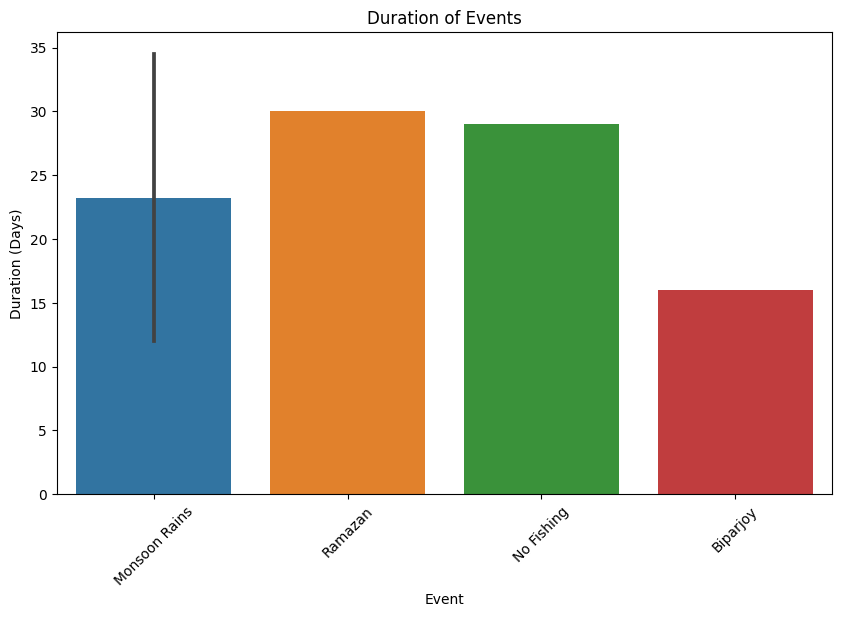

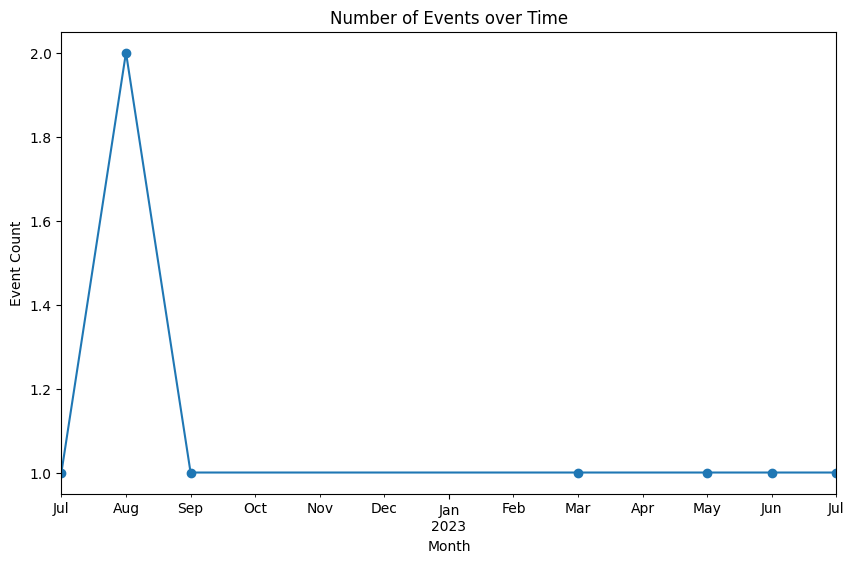

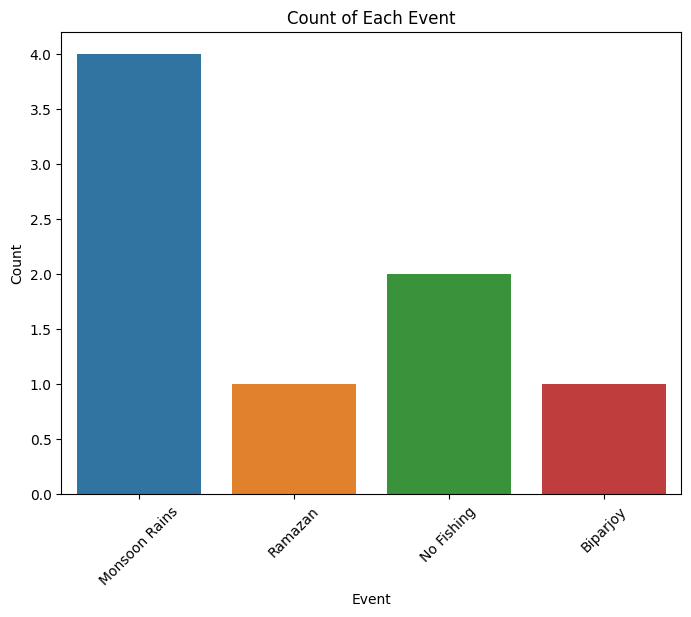

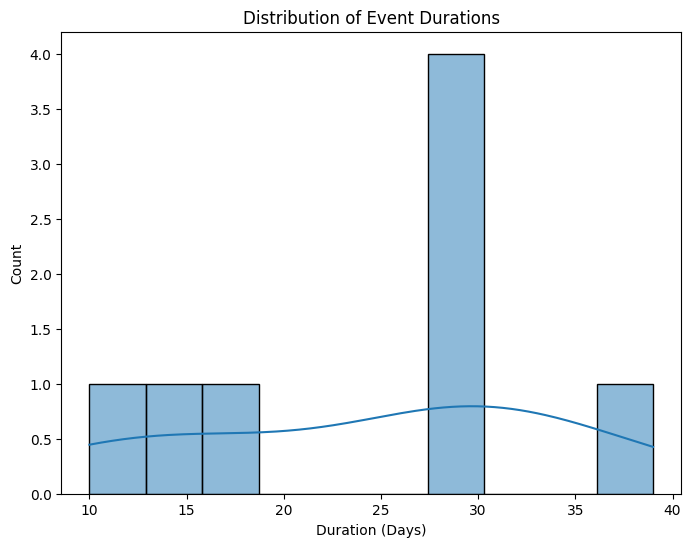

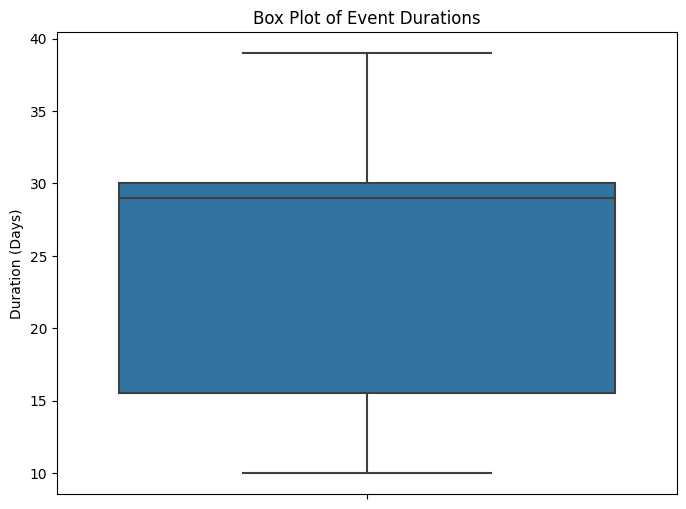

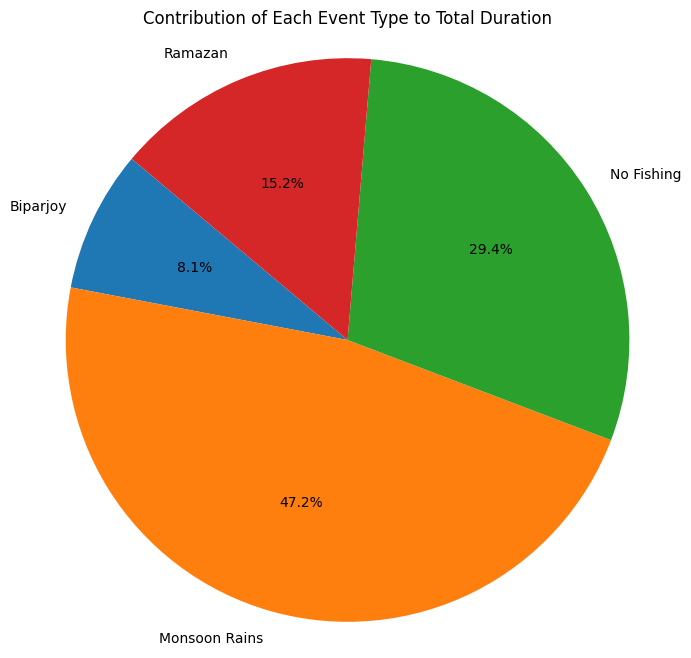

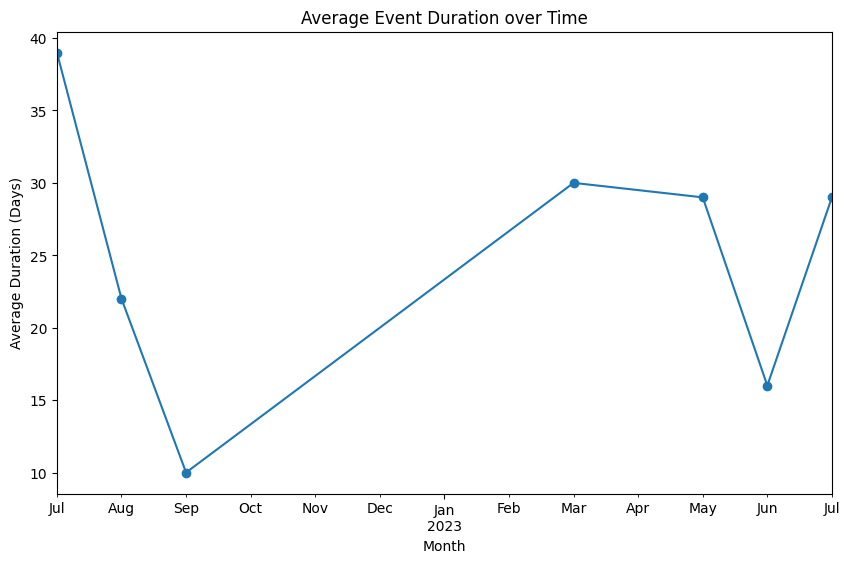

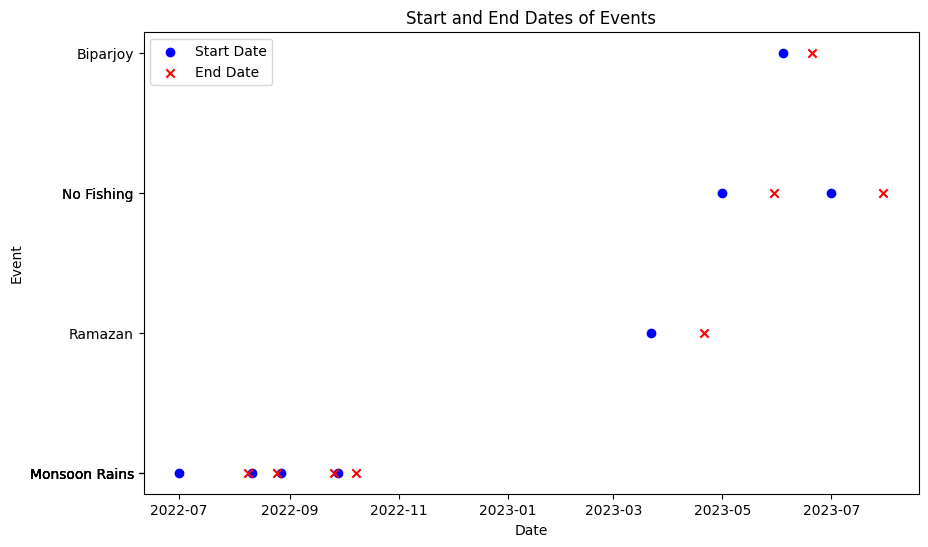

In [2]:

# Load the data into a DataFrame
data = """
Event\tStart_Date\tEnd_Date
Monsoon Rains\t1-Jul-22\t9-Aug-22
Monsoon Rains\t11-Aug-22\t25-Aug-22
Monsoon Rains\t27-Aug-22\t26-Sep-22
Monsoon Rains\t28-Sep-22\t8-Oct-22
Ramazan\t22-Mar-23\t21-Apr-23
No Fishing\t1-May-23\t30-May-23
Biparjoy\t4-Jun-23\t20-Jun-23
No Fishing\t1-Jul-23\t30-Jul-23
"""

df = pd.read_csv(io.StringIO(data), sep='\t')

# Step 1: Convert date columns to the appropriate data type
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d-%b-%y')
df['End_Date'] = pd.to_datetime(df['End_Date'], format='%d-%b-%y')

# Step 2: Data manipulations
df['Duration'] = df['End_Date'] - df['Start_Date']
df['Duration'] = df['Duration'].apply(lambda x: x.days)  # Convert duration to days

# Step 3: Visualization using matplotlib and seaborn
plt.figure(figsize=(10, 6))

# Plot 1: Duration of Events
sns.barplot(x='Event', y='Duration', data=df)
plt.xticks(rotation=45)
plt.xlabel('Event')
plt.ylabel('Duration (Days)')
plt.title('Duration of Events')
plt.show()

# Plot 2: Number of Events per Month
plt.figure(figsize=(10, 6))
df['Month'] = df['Start_Date'].dt.to_period('M')
event_count = df.groupby('Month')['Event'].count()
event_count.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.title('Number of Events over Time')
plt.show()

# Step 4: Additional Visualizations

# Count of each type of event
plt.figure(figsize=(8, 6))
sns.countplot(x='Event', data=df)
plt.xticks(rotation=45)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Count of Each Event')
plt.show()

# Histogram of event durations
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins=10, kde=True)
plt.xlabel('Duration (Days)')
plt.ylabel('Count')
plt.title('Distribution of Event Durations')
plt.show()

# Box plot of event durations
plt.figure(figsize=(8, 6))
sns.boxplot(y='Duration', data=df)
plt.ylabel('Duration (Days)')
plt.title('Box Plot of Event Durations')
plt.show()

# Step 5: Advanced Data Analysis and Visualization

# Calculate the total duration for each event type
total_duration_by_event = df.groupby('Event')['Duration'].sum().reset_index()

# Pie chart to show the contribution of each event type to the total duration
plt.figure(figsize=(8, 8))
plt.pie(total_duration_by_event['Duration'], labels=total_duration_by_event['Event'], autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Each Event Type to Total Duration')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Line plot to show the trend of event durations over time
plt.figure(figsize=(10, 6))
event_duration_over_time = df.groupby('Month')['Duration'].mean()
event_duration_over_time.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Duration (Days)')
plt.title('Average Event Duration over Time')
plt.show()

# Scatter plot to show the start and end dates of events
plt.figure(figsize=(10, 6))
plt.scatter(df['Start_Date'], df['Event'], color='blue', label='Start Date', marker='o')
plt.scatter(df['End_Date'], df['Event'], color='red', label='End Date', marker='x')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Event')
plt.title('Start and End Dates of Events')
plt.yticks(df['Event'])
plt.show()


# Rapid assessment Sruvey of the face to face questionnaire based random sampling on the cetacean bycatch condcuted from 150 fishermen from 3 main villages of Pakistan

The dependent and independent variables of the face-to-face survey of the fishermen identified as follows:

Dependent Variables:
1. Turtle_No: Number of turtles encountered/sighted
2. Dolphin_No: Number of dolphins encountered/sighted
3. Bycatch_categories: Categories of bycatch species encountered/sighted


In [3]:
# Load the dataset
survey_data = pd.read_csv("Survey_F2F_Cetacean_1.1.csv")

In [4]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 98 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   S.no                                      571 non-null    float64
 1   Recorder                                  571 non-null    object 
 2   Respondent                                571 non-null    float64
 3   Date_Interview_0                          561 non-null    object 
 4   Date_Interview                            561 non-null    object 
 5   Time_Start                                556 non-null    object 
 6   Time_End                                  556 non-null    object 
 7   Time                                      556 non-null    object 
 8   FishermanID                               109 non-null    float64
 9   Village                                   557 non-null    object 
 10  Village_No                            

In [5]:
survey_data.columns

Index(['S.no', 'Recorder', 'Respondent', 'Date_Interview_0', 'Date_Interview',
       'Time_Start', 'Time_End', 'Time', 'FishermanID', 'Village',
       'Village_No', 'District', 'Latitute', 'Longitude', 'FishermanID2',
       'Father_Name', 'Age', 'Education_Level', 'Education_Level_1',
       'Language', 'Occupation', 'Fisheries_Association_Yrs', 'Current role',
       'Fisheries_Type', 'Fisheries_Type_Num', 'Boat_Sizeft', 'Fishing_Time',
       'Fishing_Oper_hh/day', 'Category_Gear', 'Category_Gear_Num',
       'Gear_Type', 'Unnamed: 31', 'Threadline', 'Months_Gear_Used',
       'Gear_Setting', 'Gear_Setting_Num', 'Net_Colour_1', 'Net_Colour_2',
       'Gear_Length_(km)_OLD', 'Gear_Length_(km)', 'Width (meters)',
       'Mesh_Size (Millimeters/ Ungal)', 'Float_Type', 'Float_Used',
       'Sinkers_Type', 'Sinkers_Used', 'Sinkers_Weight_kg',
       'Duration_Fishing_Trip_Days', 'Duration_Fishing_Trip_Days_1',
       'Total_Crew', 'Tech_Used', 'Navi_commu', 'Engine_Type', 'Horse Power'

# Interviews Conducted by Day and Time 

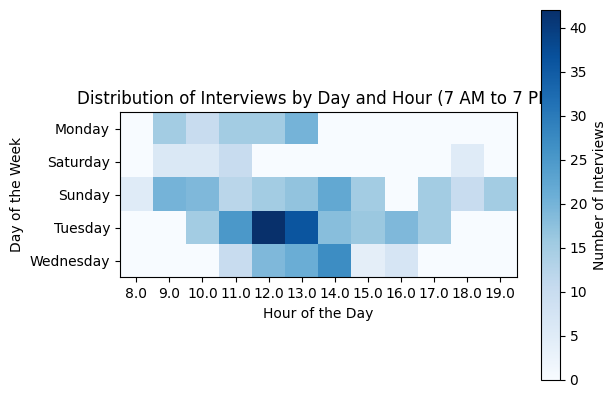

In [6]:
# Extract the independent variables
independent_vars = survey_data[['Recorder', 'Respondent', 'Date_Interview', 'Time_Start', 'Time_End']]

# Analyze the distribution of interviews by the day of the week and hour of the day using a heatmap
interview_data = pd.DataFrame({'Day': pd.to_datetime(independent_vars['Date_Interview']).dt.day_name(),
                               'Hour': pd.to_datetime(independent_vars['Time_Start']).dt.hour})

# Filter hours from 7 am to 7 pm (inclusive)
interview_data = interview_data[(interview_data['Hour'] >= 7) & (interview_data['Hour'] <= 19)]

interview_counts = interview_data.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

# Use Seaborn heatmap for a better visualization
plt.imshow(interview_counts, cmap='Blues')
plt.colorbar(label='Number of Interviews')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Distribution of Interviews by Day and Hour (7 AM to 7 PM)')
plt.xticks(range(len(interview_counts.columns)), interview_counts.columns)
plt.yticks(range(len(interview_counts.index)), interview_counts.index)
plt.show()


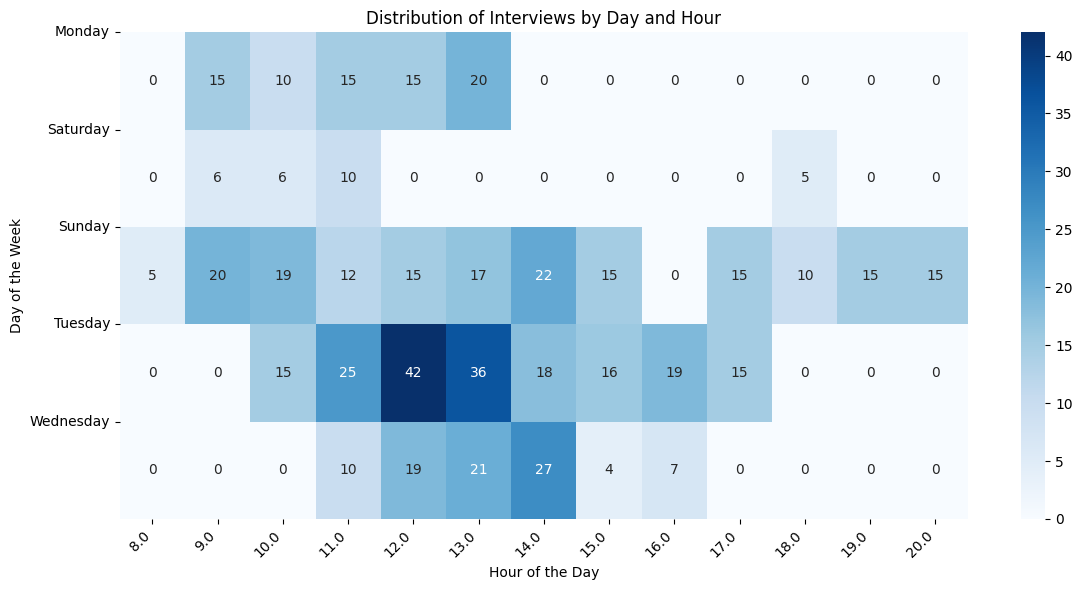

In [7]:
# Extract the independent variables
independent_vars = survey_data[['Recorder', 'Respondent', 'Date_Interview', 'Time_Start', 'Time_End']]

# Analyze the distribution of interviews by the day of the week and hour of the day using a heatmap
interview_data = pd.DataFrame({'Day': pd.to_datetime(independent_vars['Date_Interview']).dt.day_name(),
                               'Hour': pd.to_datetime(independent_vars['Time_Start']).dt.hour})

# Filter the hours from 6 am to 9 pm
interview_data = interview_data[(interview_data['Hour'] >= 6) & (interview_data['Hour'] <= 21)]

interview_counts = interview_data.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

# Use Seaborn heatmap for a better visualization
plt.figure(figsize=(12, 6))  # Adjust the size of the plot
sns.heatmap(interview_counts, cmap='Blues', annot=True, fmt='d')  # Add annotations and format numbers
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Distribution of Interviews by Day and Hour')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(range(len(interview_counts.index)), interview_counts.index, rotation=0)  # Set y-axis labels straight
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


# Demographics

Dependent Variable: Turtle_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Respondent  FishermanID         Age  Education_Level_1  \
count  571.000000   109.000000  559.000000         238.000000   
mean    64.264448    11.697248   35.772809           0.579832   
std     37.234701     6.638140   11.115083           0.989359   
min      1.000000     1.000000   15.000000           0.000000   
25%     31.500000     6.000000   28.000000           0.000000   
50%     65.000000    12.000000   35.000000           0.000000   
75%     98.000000    17.000000   40.000000           1.000000   
max    125.000000    23.000000   65.000000           4.000000   

       Fisheries_Association_Yrs  
count                 473.000000  
mean                   18.630021  
std                     9.349415  
min                     2.000000  
25%                    15.000000  
50%                    15.000000  
75%                    22.000000 

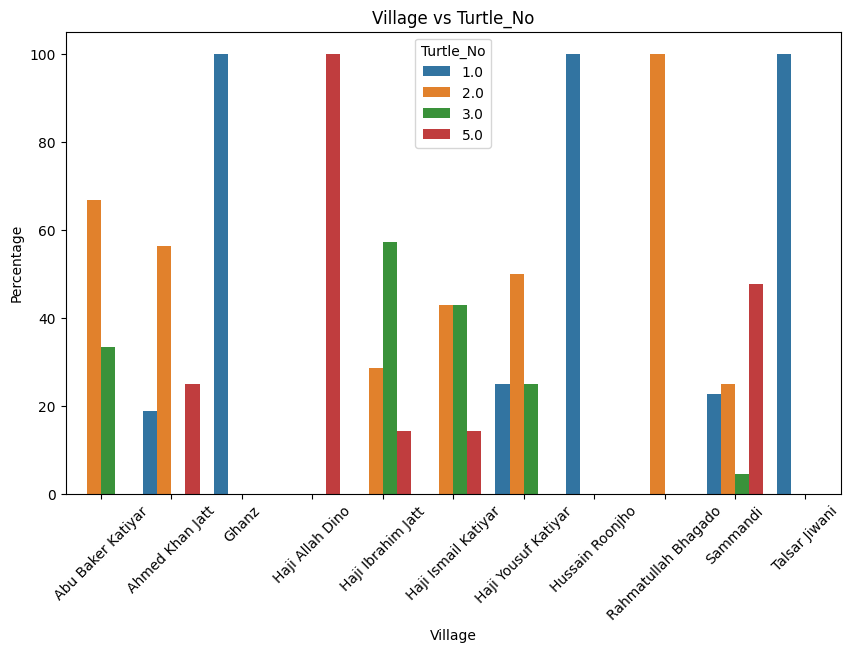

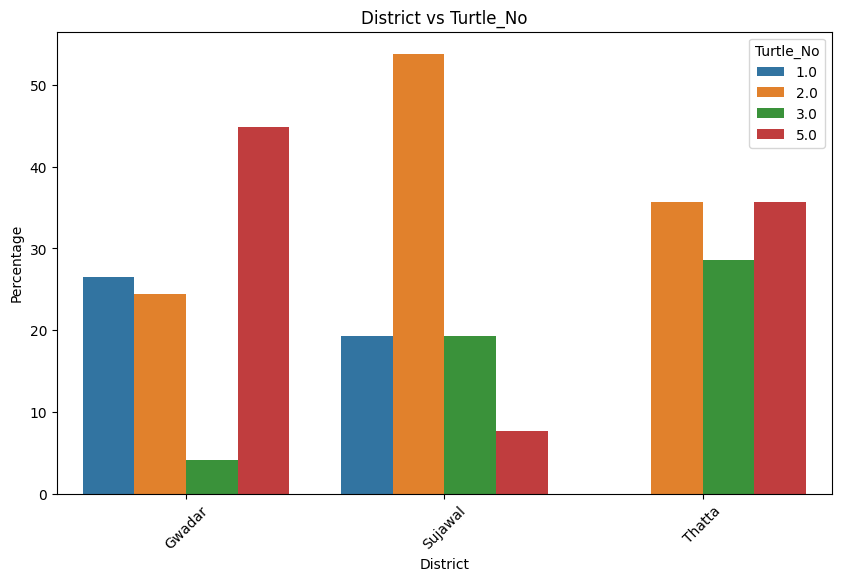

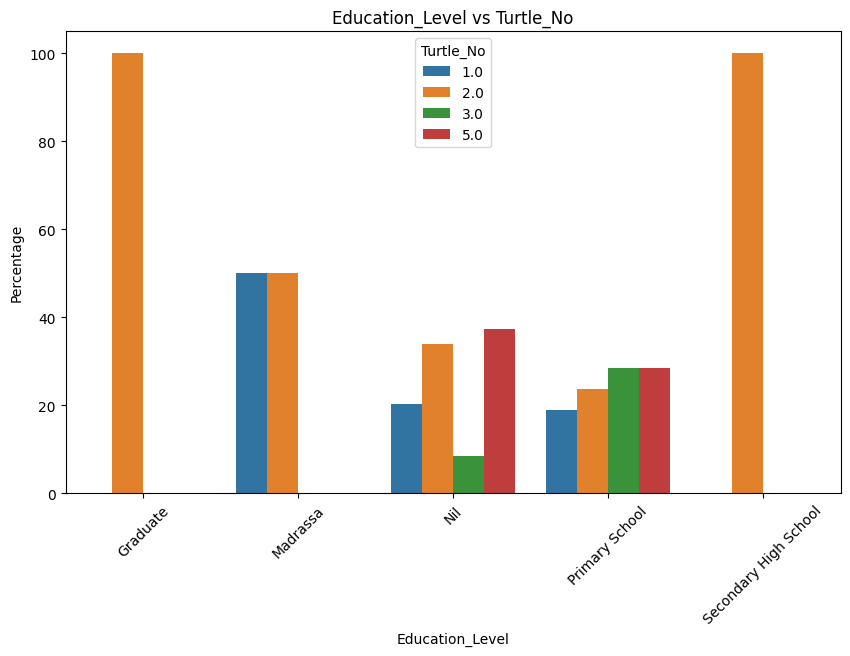

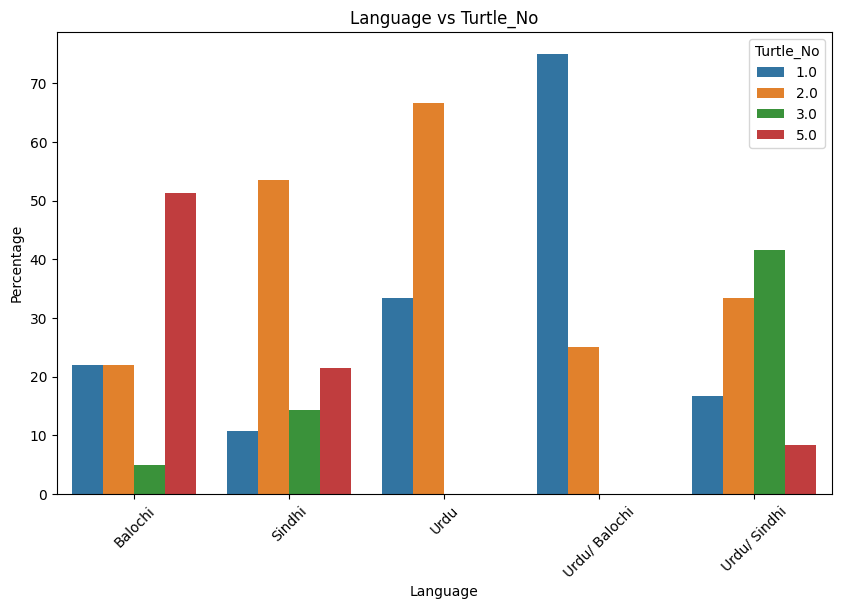

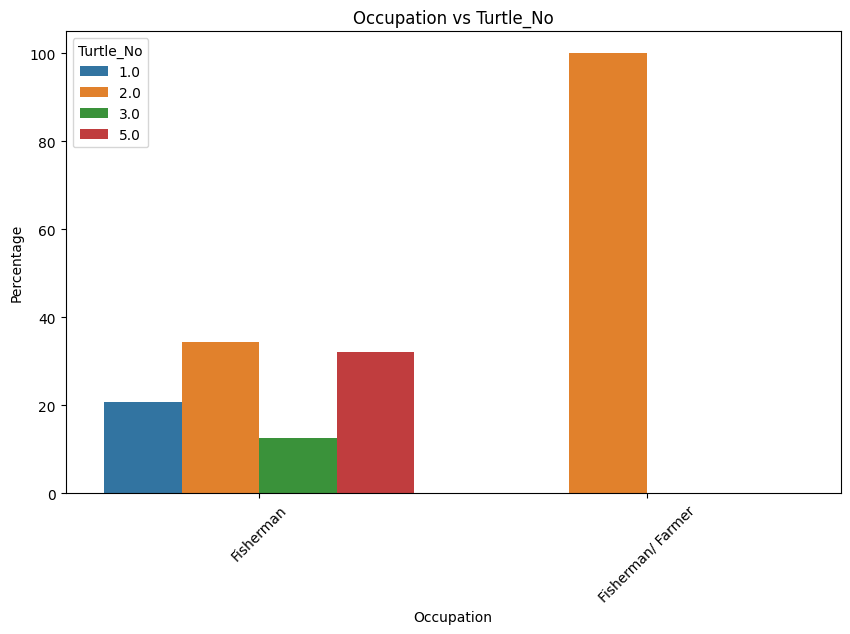

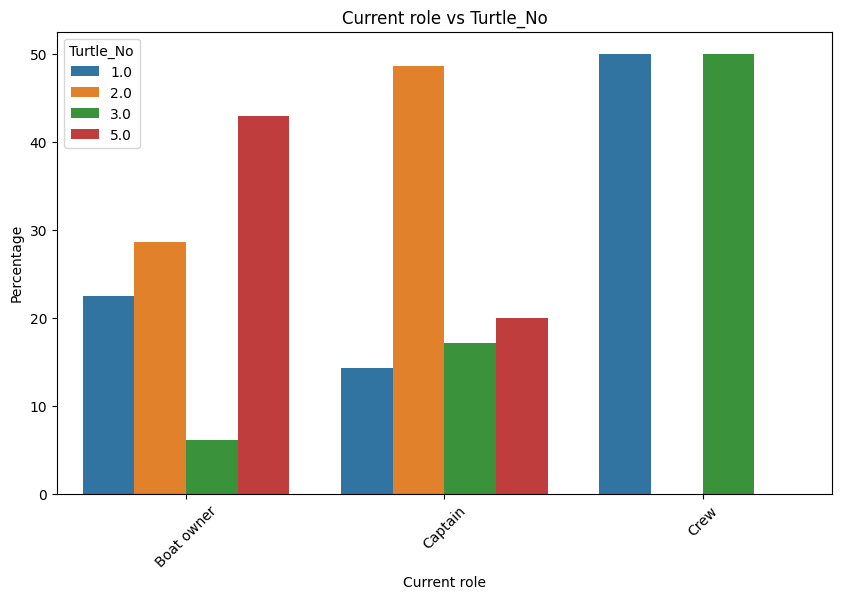

Dependent Variable: Dolphin_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Respondent  FishermanID         Age  Education_Level_1  \
count  571.000000   109.000000  559.000000         238.000000   
mean    64.264448    11.697248   35.772809           0.579832   
std     37.234701     6.638140   11.115083           0.989359   
min      1.000000     1.000000   15.000000           0.000000   
25%     31.500000     6.000000   28.000000           0.000000   
50%     65.000000    12.000000   35.000000           0.000000   
75%     98.000000    17.000000   40.000000           1.000000   
max    125.000000    23.000000   65.000000           4.000000   

       Fisheries_Association_Yrs  
count                 473.000000  
mean                   18.630021  
std                     9.349415  
min                     2.000000  
25%                    15.000000  
50%                    15.000000  
75%                    22.000000

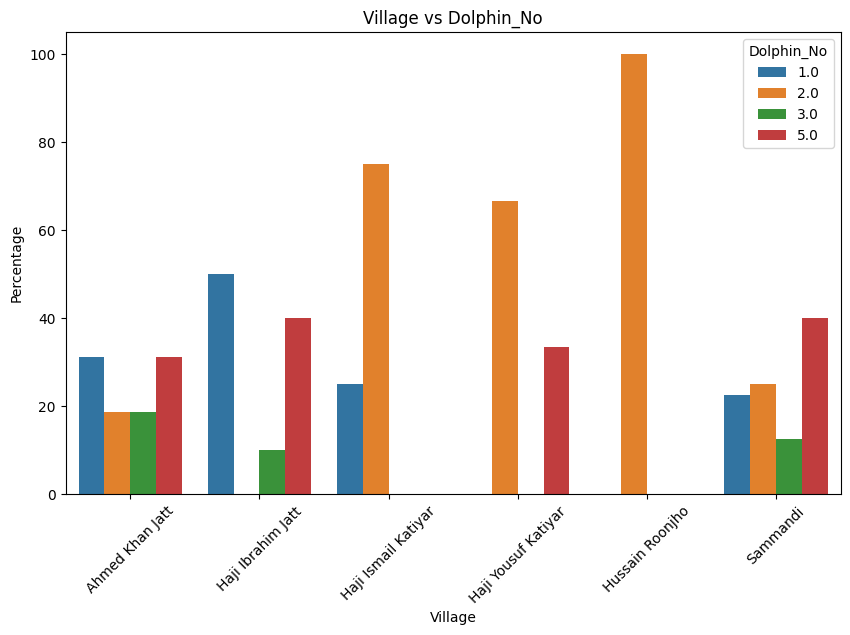

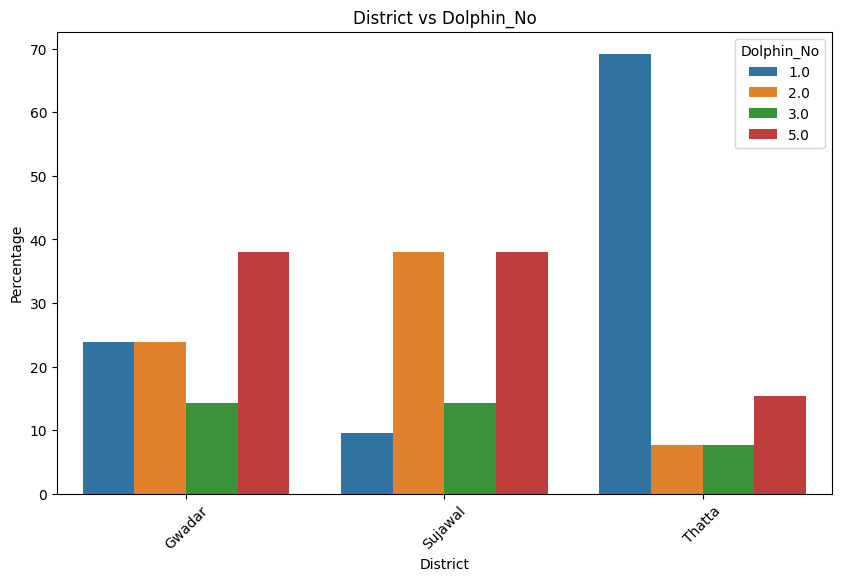

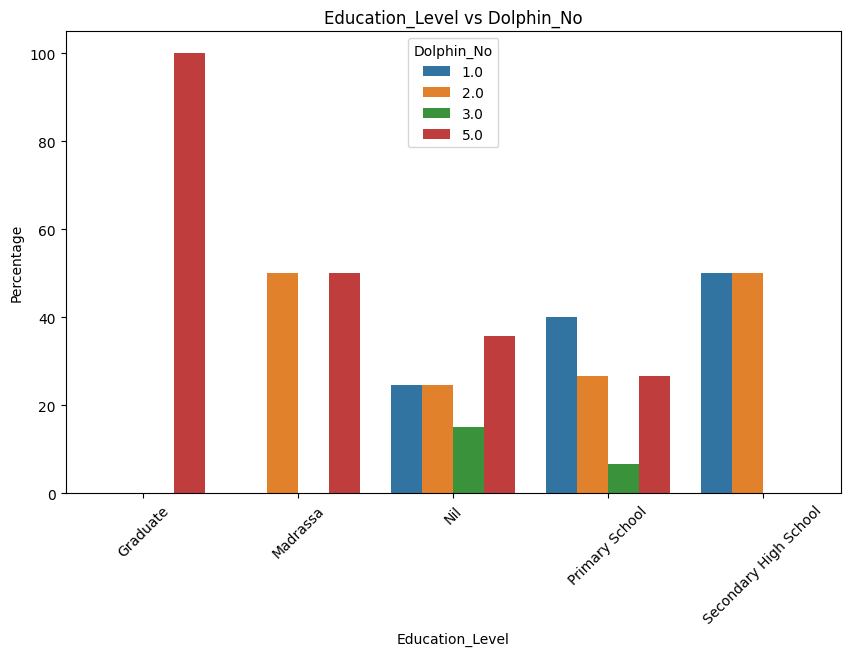

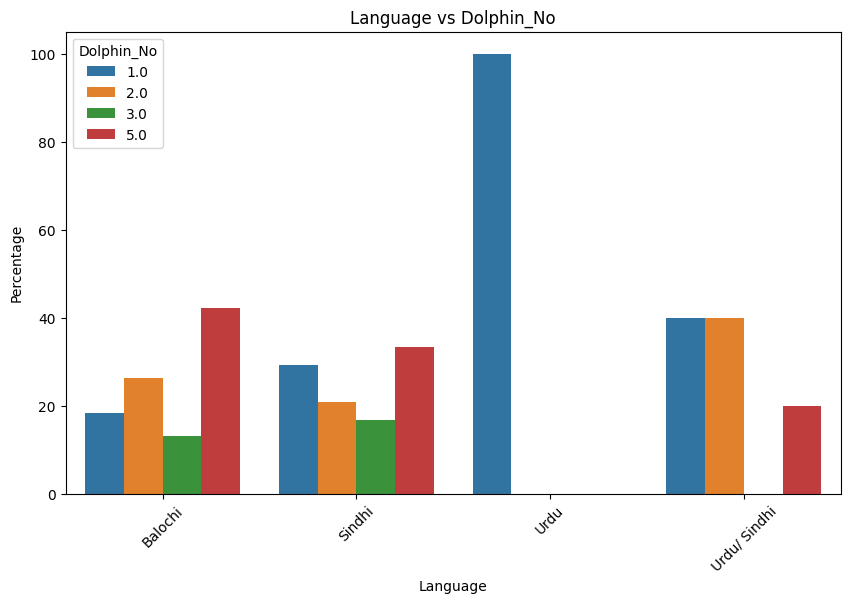

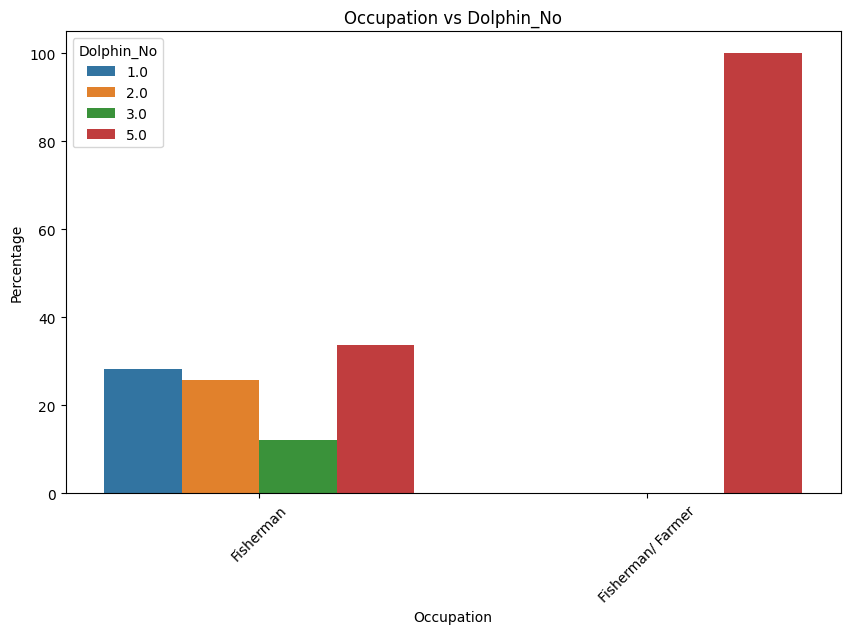

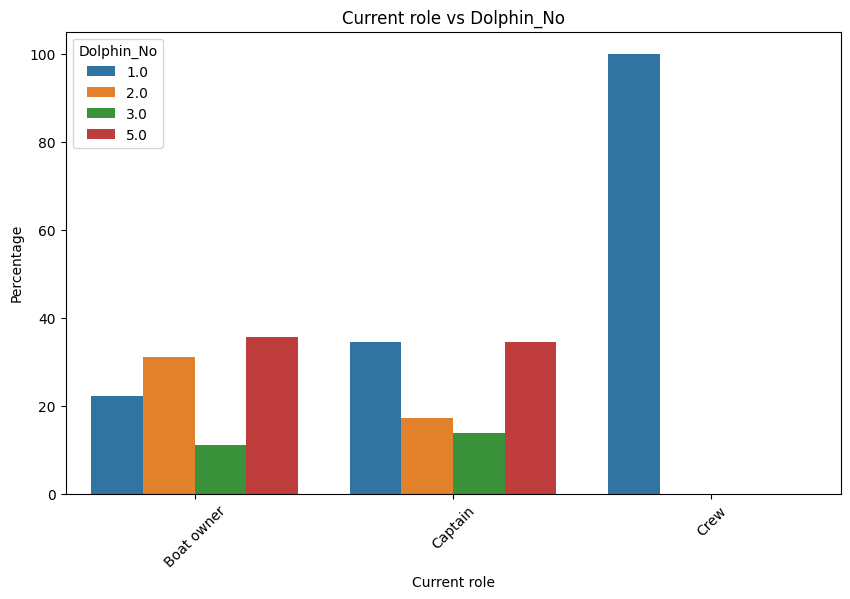

Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Respondent  FishermanID         Age  Education_Level_1  \
count  571.000000   109.000000  559.000000         238.000000   
mean    64.264448    11.697248   35.772809           0.579832   
std     37.234701     6.638140   11.115083           0.989359   
min      1.000000     1.000000   15.000000           0.000000   
25%     31.500000     6.000000   28.000000           0.000000   
50%     65.000000    12.000000   35.000000           0.000000   
75%     98.000000    17.000000   40.000000           1.000000   
max    125.000000    23.000000   65.000000           4.000000   

       Fisheries_Association_Yrs  
count                 473.000000  
mean                   18.630021  
std                     9.349415  
min                     2.000000  
25%                    15.000000  
50%                    15.000000  
75%                    22.

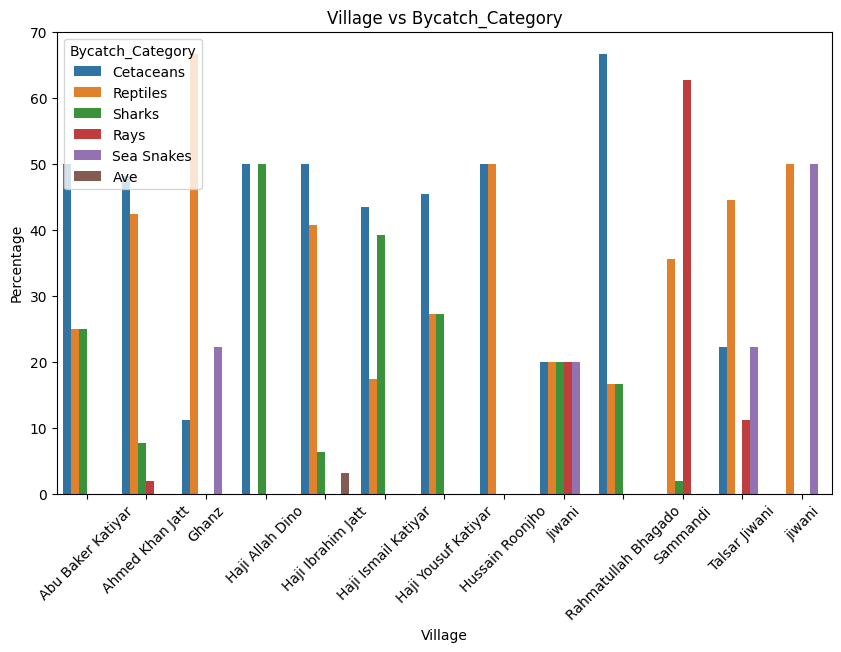

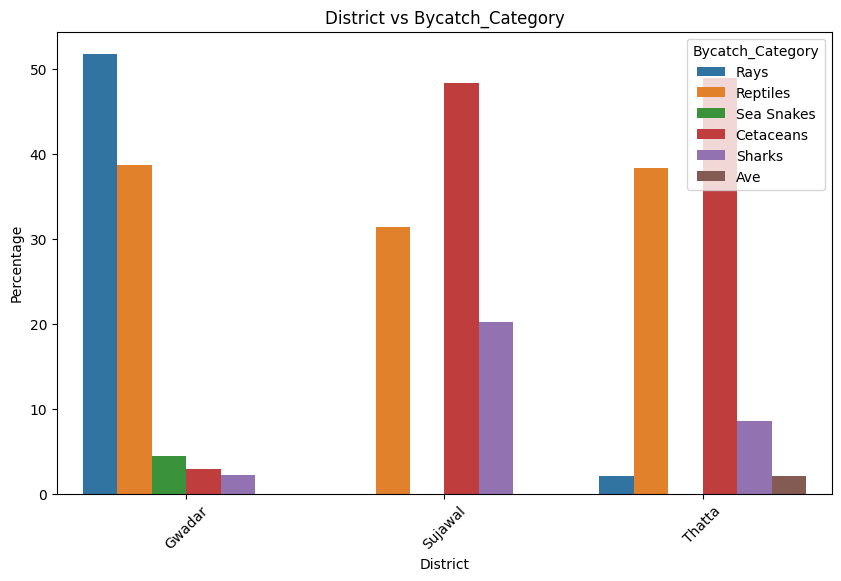

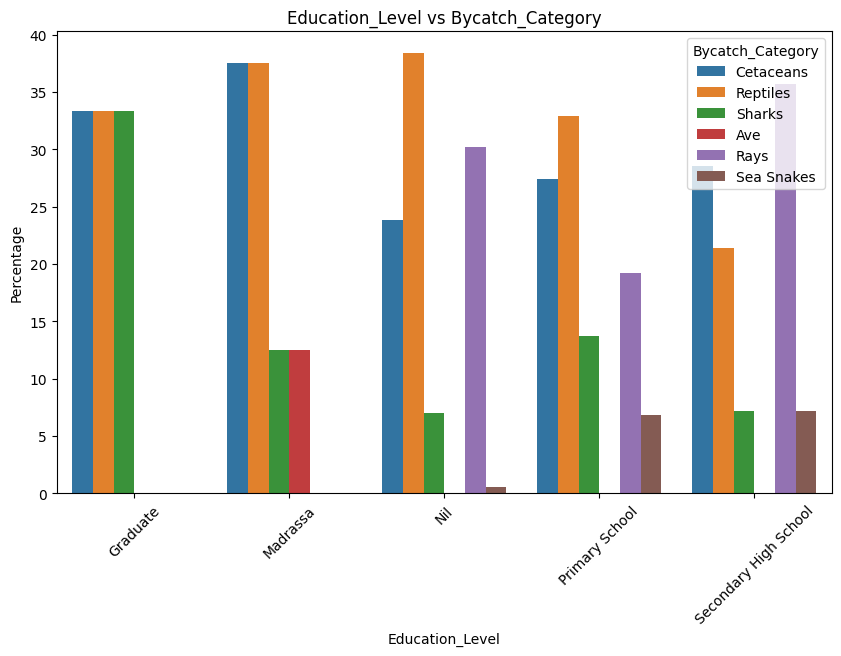

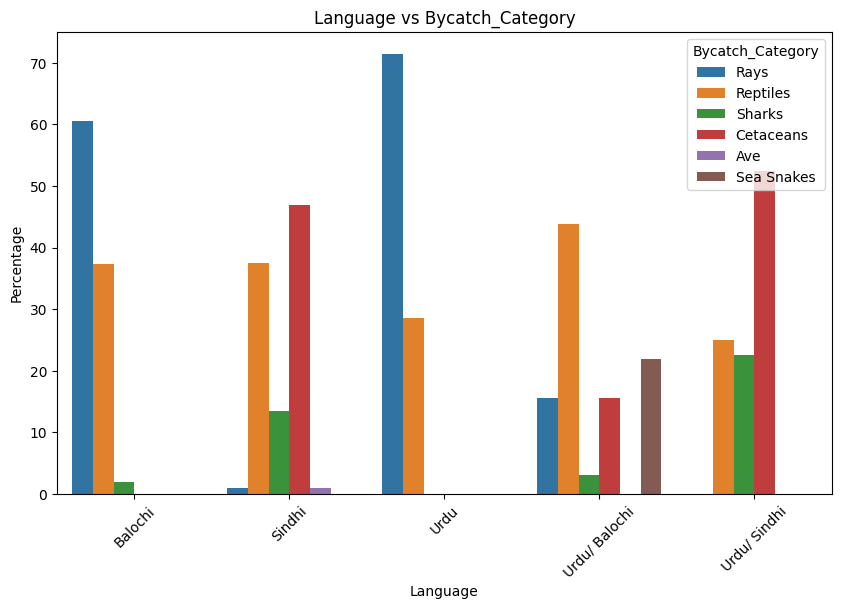

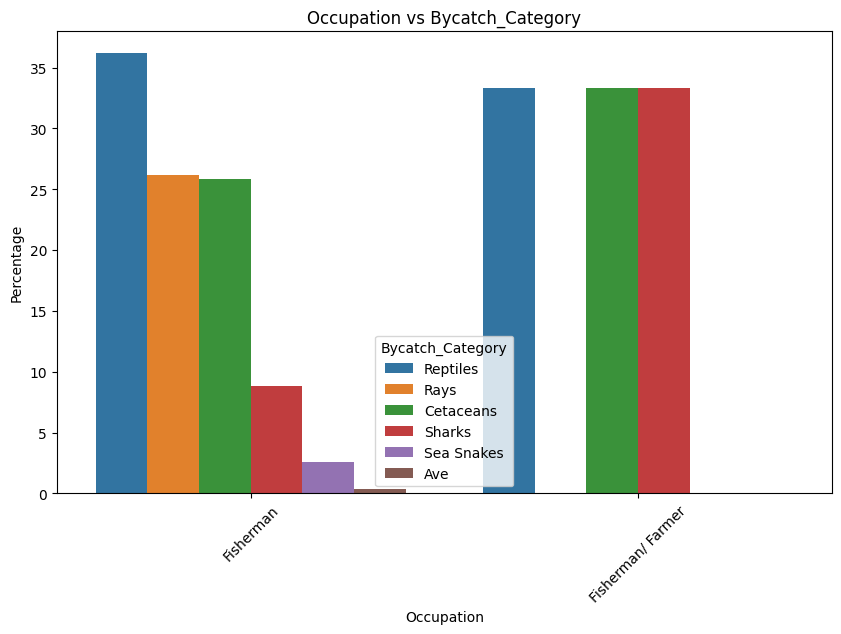

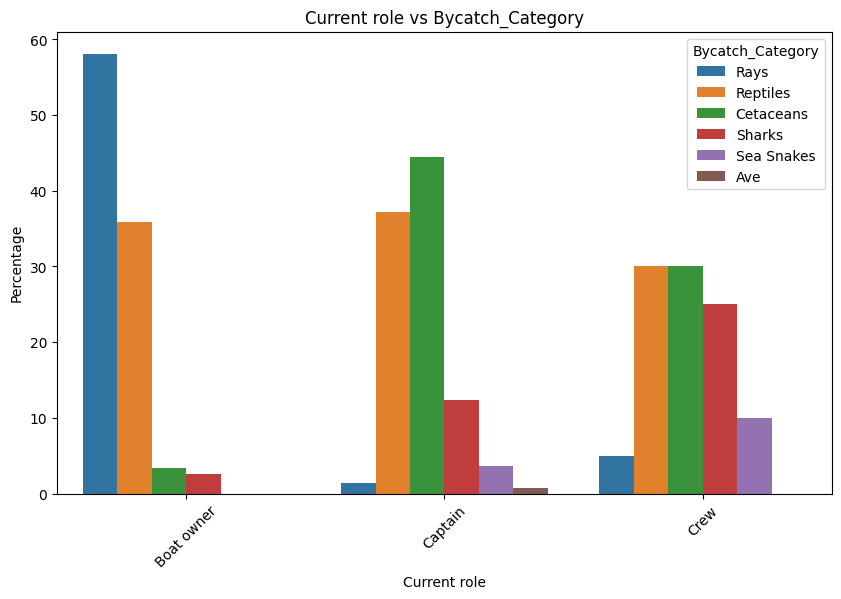

In [8]:
# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No', 'Dolphin_No', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Respondent', 'FishermanID', 'Village', 'District', 'Age', 'Education_Level', 'Education_Level_1',
       'Language', 'Occupation', 'Fisheries_Association_Yrs', 'Current role']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            plt.figure(figsize=(10, 6))
            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

    

# Fisheries Information 

Dependent Variable: Turtle_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Fisheries_Type_Num  Boat_Sizeft  Category_Gear_Num  Months_Gear_Used  \
count          553.000000   562.000000         239.000000        561.000000   
mean             2.370705    24.871886           1.769874          5.853832   
std              0.588238     6.938587           1.089181          2.954420   
min              1.000000    15.000000           0.000000          2.000000   
25%              2.000000    20.000000           1.000000          3.000000   
50%              2.000000    22.000000           1.000000          5.000000   
75%              3.000000    30.000000           3.000000          9.000000   
max              4.000000    40.000000           5.000000         12.000000   

       Gear_Length_(km)  Width (meters)  Mesh_Size (Millimeters/ Ungal)  \
count        567.000000      564.000000                      510.000000   
me

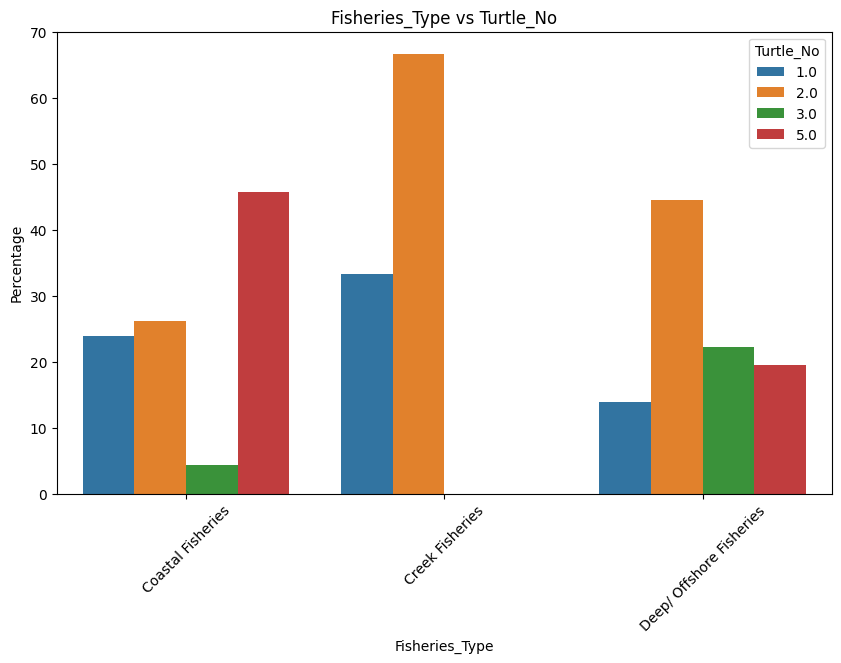

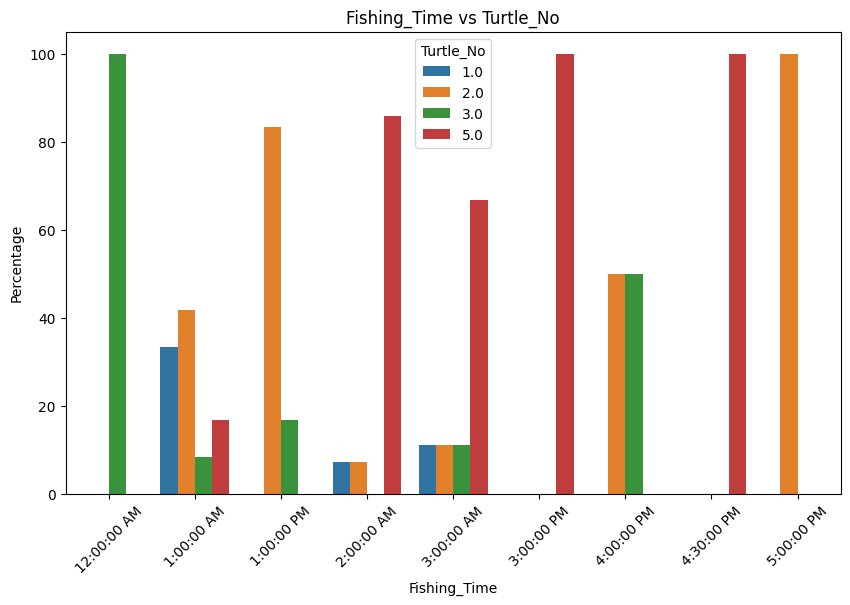

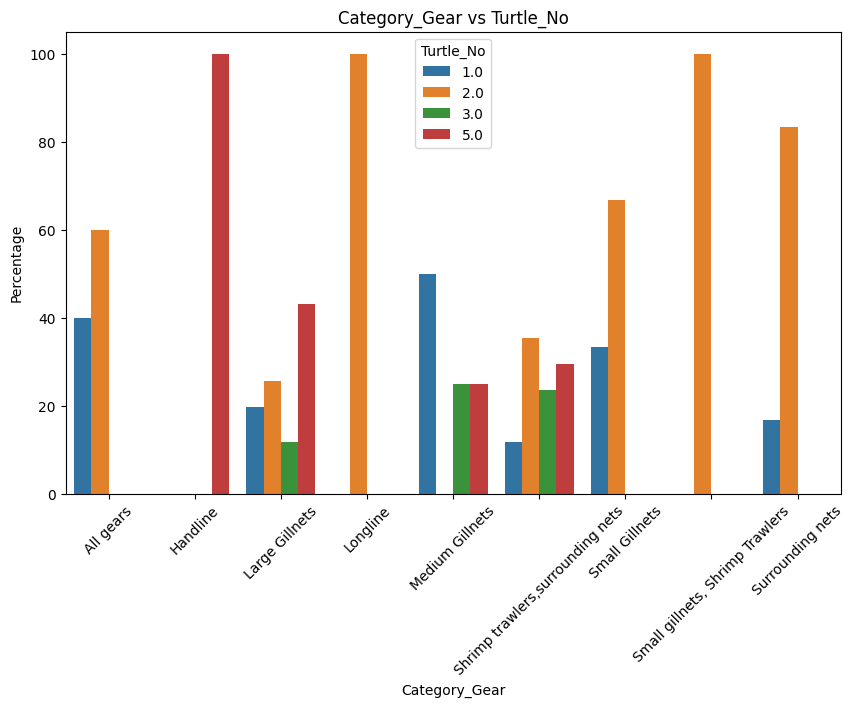

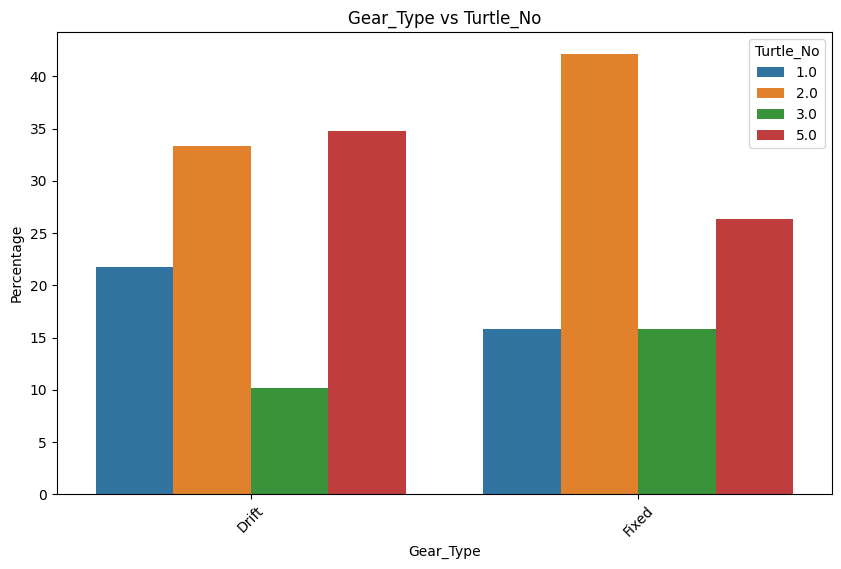

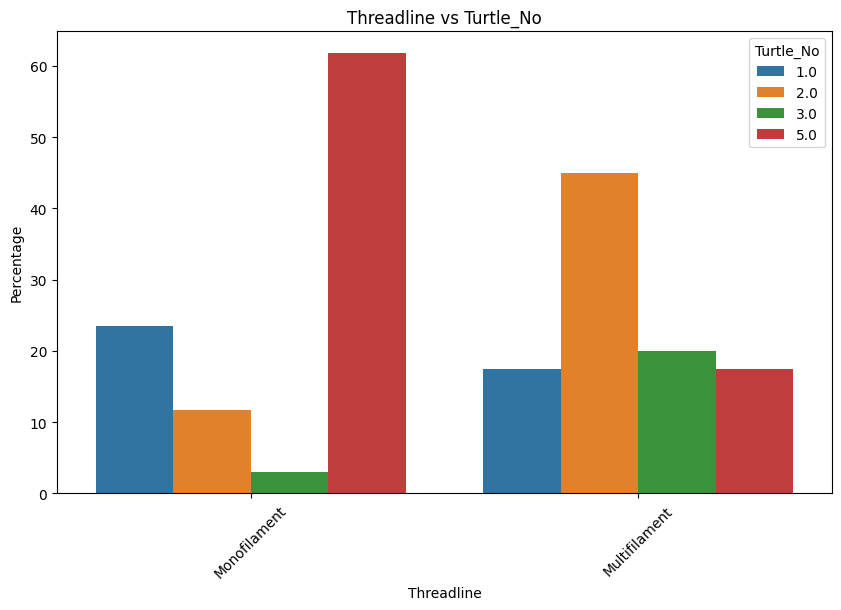

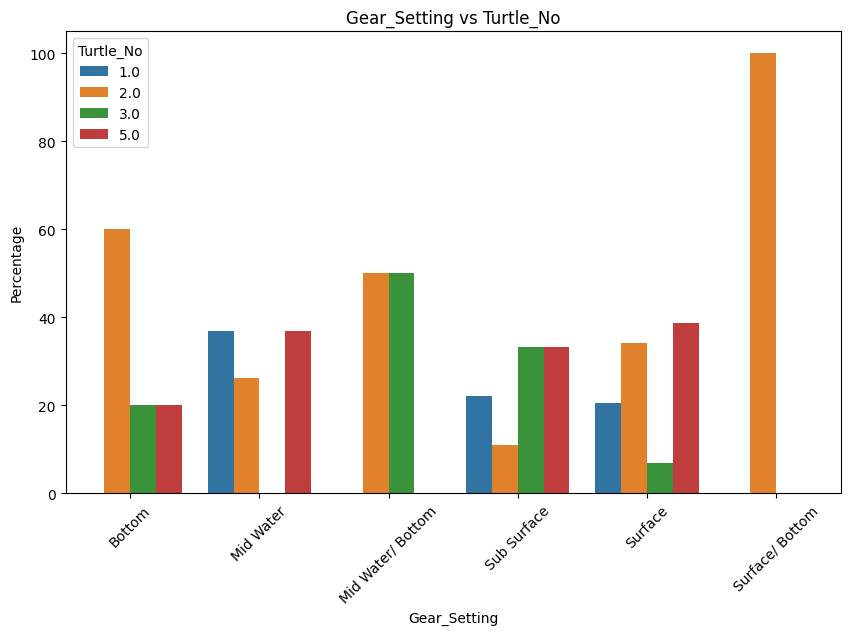

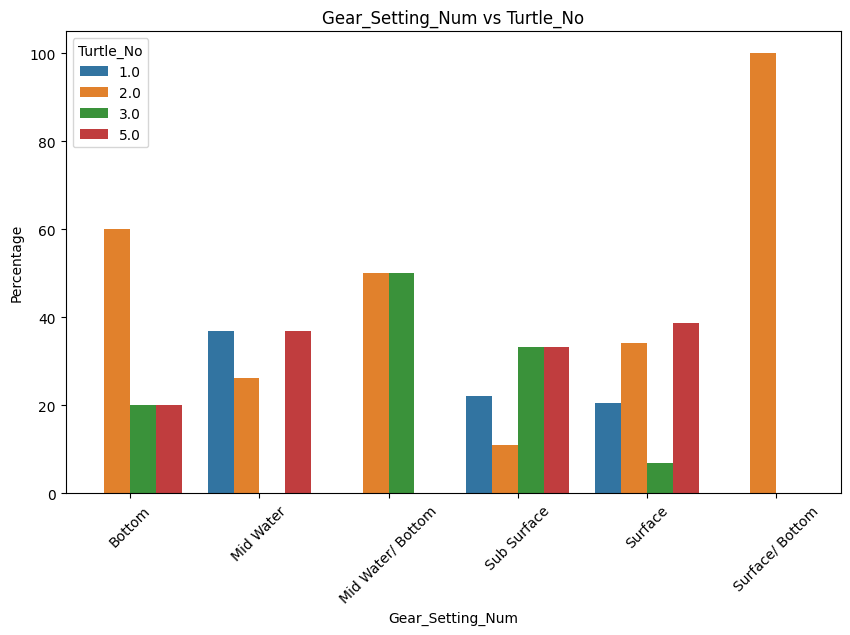

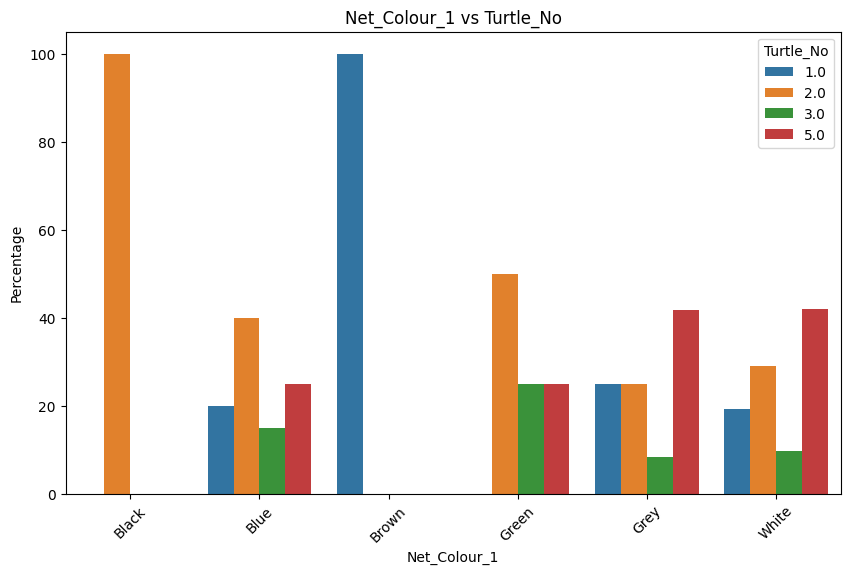

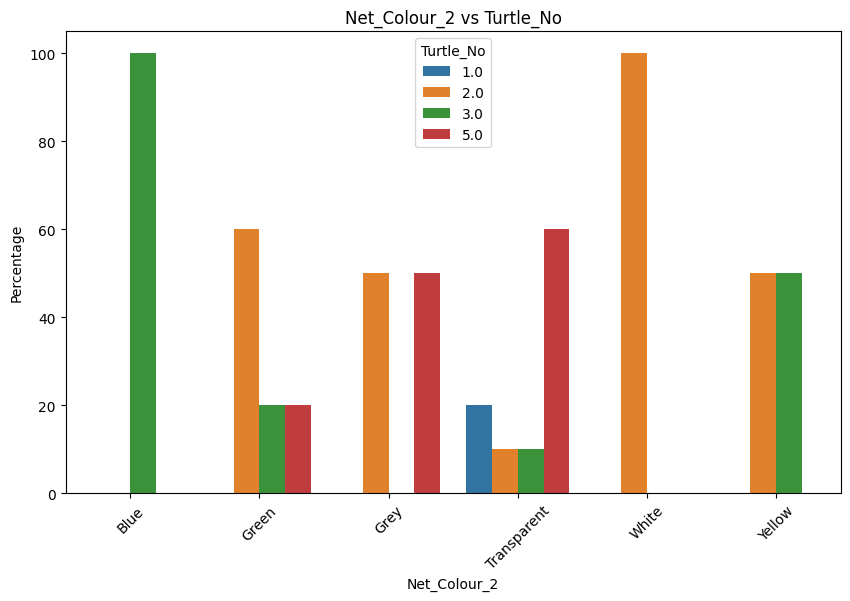

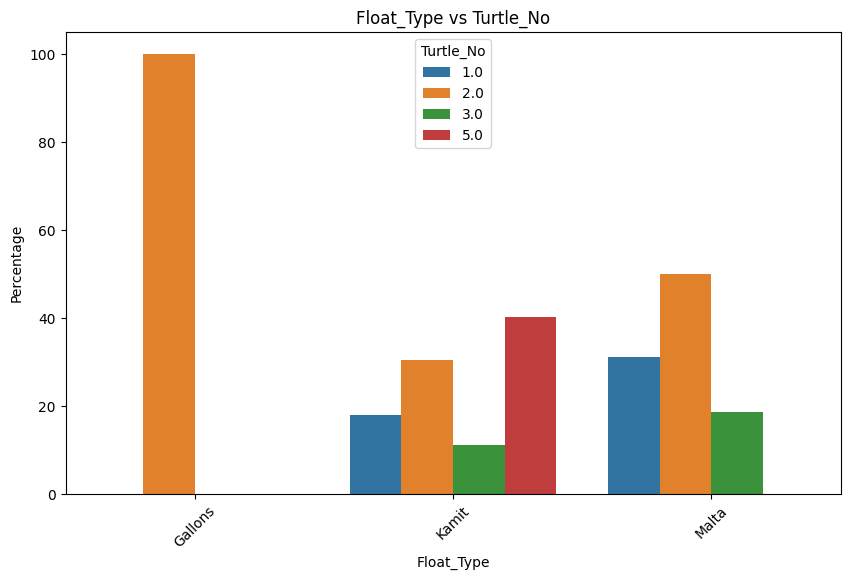

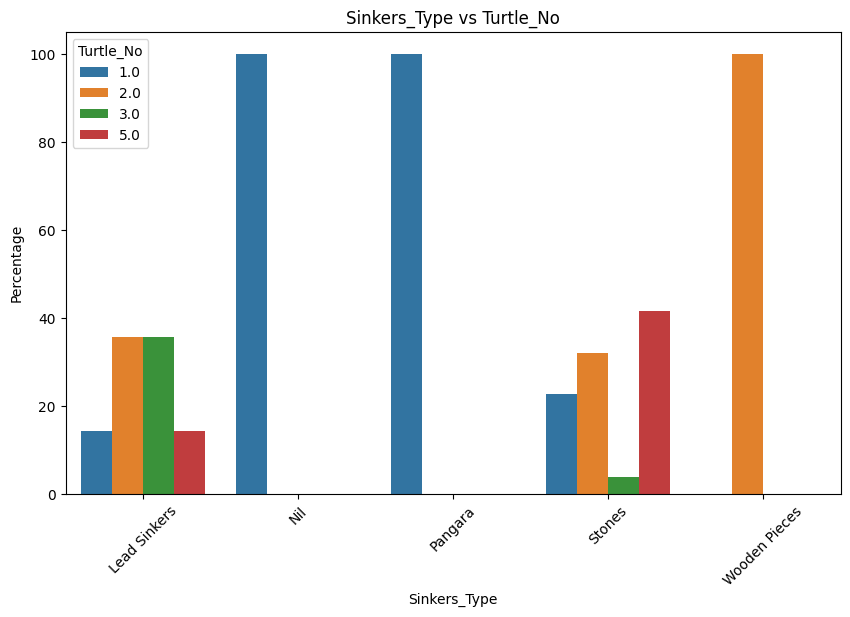

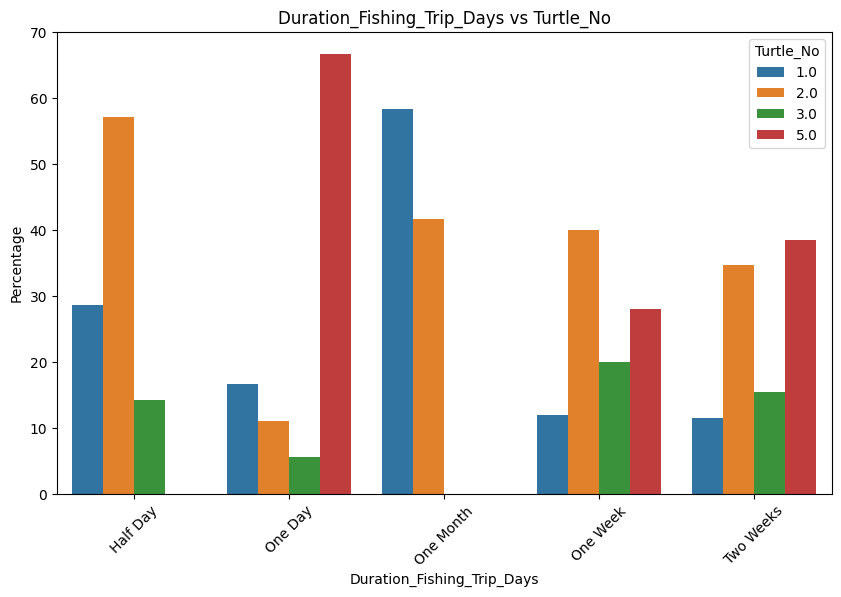

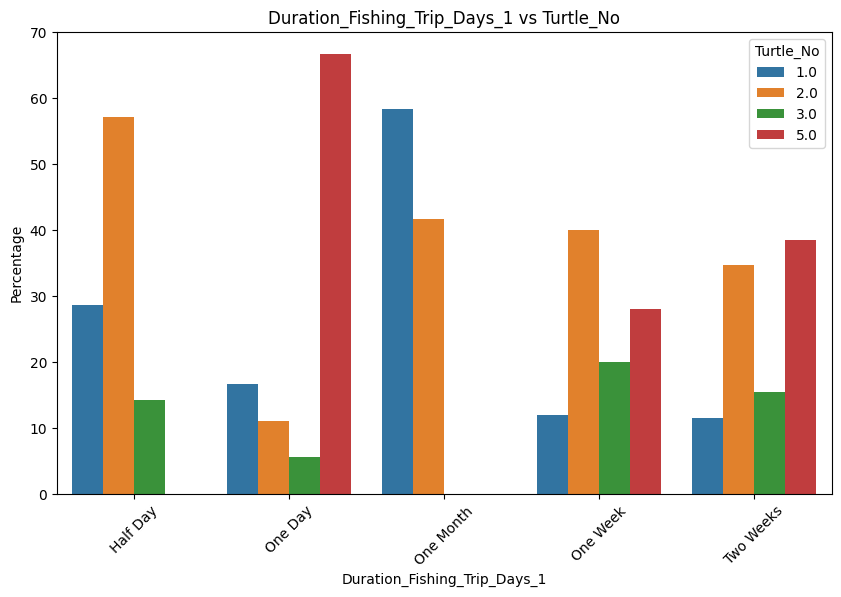

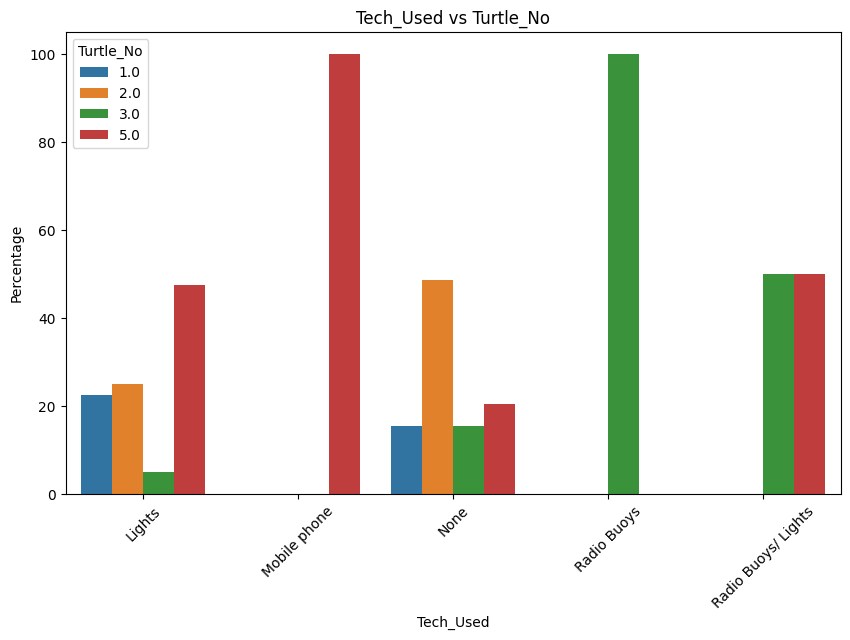

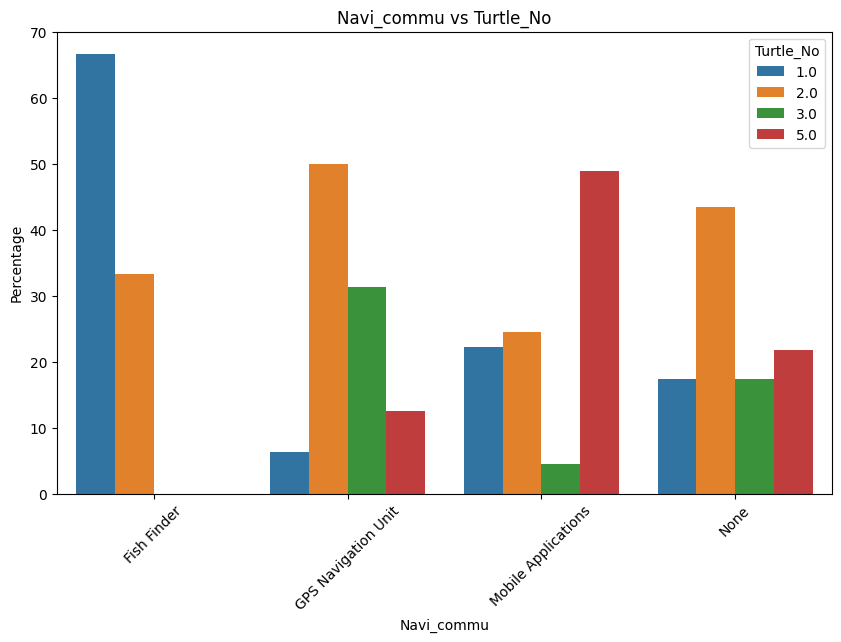

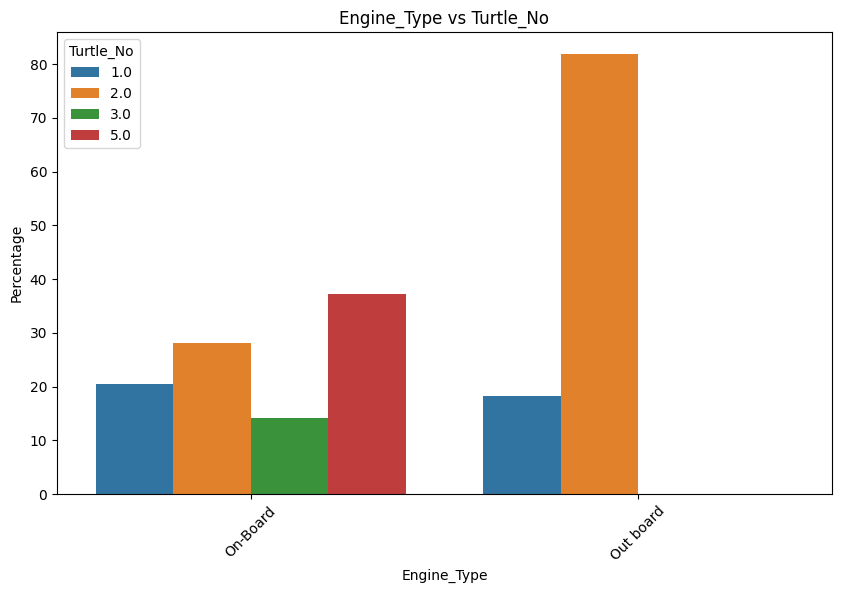

Dependent Variable: Dolphin_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Fisheries_Type_Num  Boat_Sizeft  Category_Gear_Num  Months_Gear_Used  \
count          553.000000   562.000000         239.000000        561.000000   
mean             2.370705    24.871886           1.769874          5.853832   
std              0.588238     6.938587           1.089181          2.954420   
min              1.000000    15.000000           0.000000          2.000000   
25%              2.000000    20.000000           1.000000          3.000000   
50%              2.000000    22.000000           1.000000          5.000000   
75%              3.000000    30.000000           3.000000          9.000000   
max              4.000000    40.000000           5.000000         12.000000   

       Gear_Length_(km)  Width (meters)  Mesh_Size (Millimeters/ Ungal)  \
count        567.000000      564.000000                      510.000000   
m

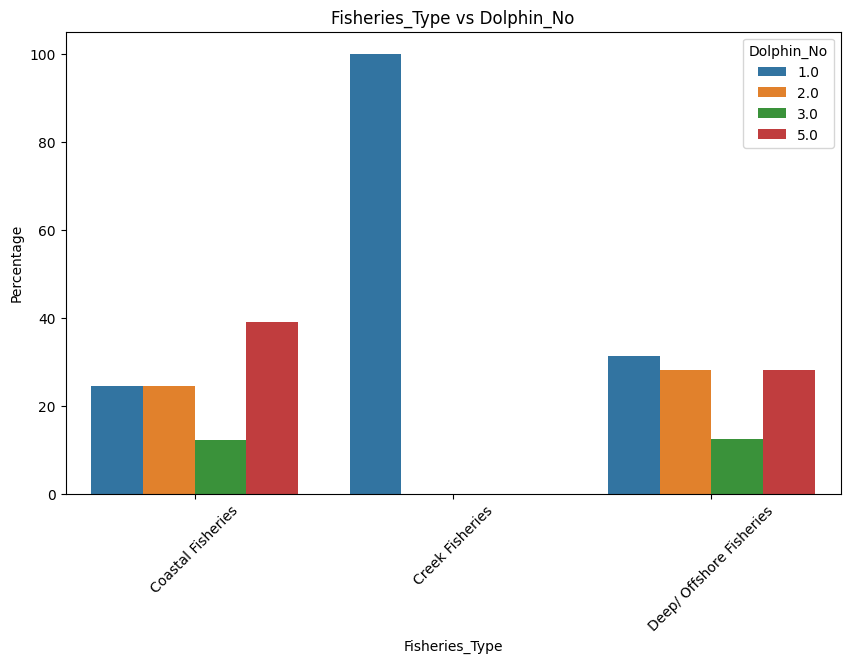

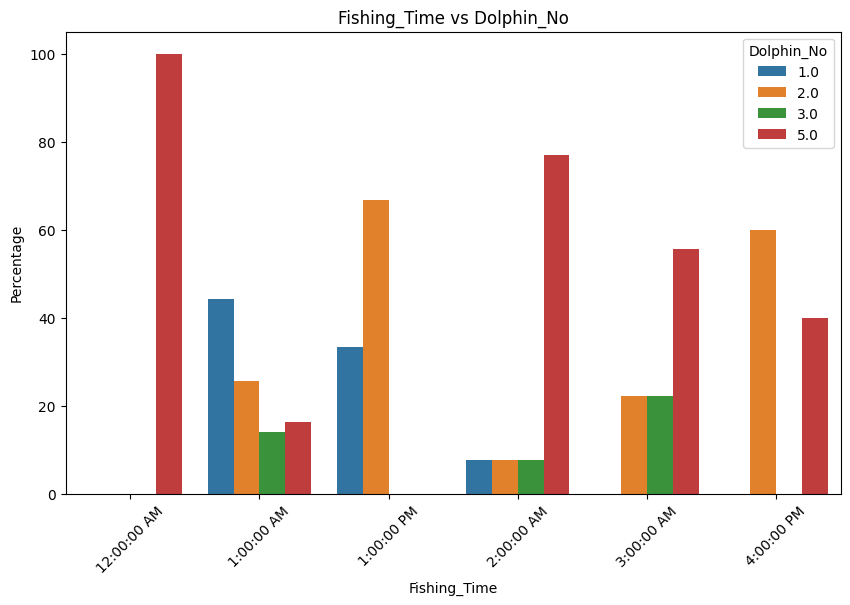

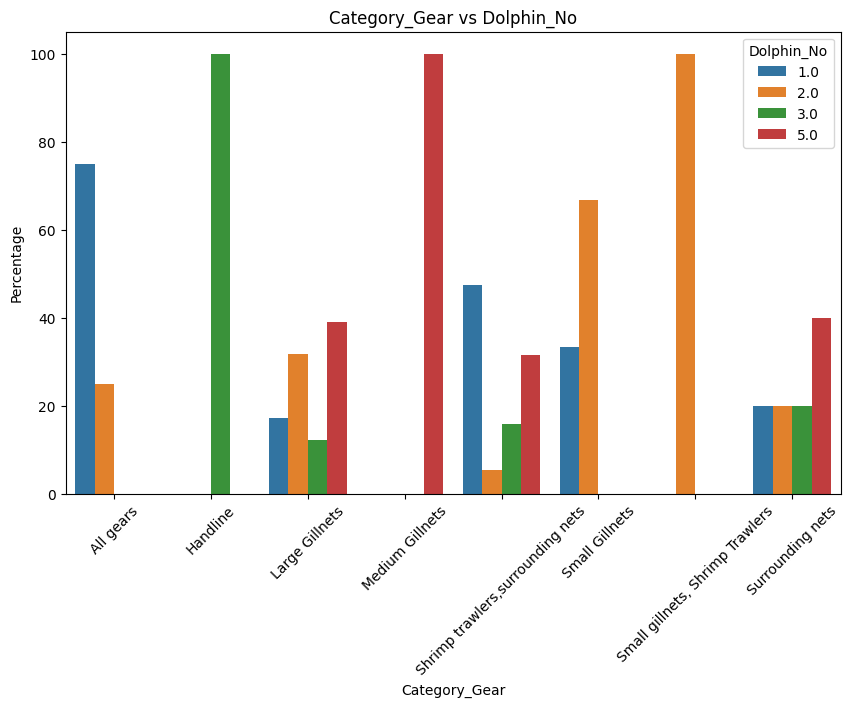

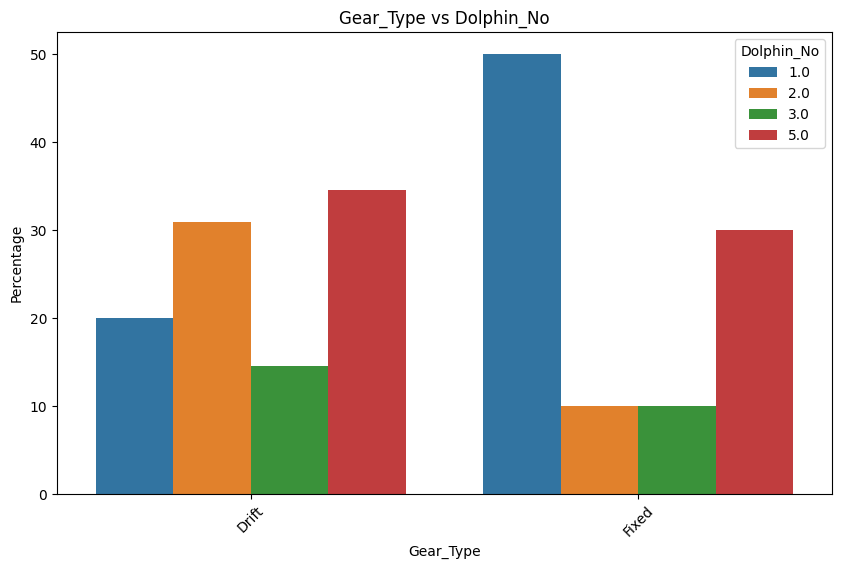

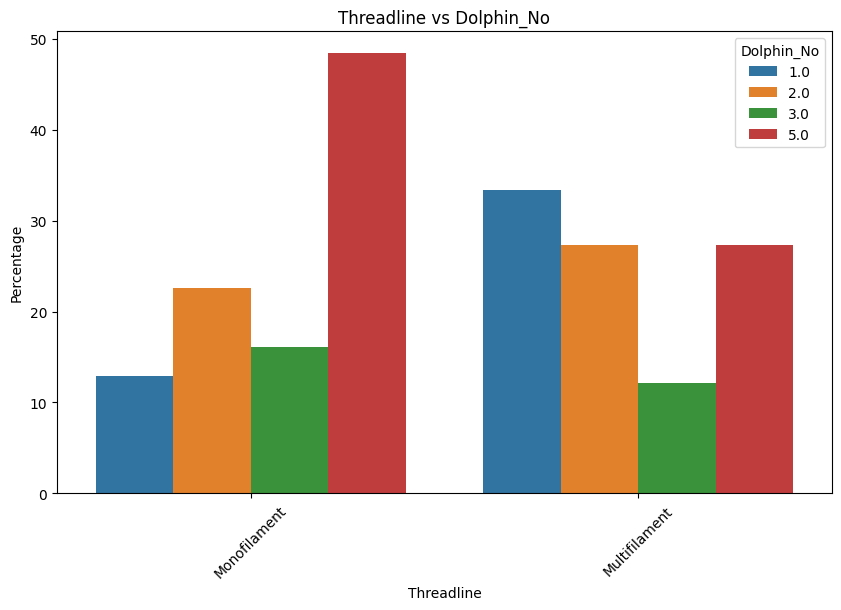

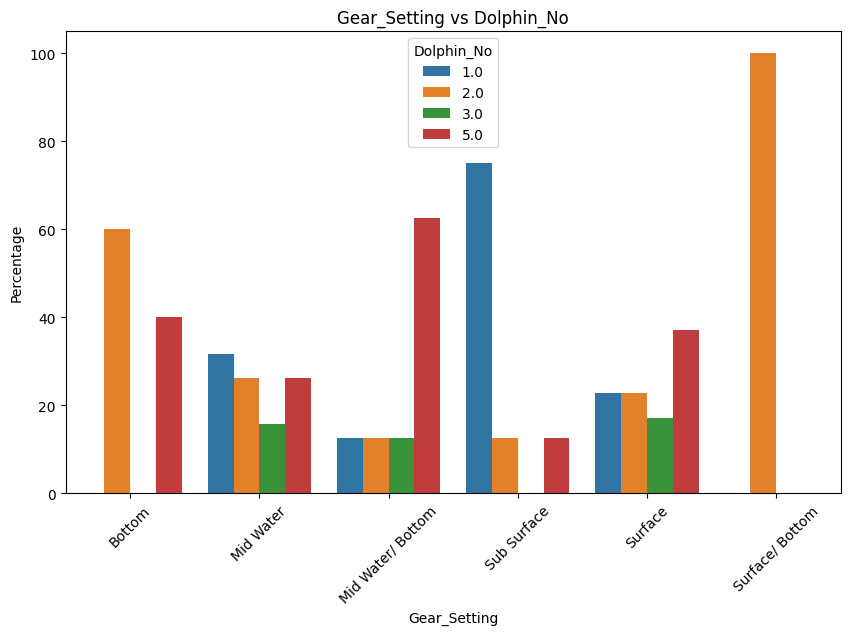

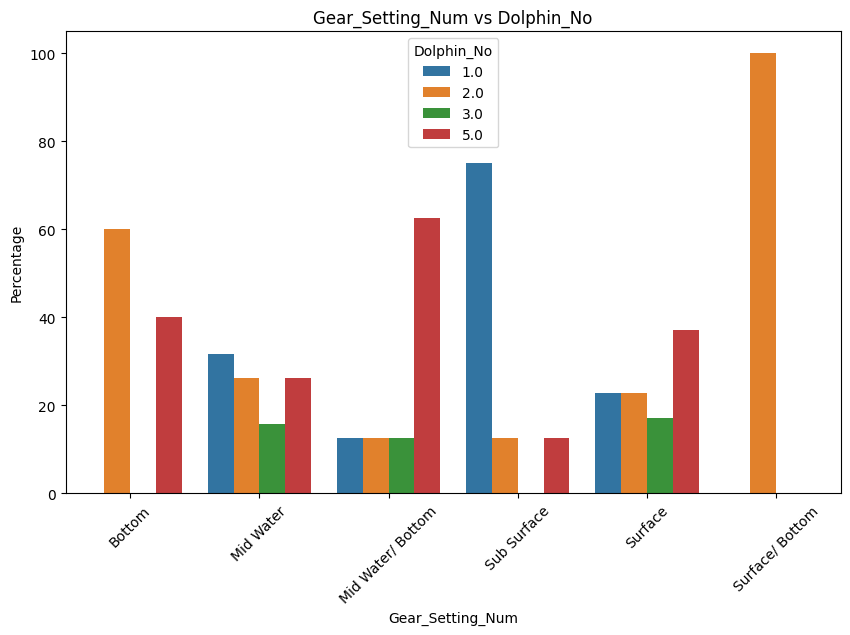

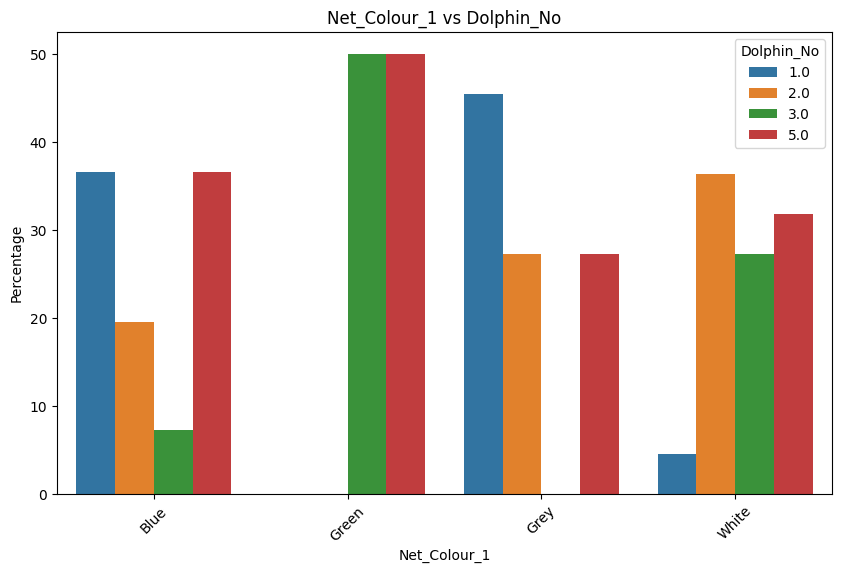

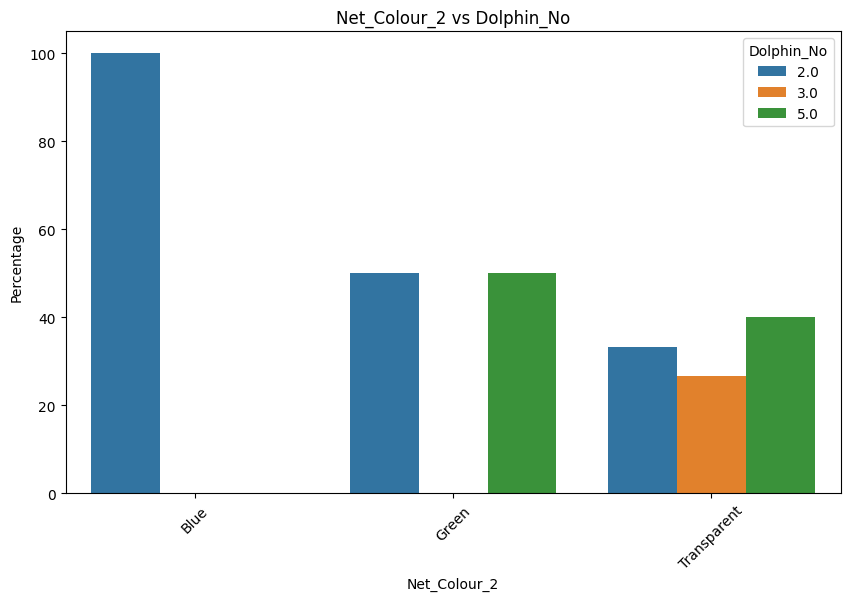

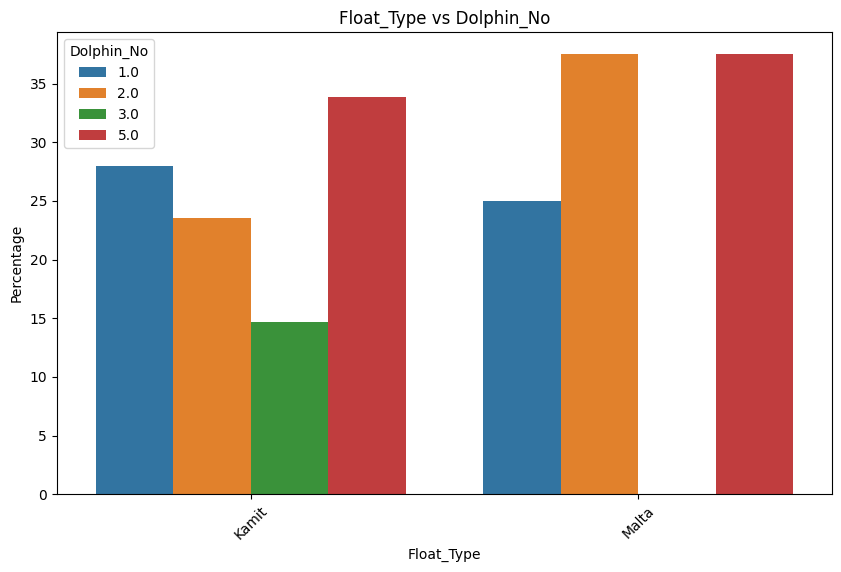

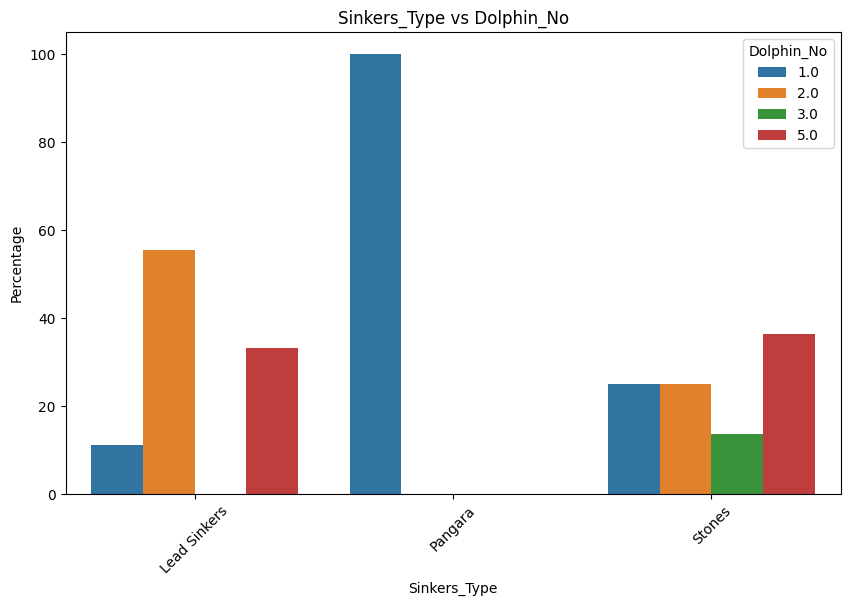

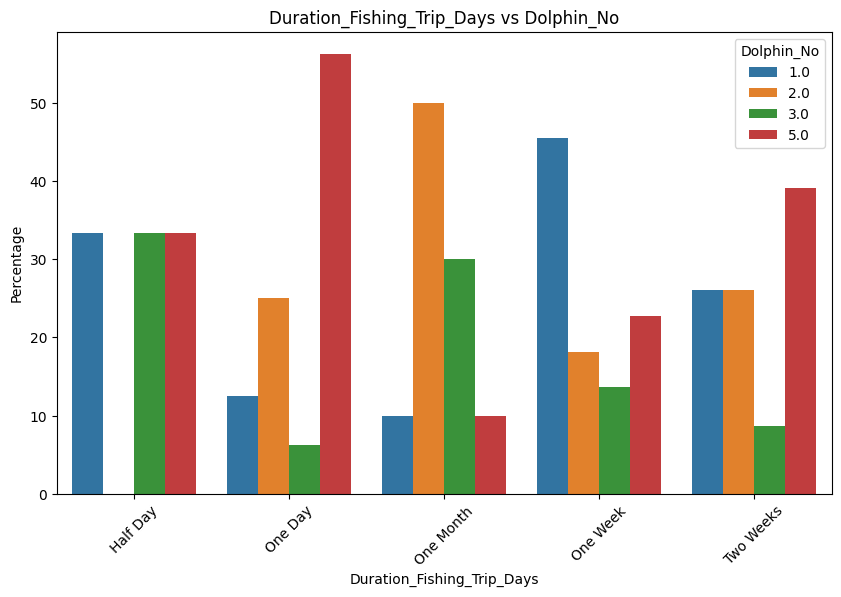

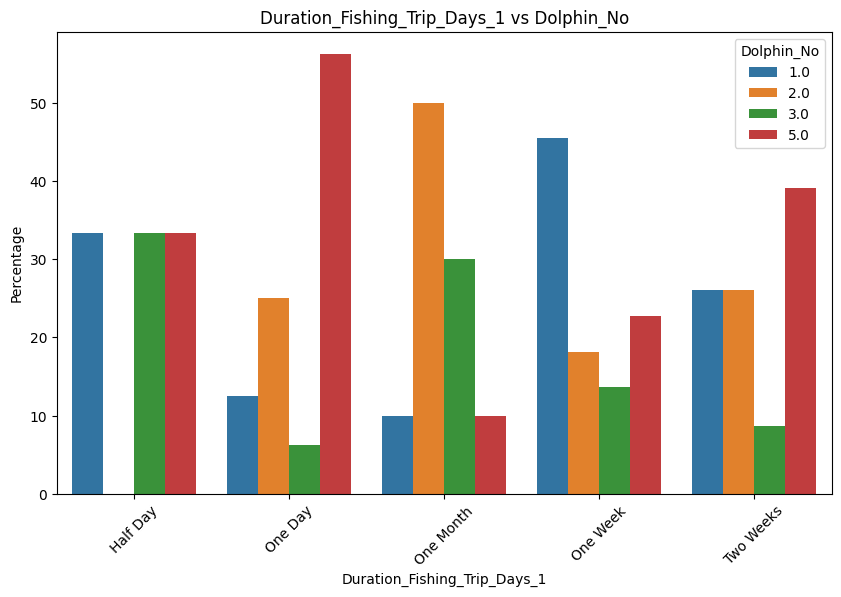

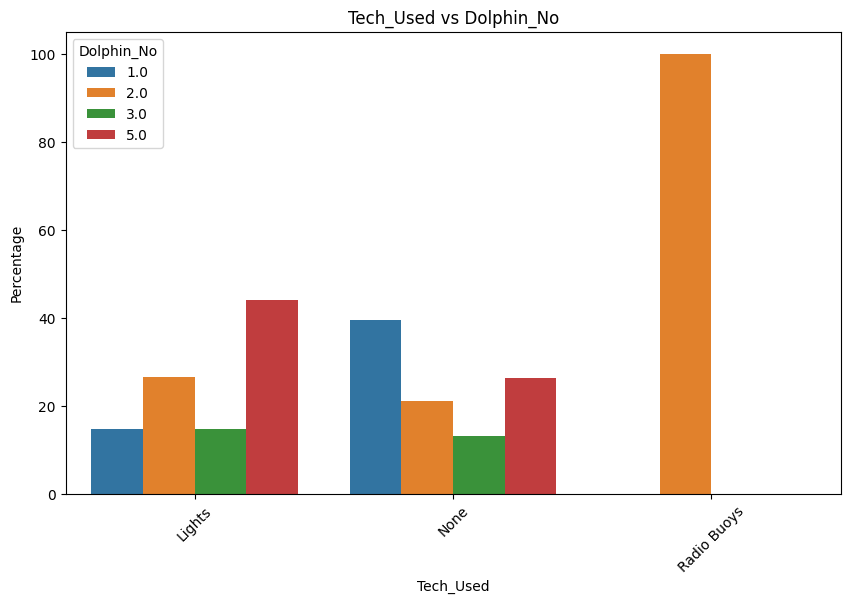

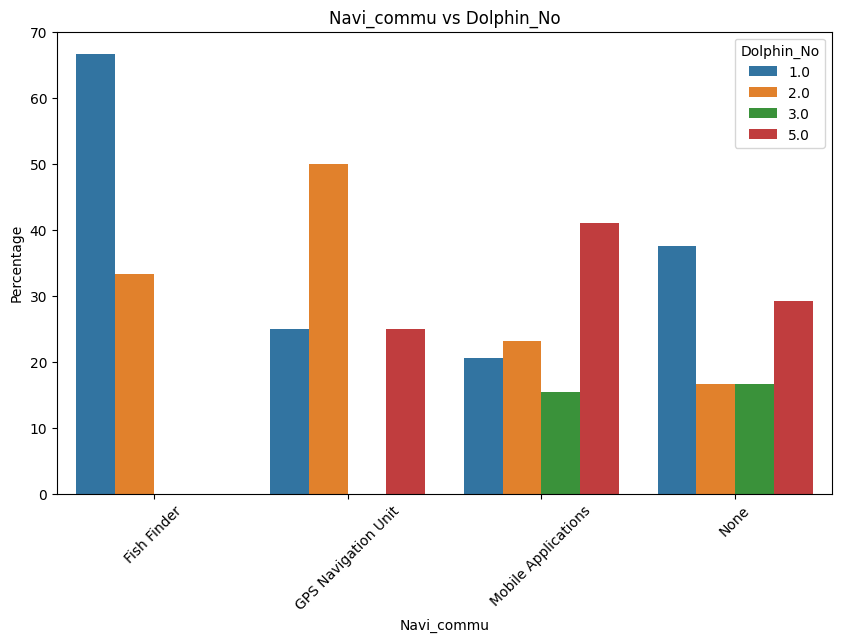

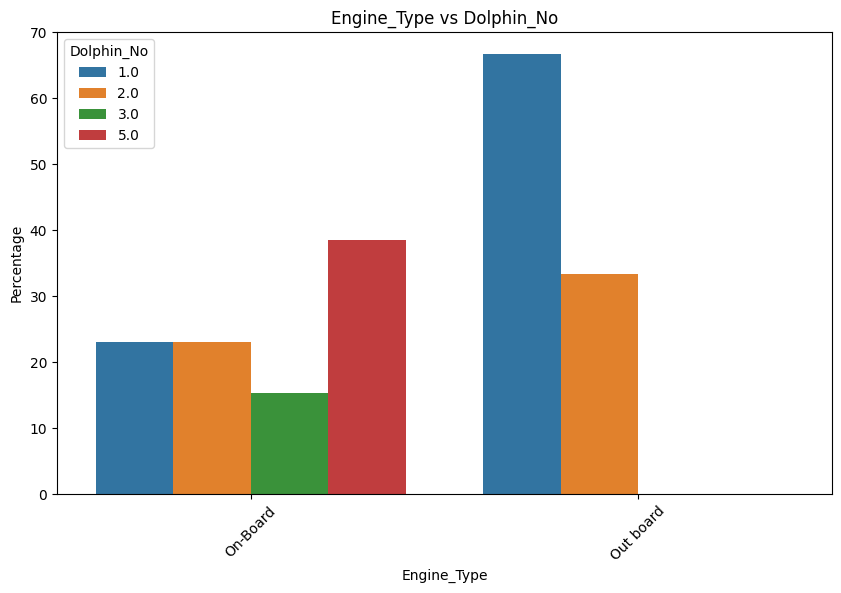

Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Fisheries_Type_Num  Boat_Sizeft  Category_Gear_Num  Months_Gear_Used  \
count          553.000000   562.000000         239.000000        561.000000   
mean             2.370705    24.871886           1.769874          5.853832   
std              0.588238     6.938587           1.089181          2.954420   
min              1.000000    15.000000           0.000000          2.000000   
25%              2.000000    20.000000           1.000000          3.000000   
50%              2.000000    22.000000           1.000000          5.000000   
75%              3.000000    30.000000           3.000000          9.000000   
max              4.000000    40.000000           5.000000         12.000000   

       Gear_Length_(km)  Width (meters)  Mesh_Size (Millimeters/ Ungal)  \
count        567.000000      564.000000                      510.00000

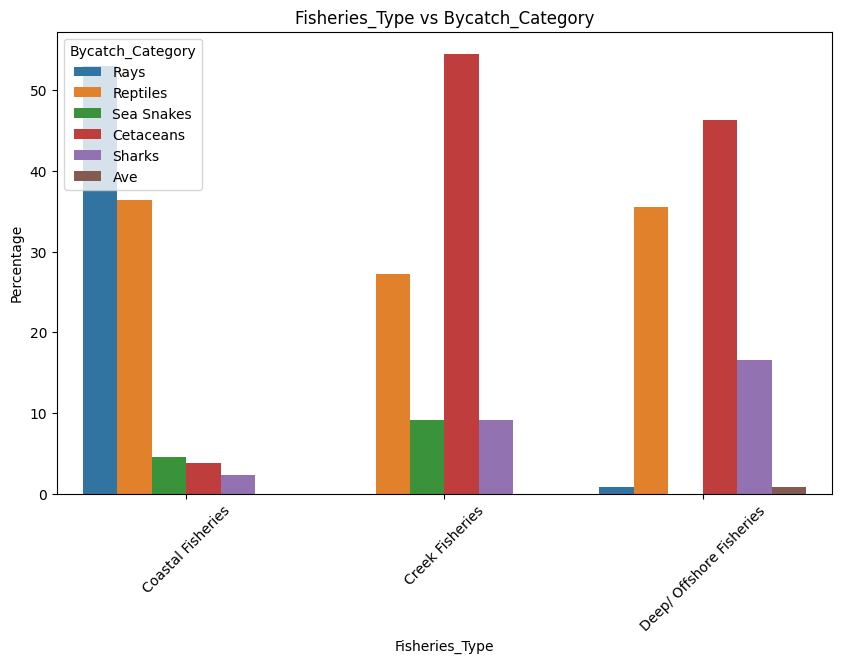

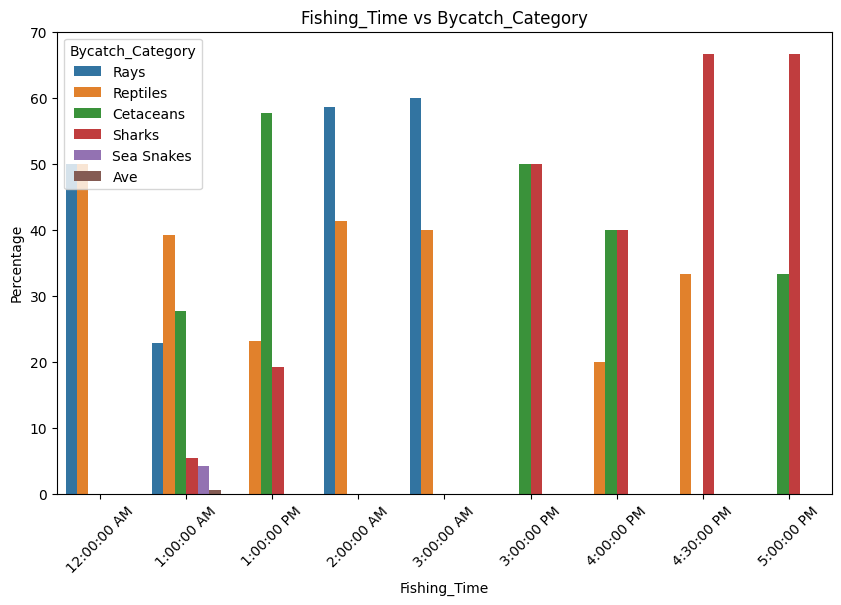

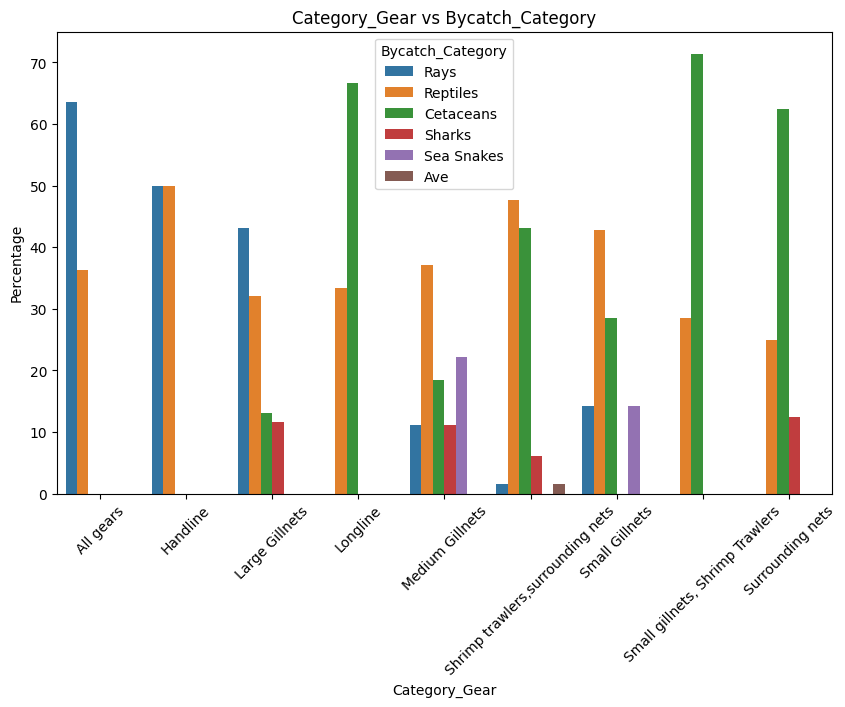

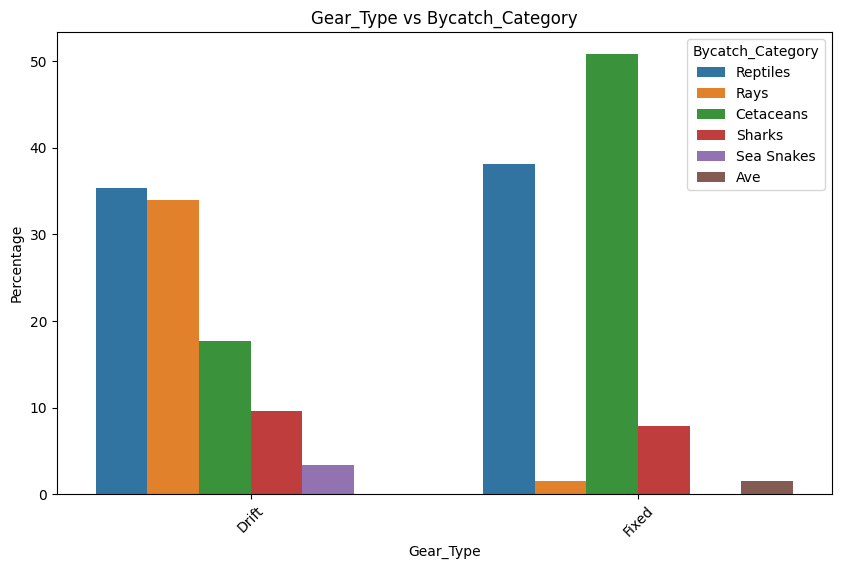

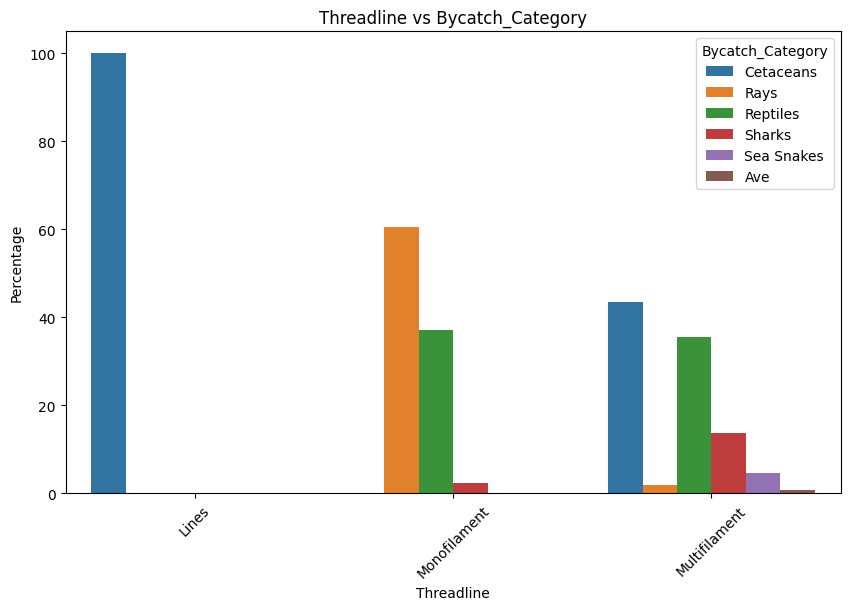

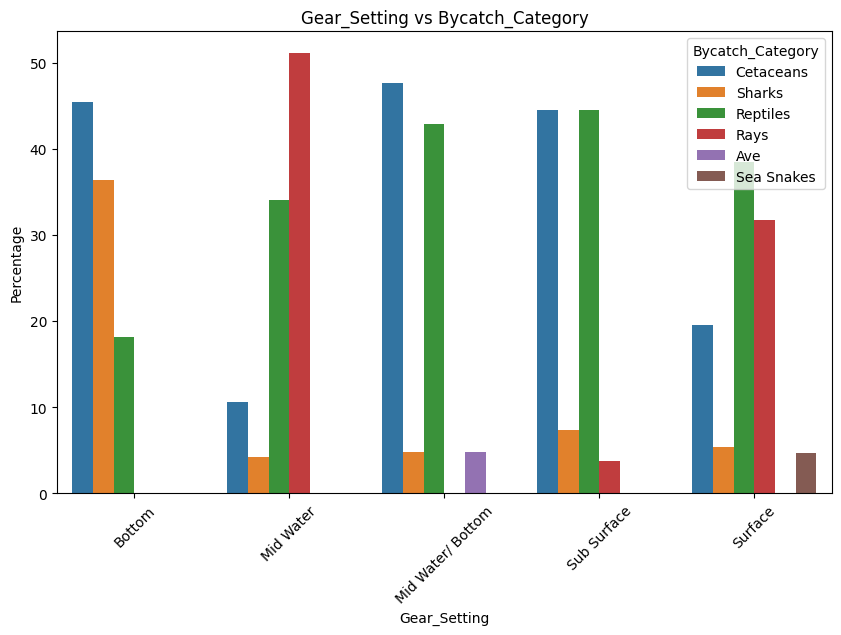

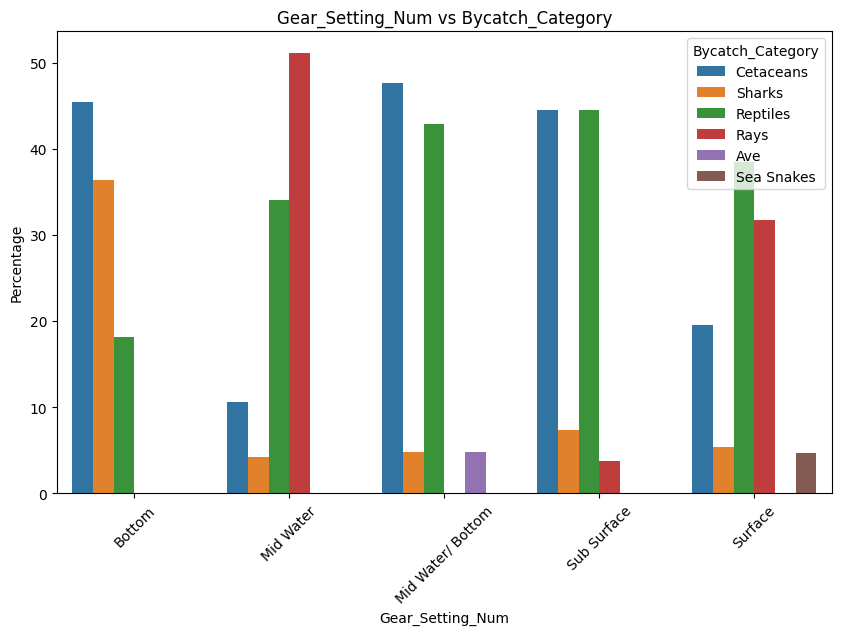

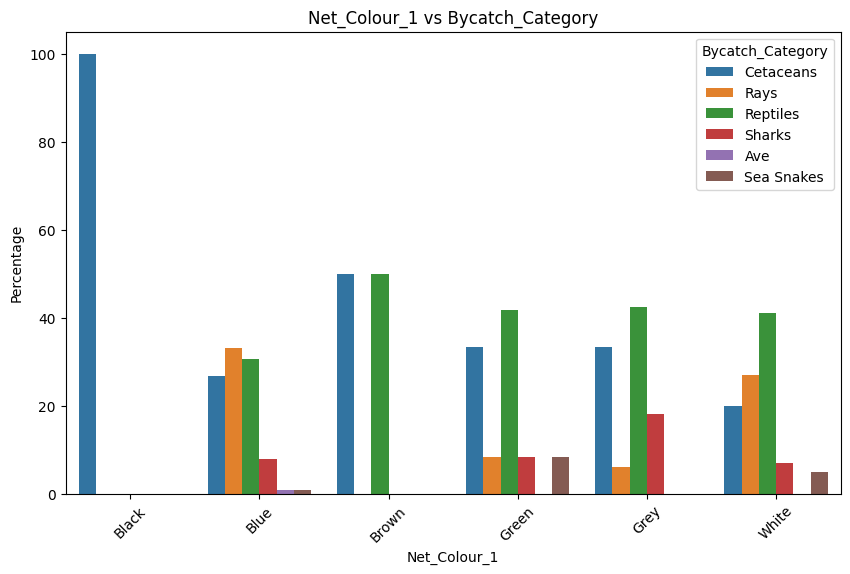

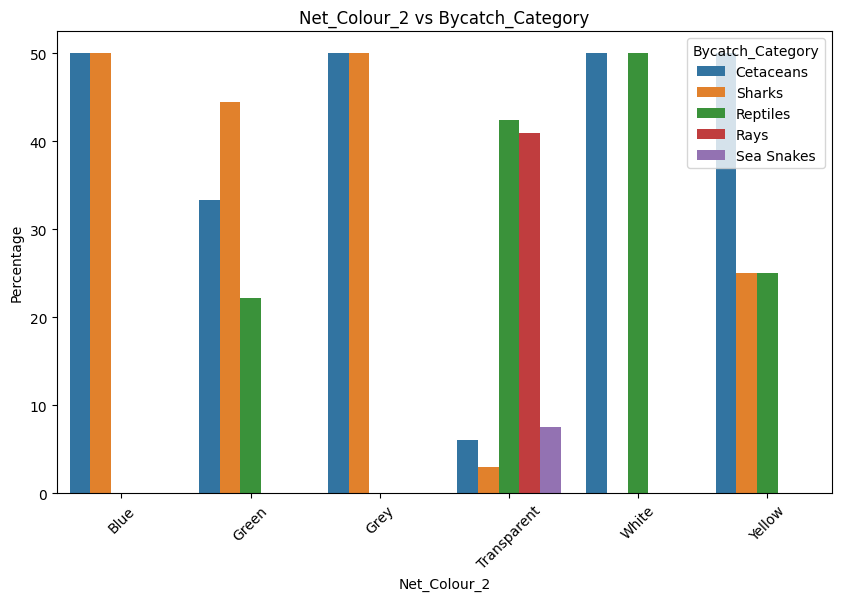

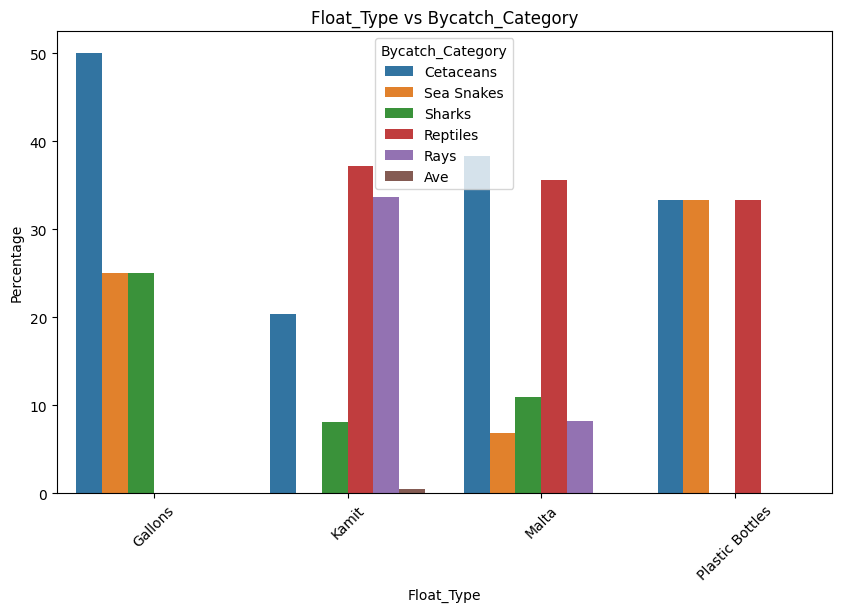

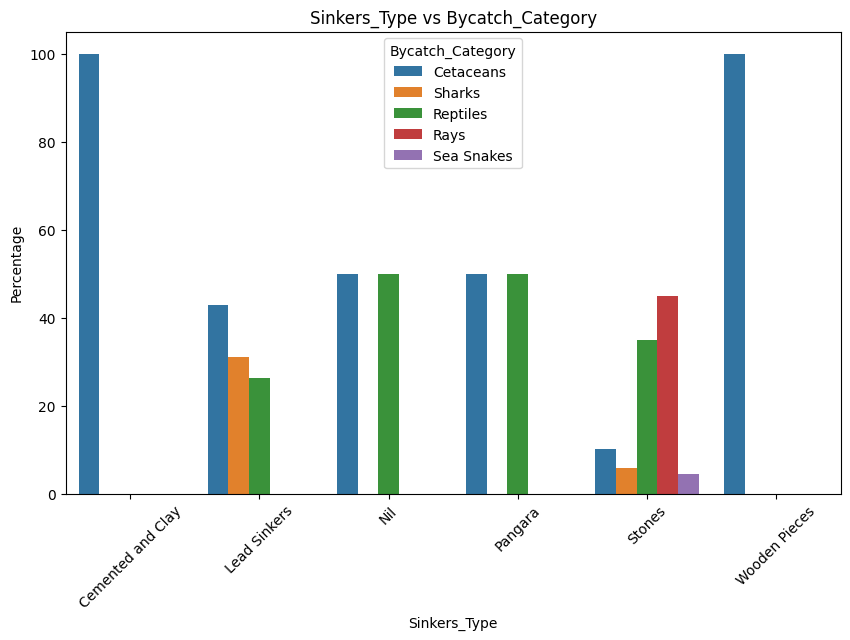

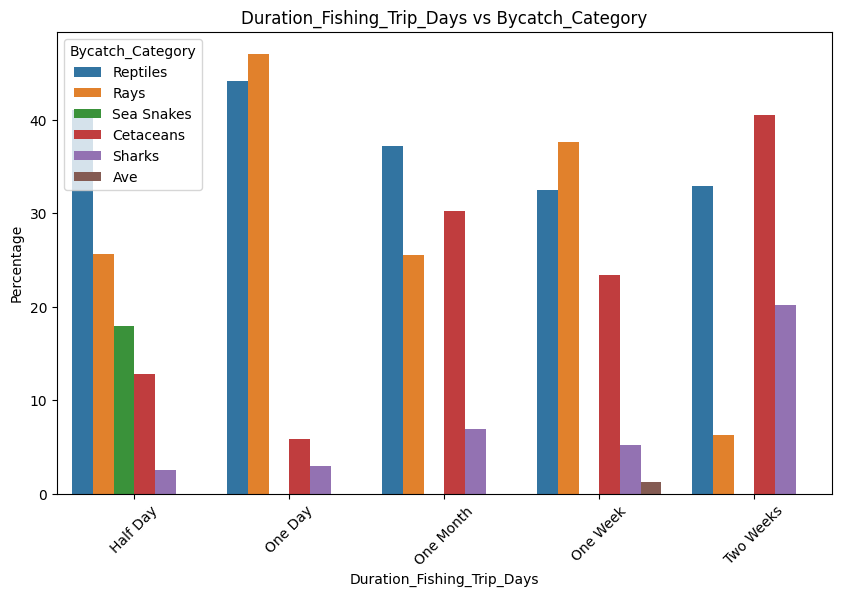

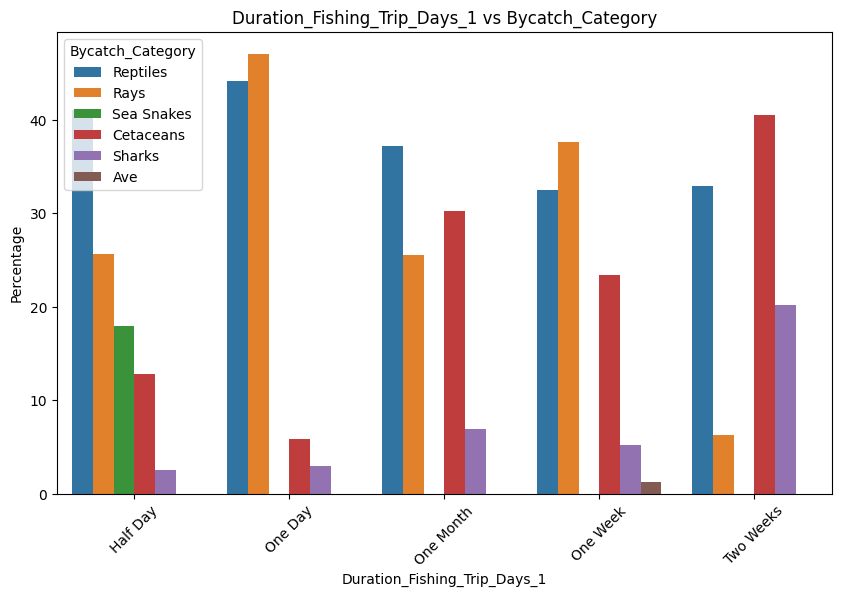

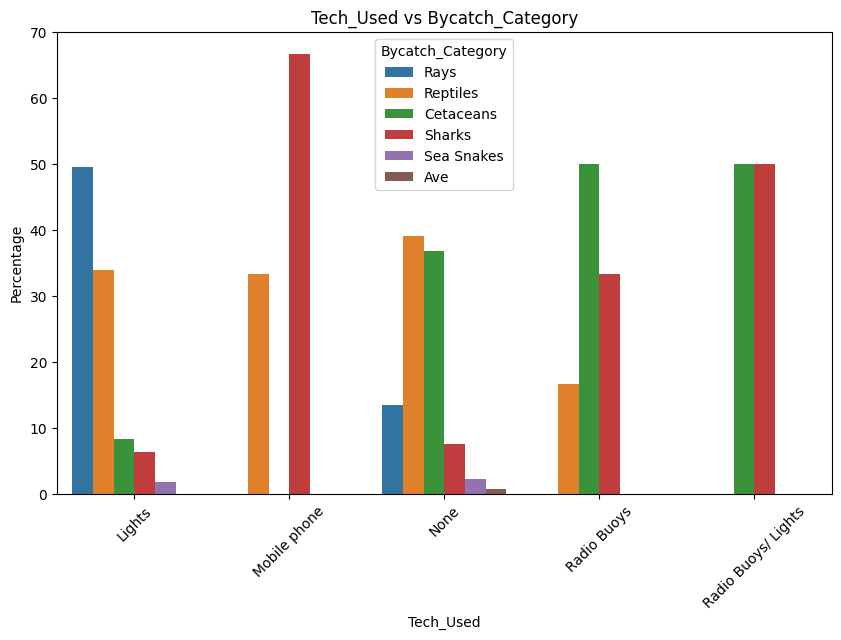

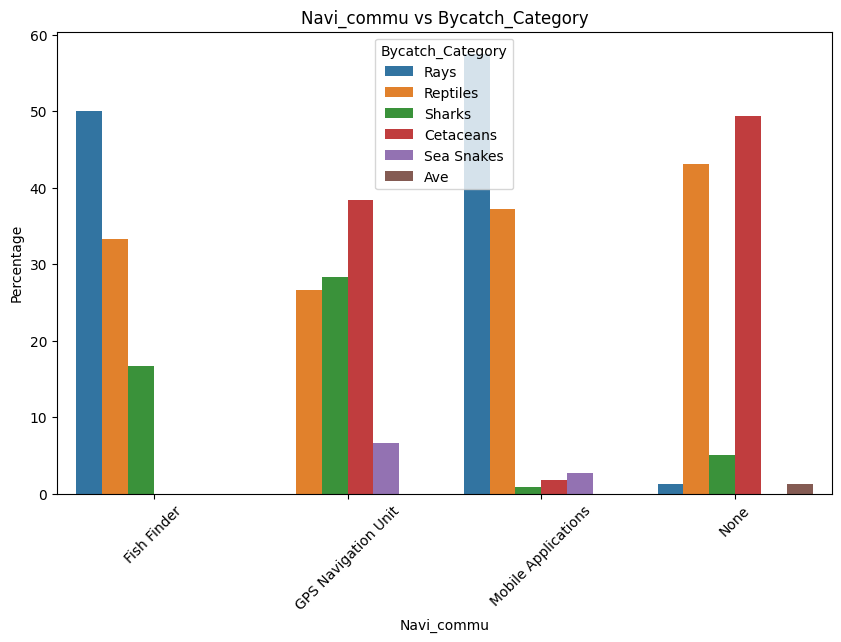

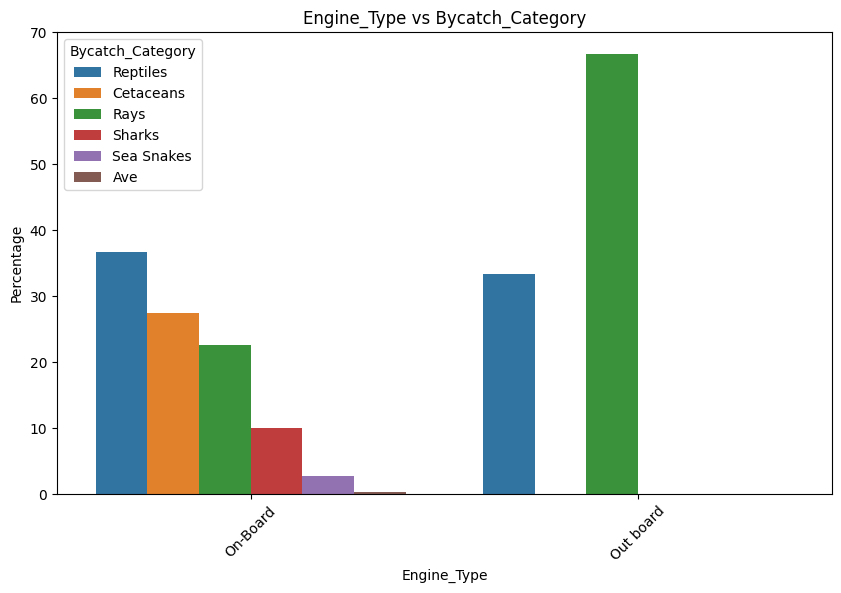

In [9]:

# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No', 'Dolphin_No', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Fisheries_Type', 'Fisheries_Type_Num', 'Boat_Sizeft', 'Fishing_Time',
                         'Category_Gear', 'Category_Gear_Num','Gear_Type', 'Threadline',
                         'Months_Gear_Used','Gear_Setting', 'Gear_Setting_Num', 'Net_Colour_1',
                         'Net_Colour_2','Gear_Length_(km)', 'Width (meters)', 'Mesh_Size (Millimeters/ Ungal)',
                         'Float_Type', 'Float_Used', 'Sinkers_Type', 'Sinkers_Used','Sinkers_Weight_kg',
                         'Duration_Fishing_Trip_Days','Duration_Fishing_Trip_Days_1', 'Total_Crew', 'Tech_Used',
                         'Navi_commu','Engine_Type', 'Horse Power', 'Total_Gear_Used']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            plt.figure(figsize=(10, 6))
            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

    


# Fish Species and Bycatch Species 

Dependent Variable: Turtle_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
         Status_1  Total_No_Year  Total months
count  364.000000     357.000000    347.000000
mean     0.846154      12.212885      2.219020
std      0.361298      37.576657      3.082373
min      0.000000       1.000000      1.000000
25%      1.000000       2.000000      1.000000
50%      1.000000       3.000000      1.000000
75%      1.000000       5.000000      2.000000
max      1.000000     500.000000     12.000000



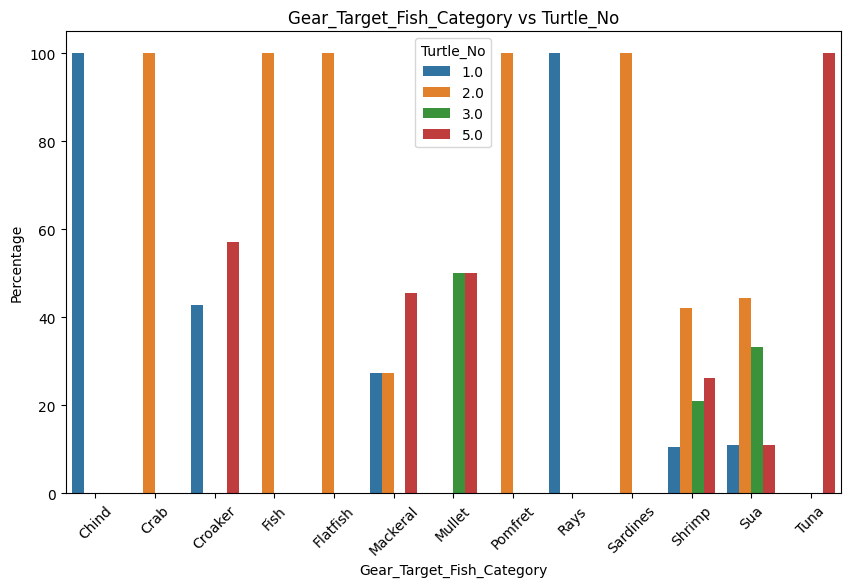

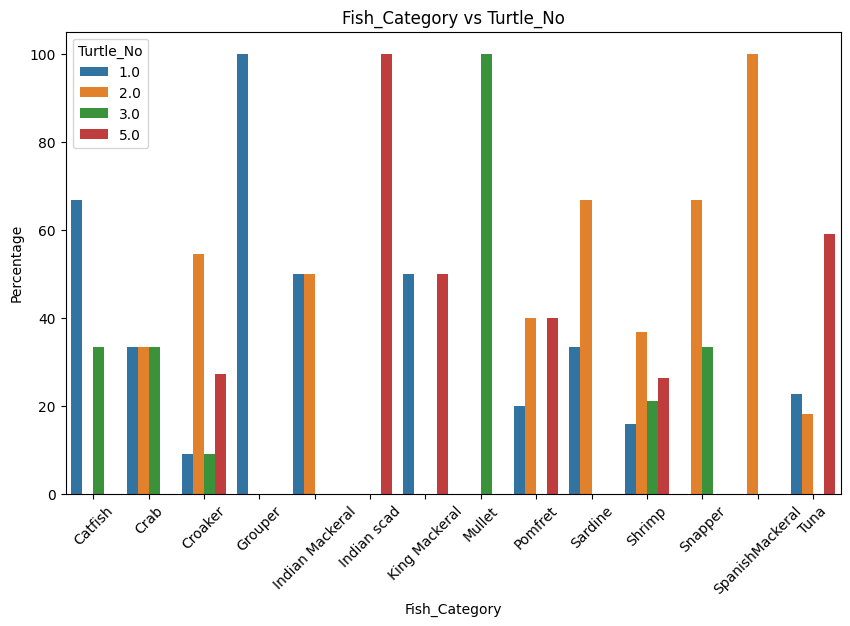

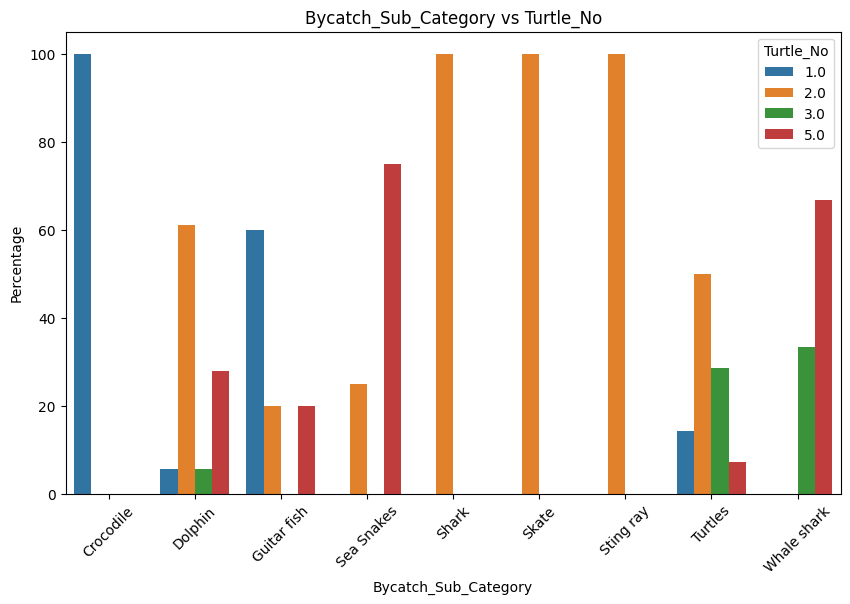

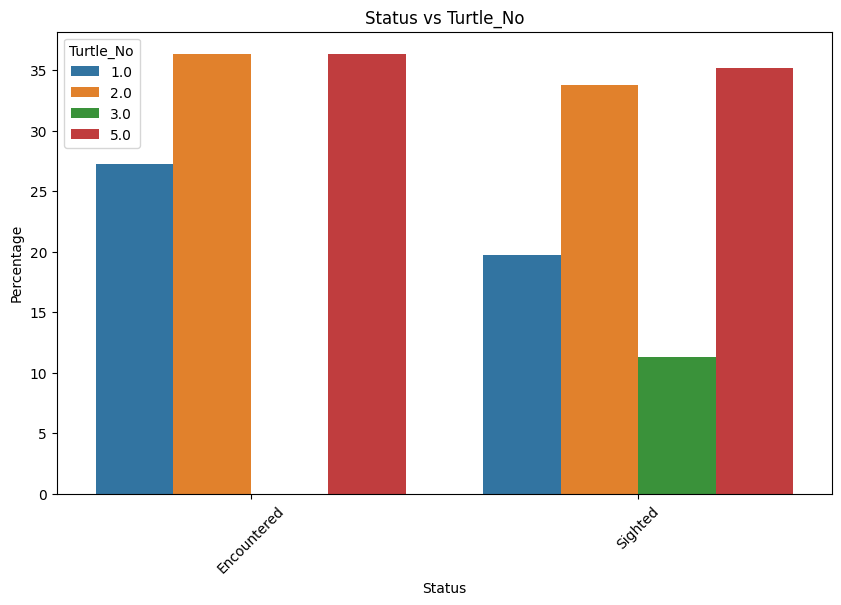

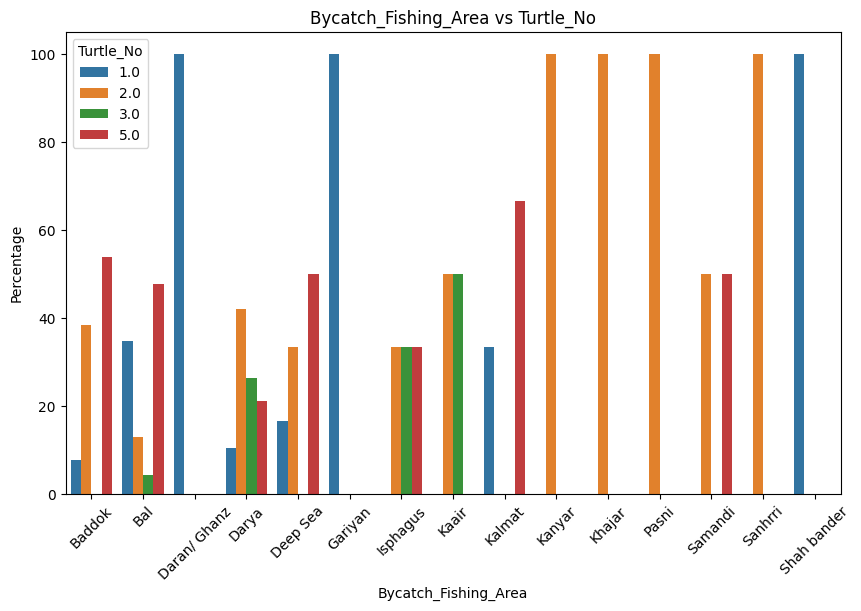

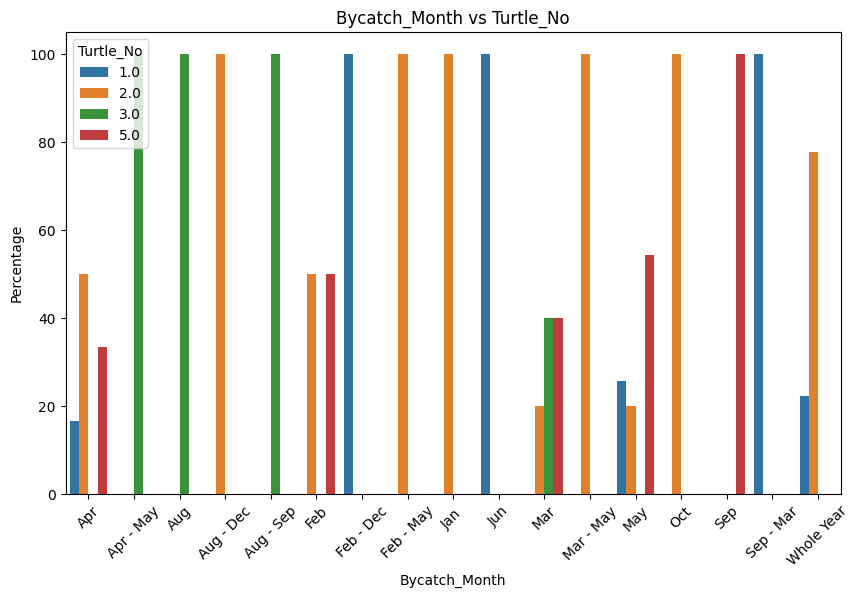

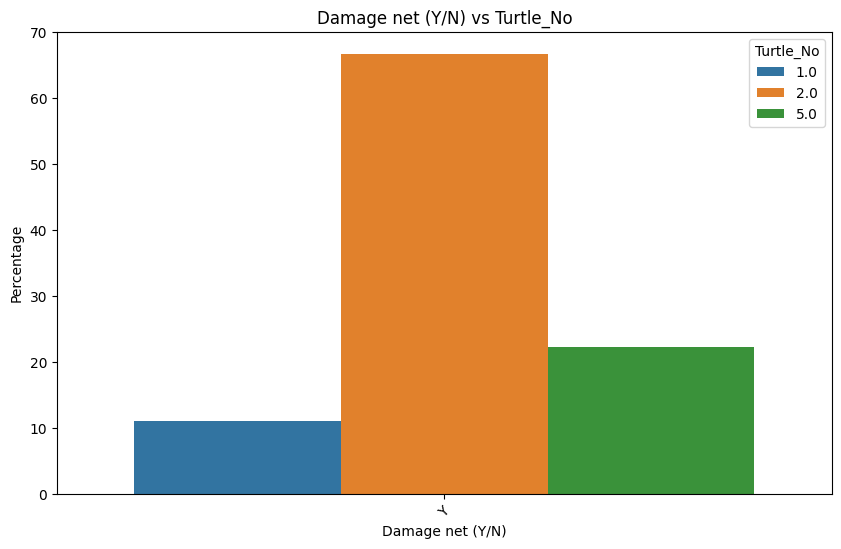

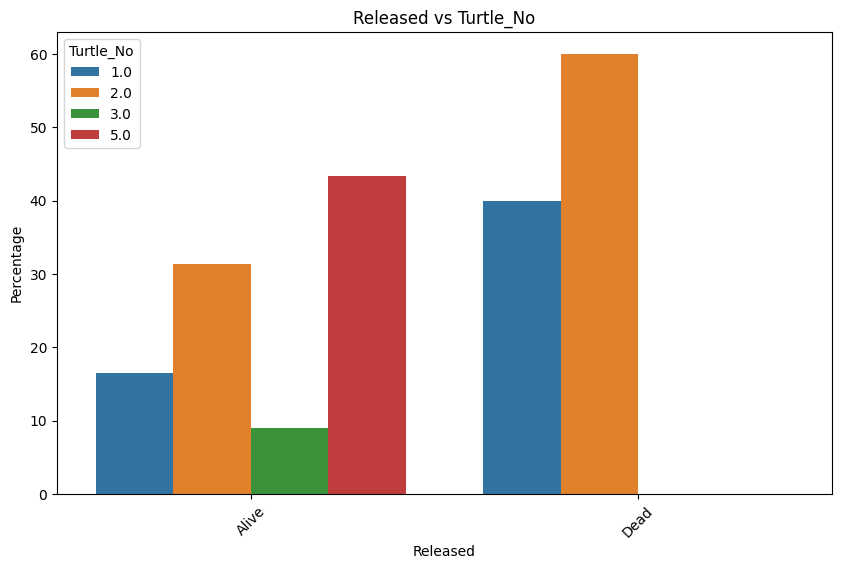

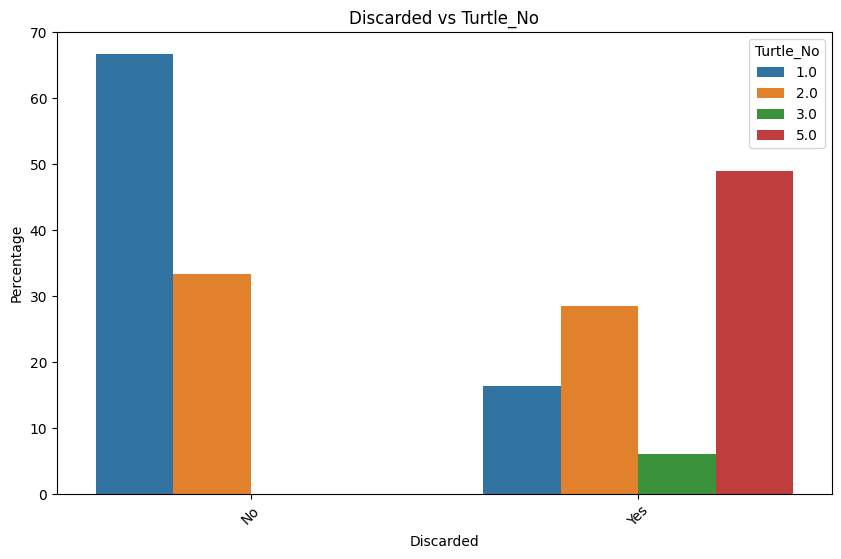

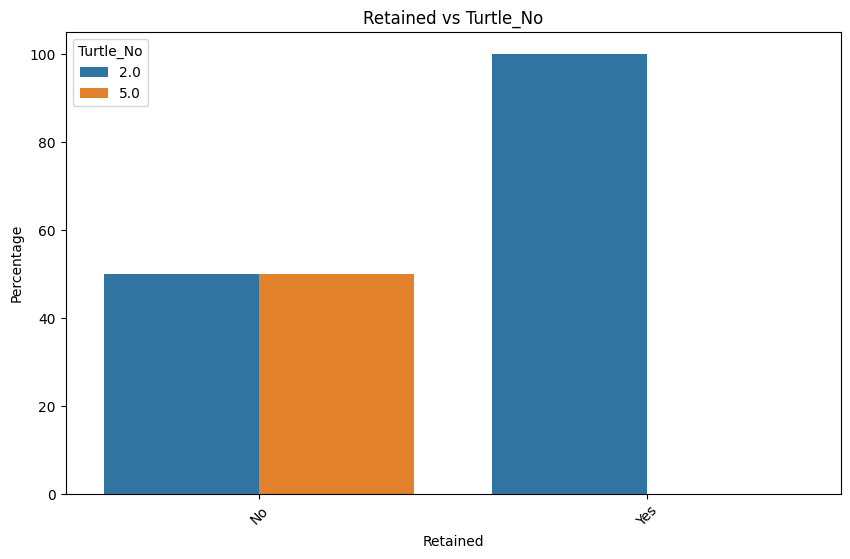

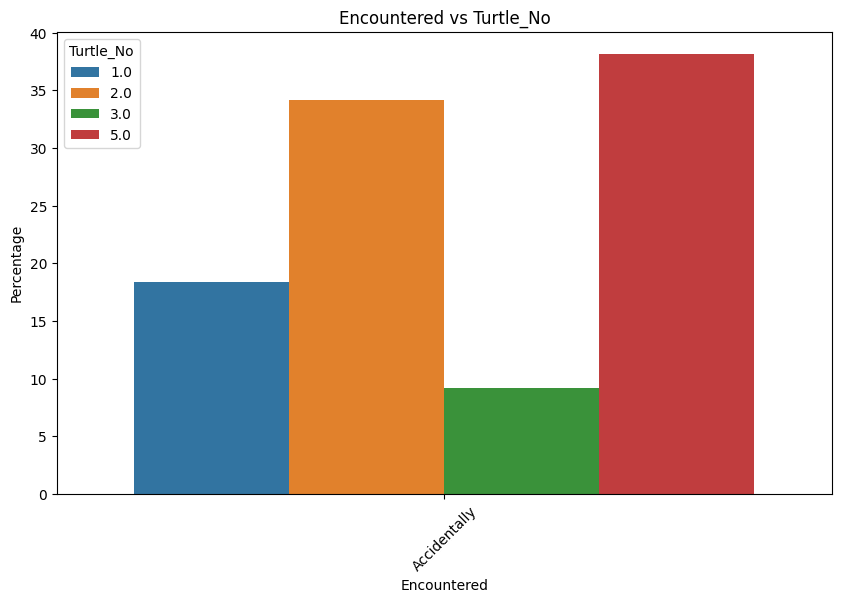

Dependent Variable: Dolphin_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
         Status_1  Total_No_Year  Total months
count  364.000000     357.000000    347.000000
mean     0.846154      12.212885      2.219020
std      0.361298      37.576657      3.082373
min      0.000000       1.000000      1.000000
25%      1.000000       2.000000      1.000000
50%      1.000000       3.000000      1.000000
75%      1.000000       5.000000      2.000000
max      1.000000     500.000000     12.000000



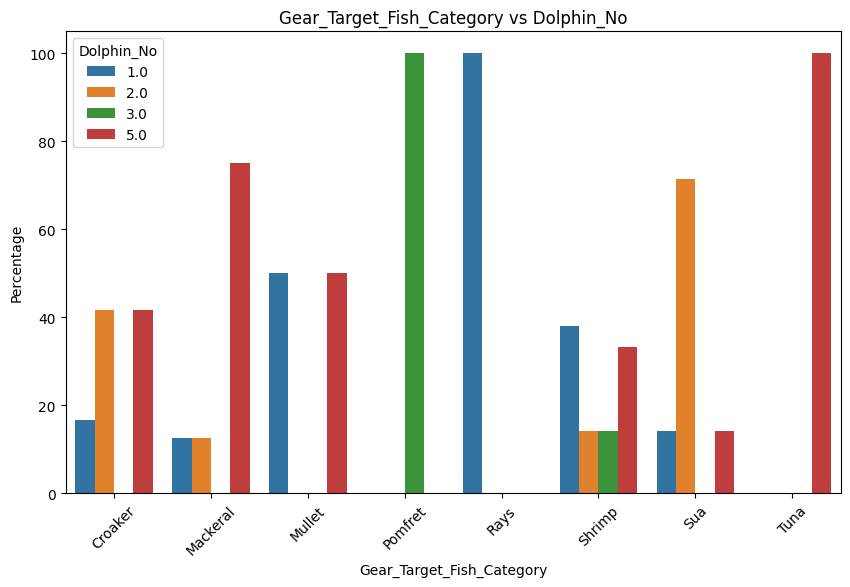

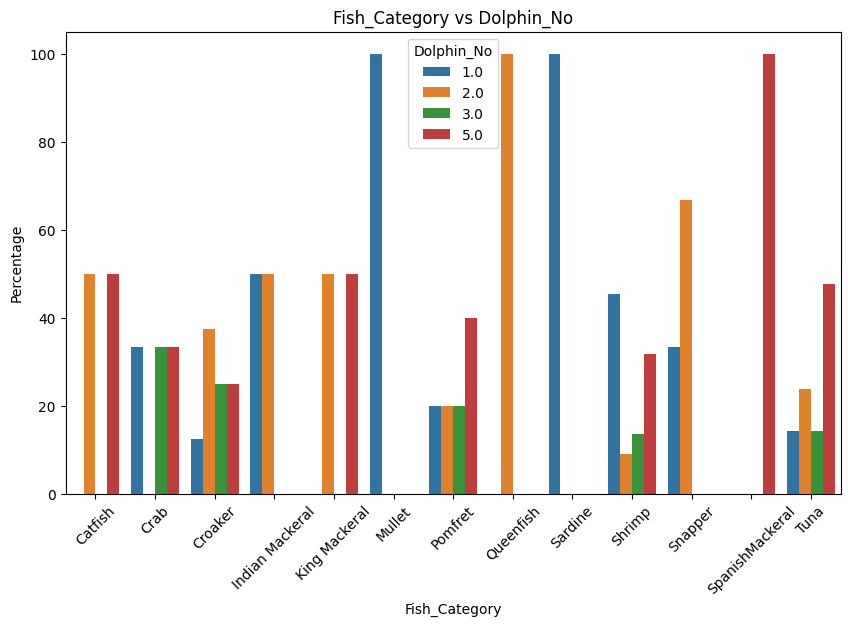

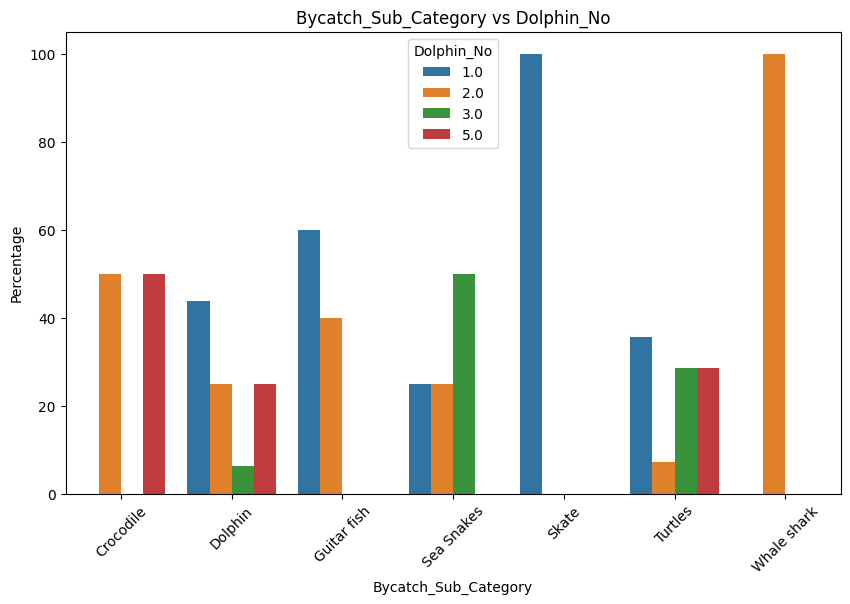

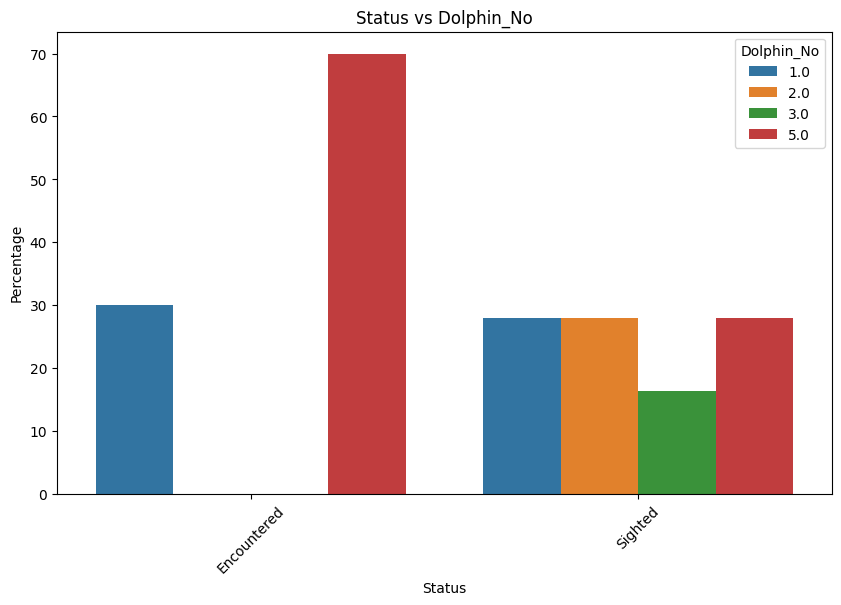

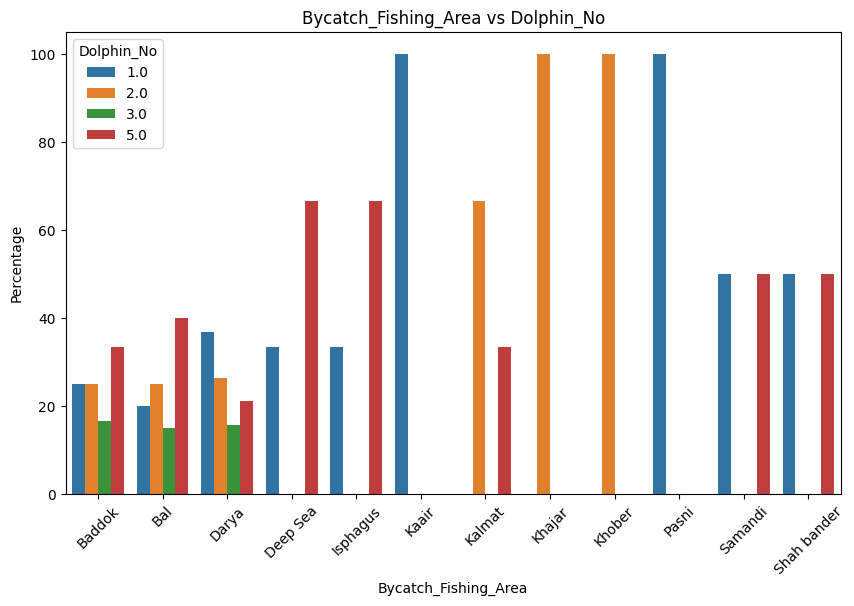

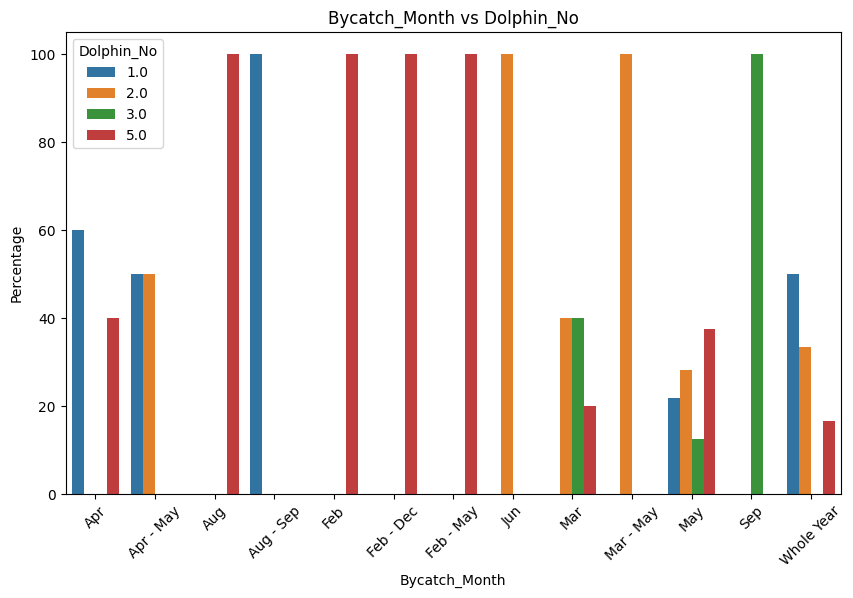

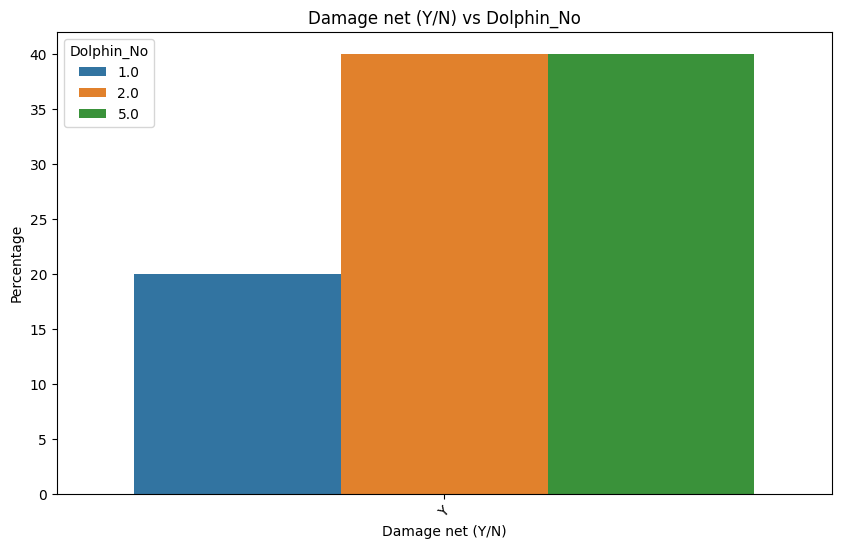

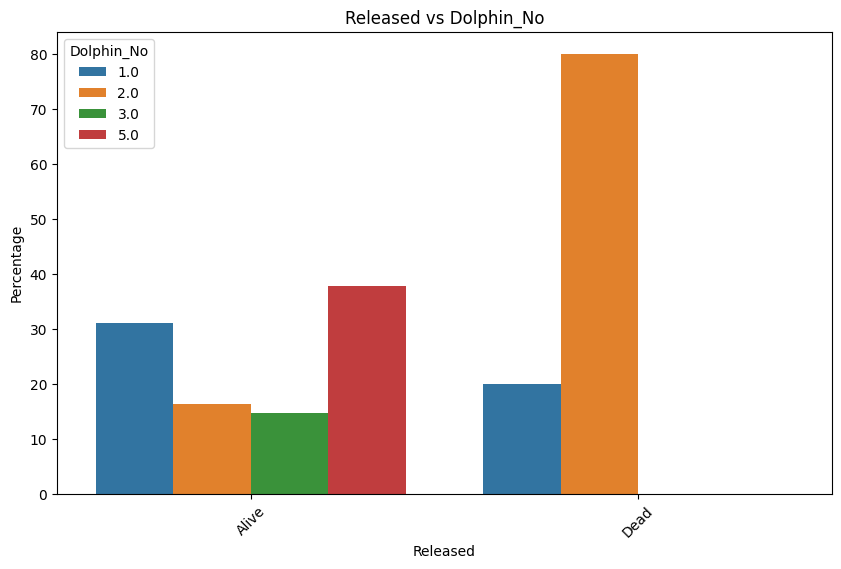

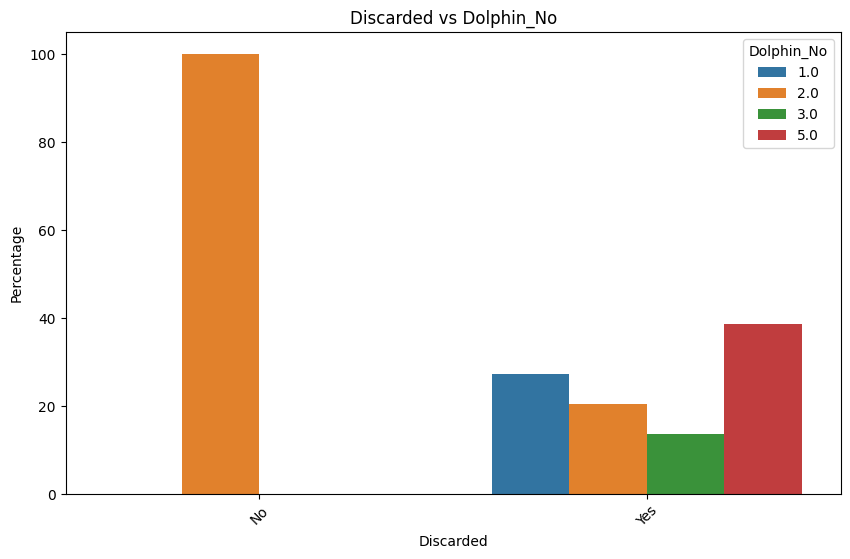

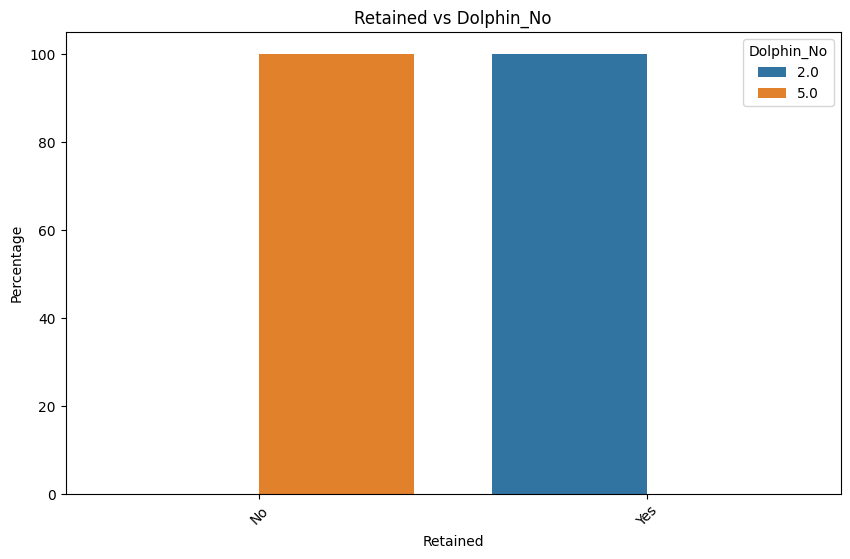

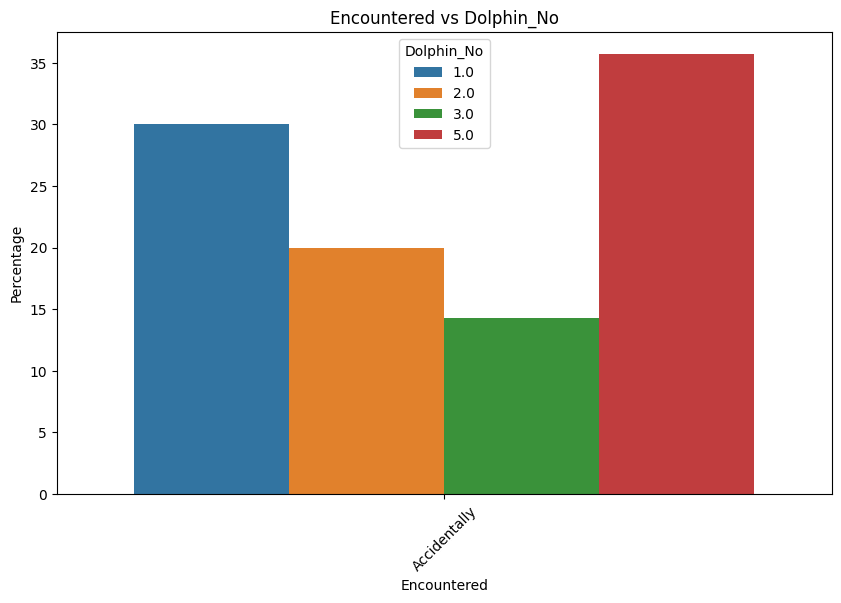

Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
         Status_1  Total_No_Year  Total months
count  364.000000     357.000000    347.000000
mean     0.846154      12.212885      2.219020
std      0.361298      37.576657      3.082373
min      0.000000       1.000000      1.000000
25%      1.000000       2.000000      1.000000
50%      1.000000       3.000000      1.000000
75%      1.000000       5.000000      2.000000
max      1.000000     500.000000     12.000000



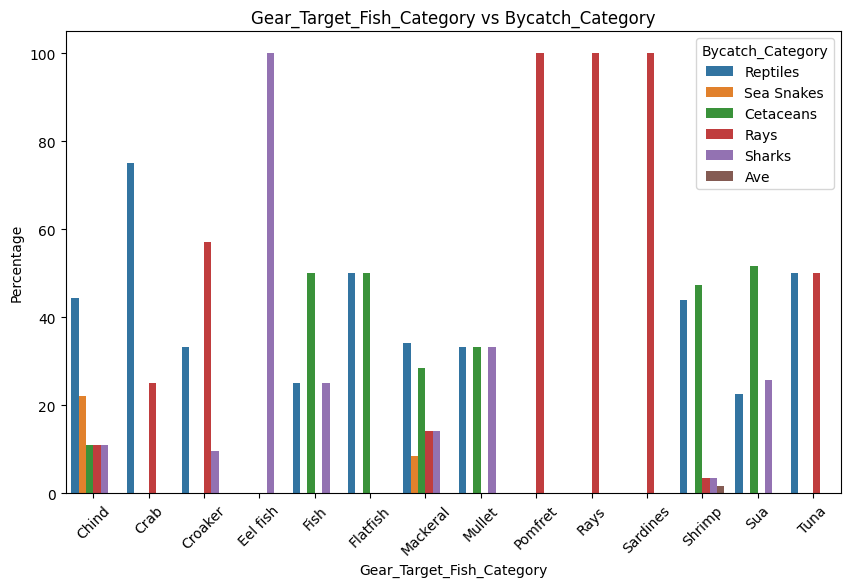

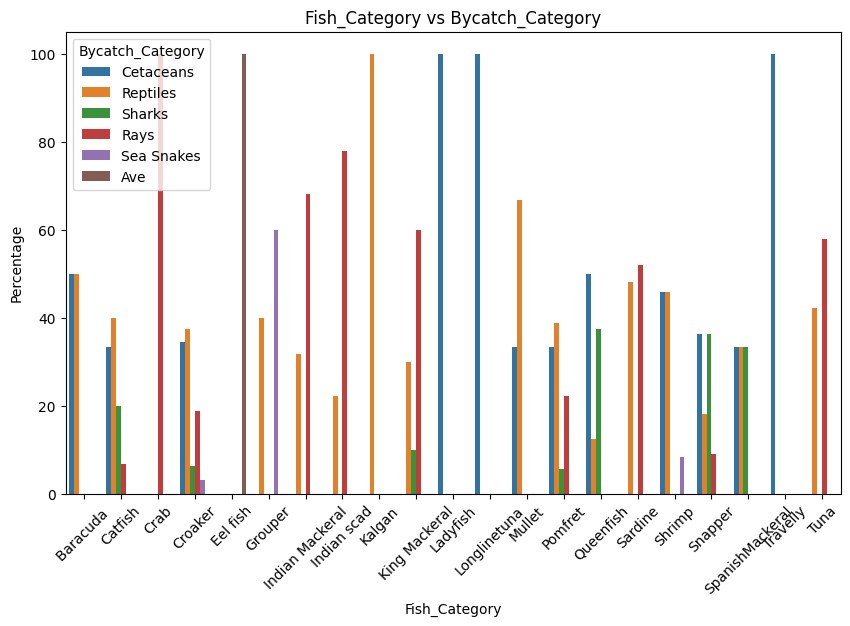

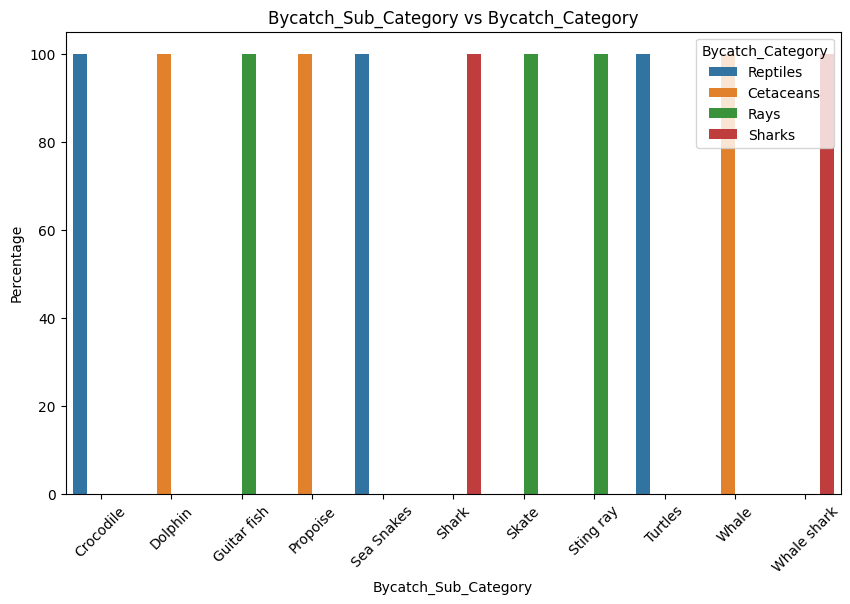

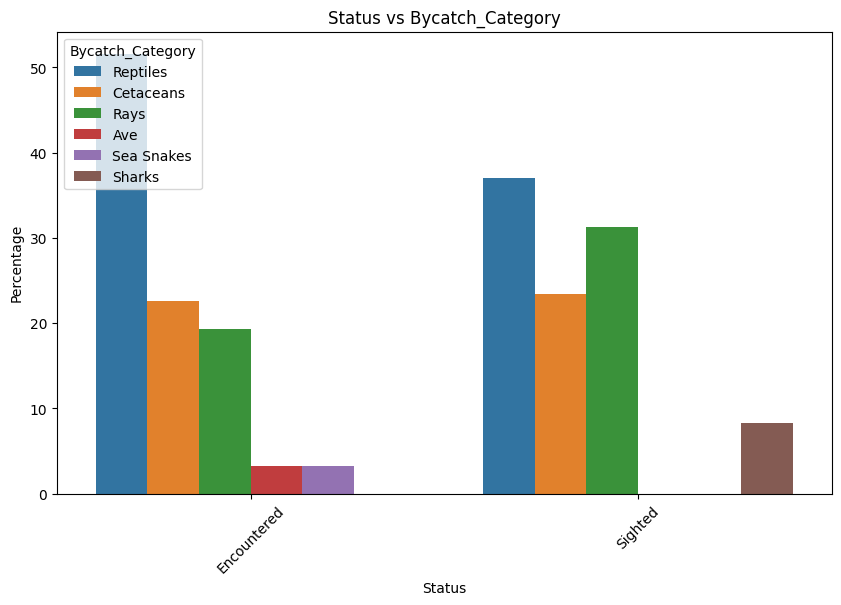

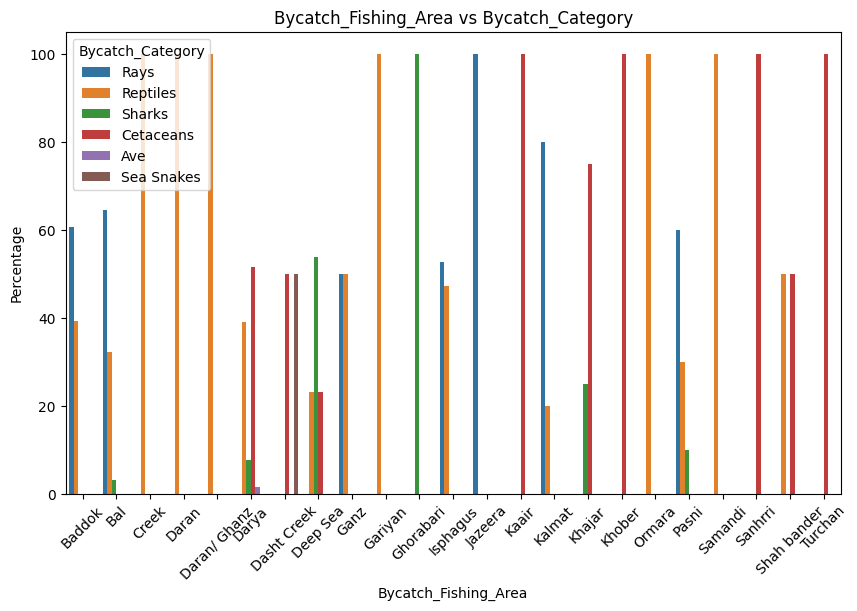

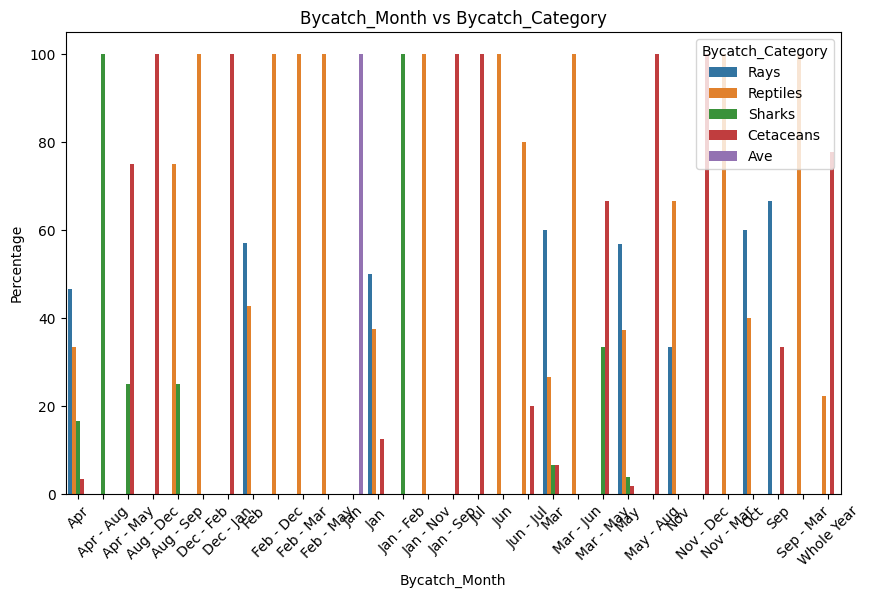

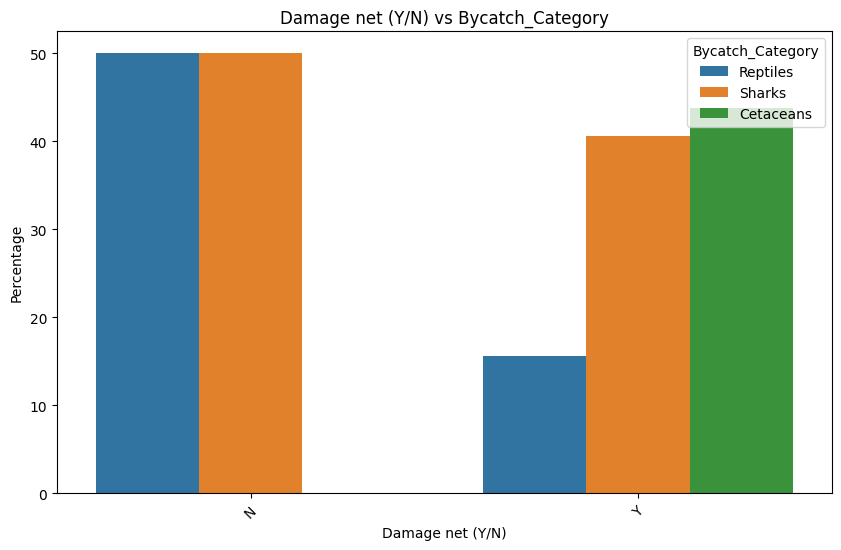

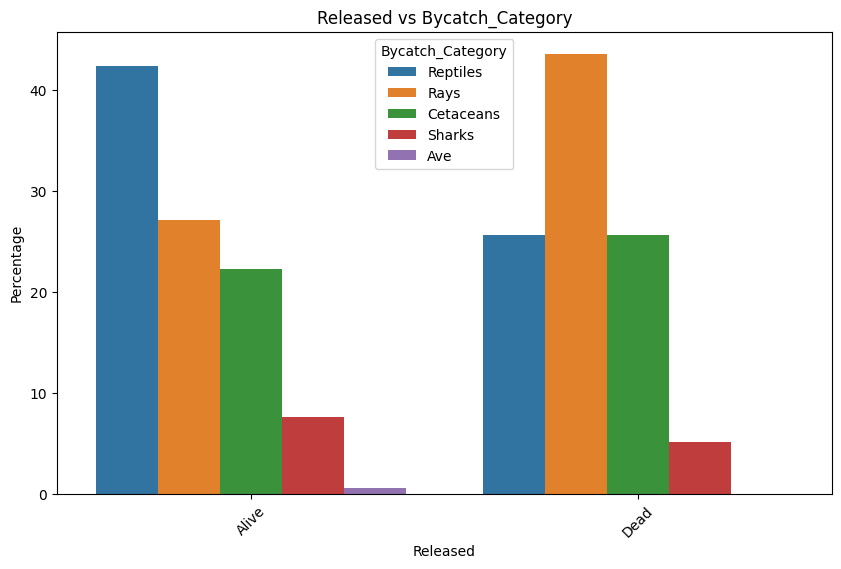

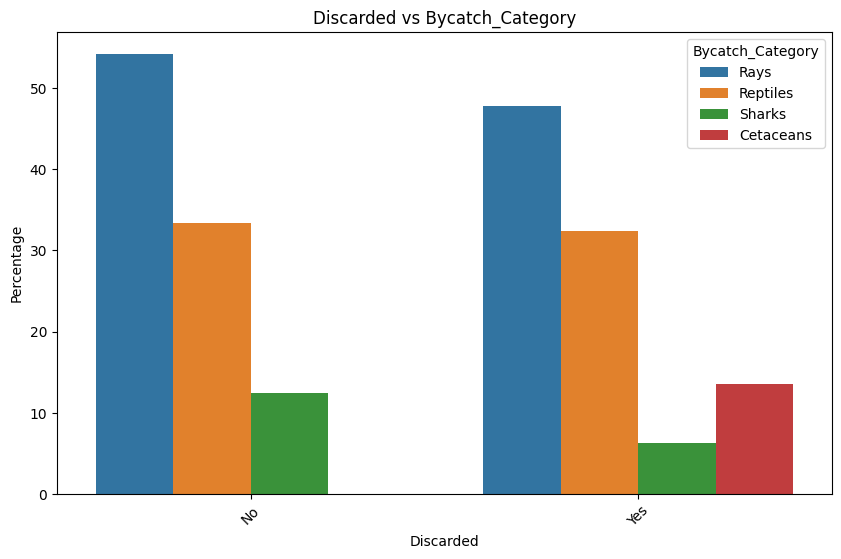

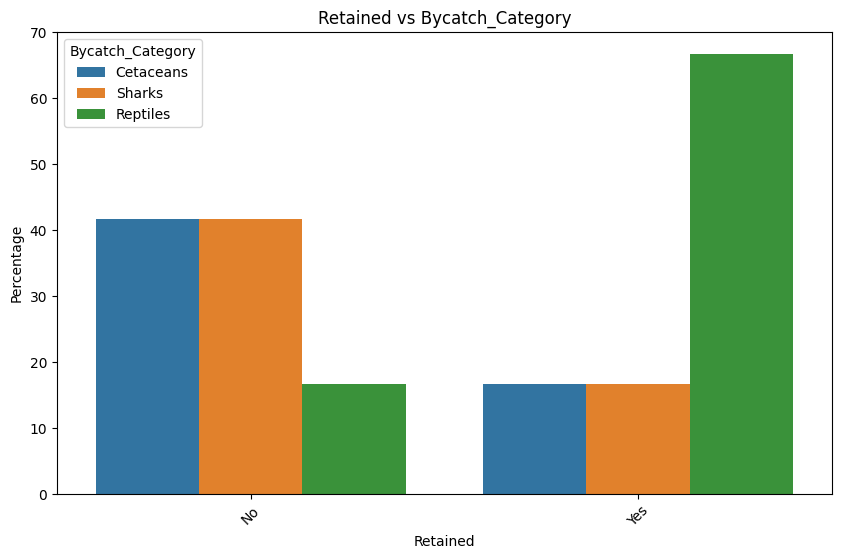

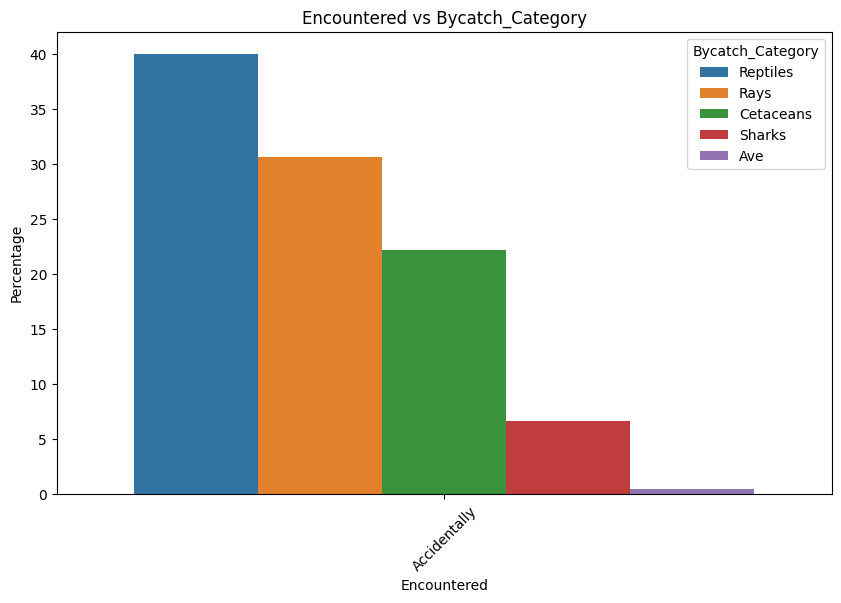

In [10]:
# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No', 'Dolphin_No', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Gear_Target_Fish_Category',
                         'Fish_Category', 'Bycatch_Sub_Category', 'Status','Status_1', 'Total_No_Year',
                         'Bycatch_Fishing_Area', 'Bycatch_Month','Total months', 'Damage net (Y/N)',
                         'Released', 'Discarded', 'Retained', 'Encountered']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            plt.figure(figsize=(10, 6))
            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

   

# Attitude and Perception Towards Bycatch and Cetaceans Bycatch, Collaboration

Dependent Variable: Turtle_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Shifted Fishing Techniques  \
count                         203   
unique                          2   
top                            No   
freq                          197   

                            If yes, Change Technique name  \
count                                                   7   
unique                                                  6   
top     Increased the number of floaters and sinkers o...   
freq                                                    2   

       Awareness on Conservation Animals should not be caught  \
count                        201                          209   
unique                         3                            4   
top                           No                           No   
freq                         196                          114   

         If_Yes_Explain Facilitate data collec

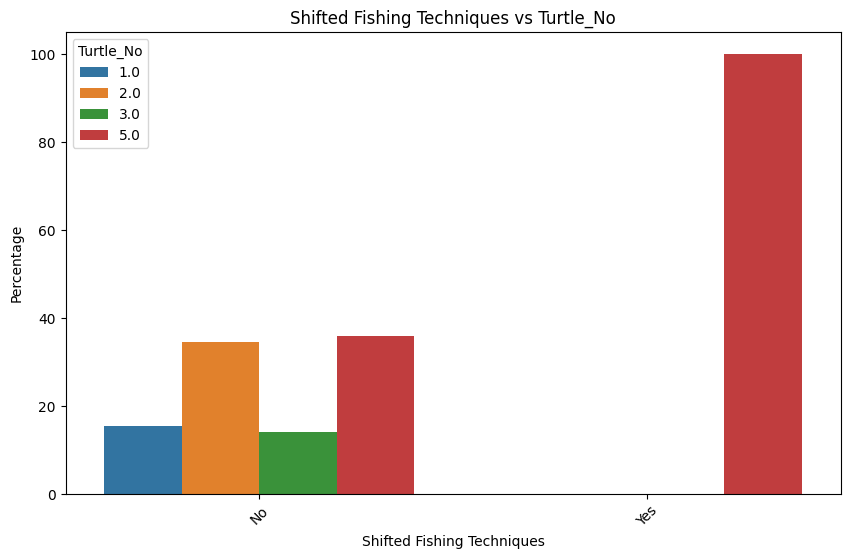

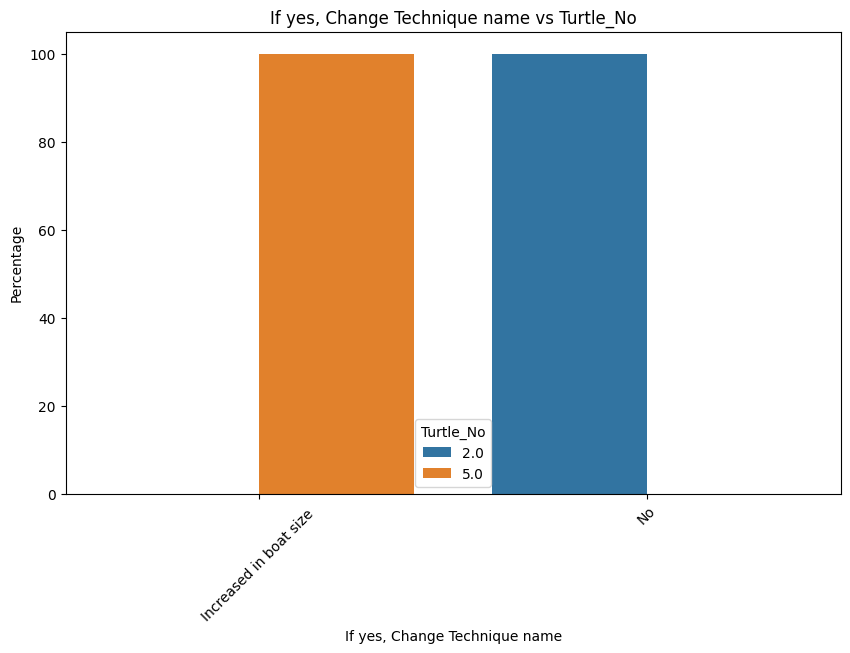

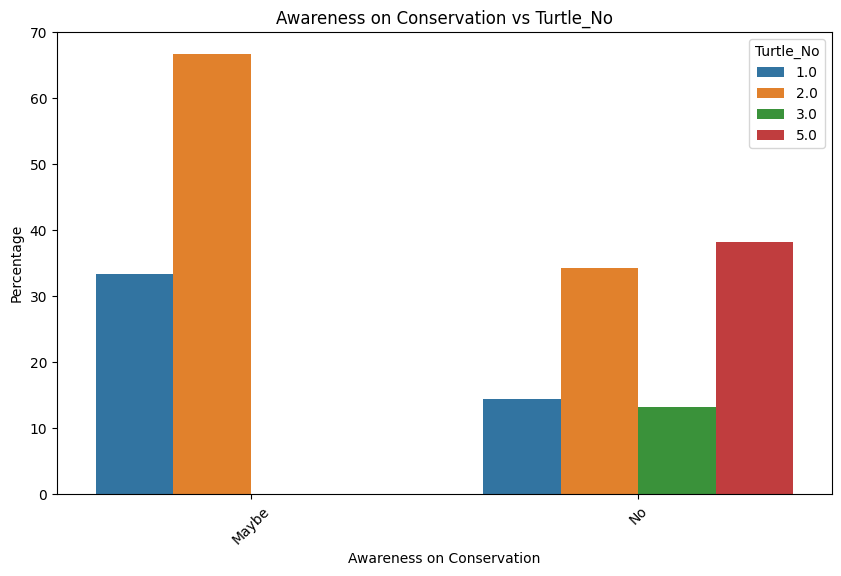

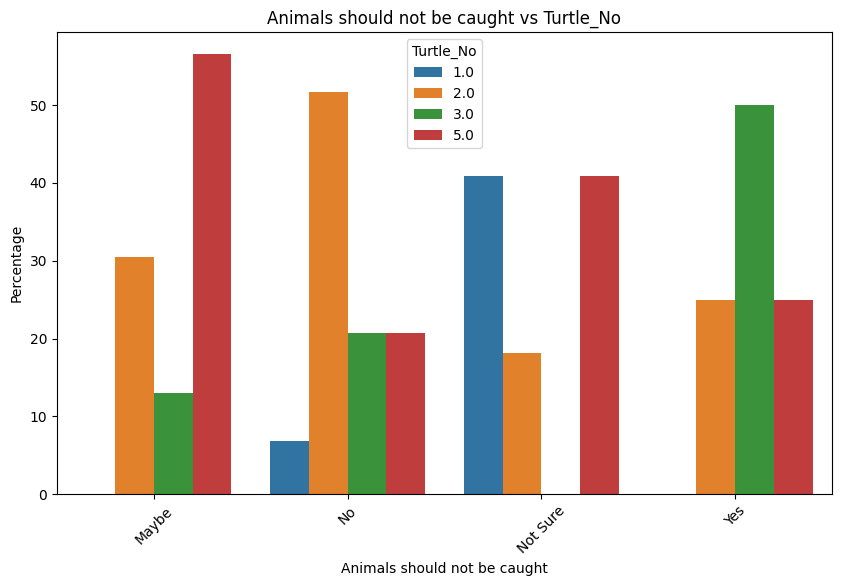

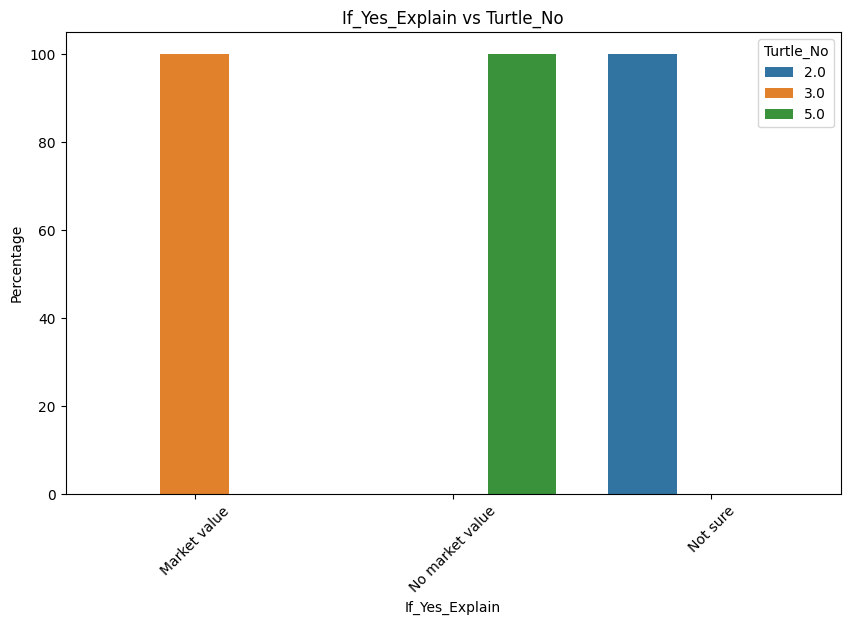

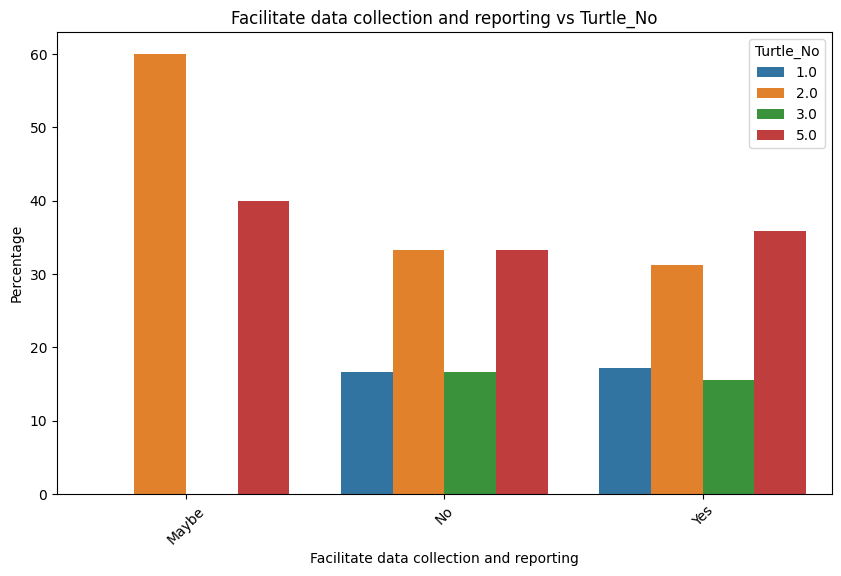

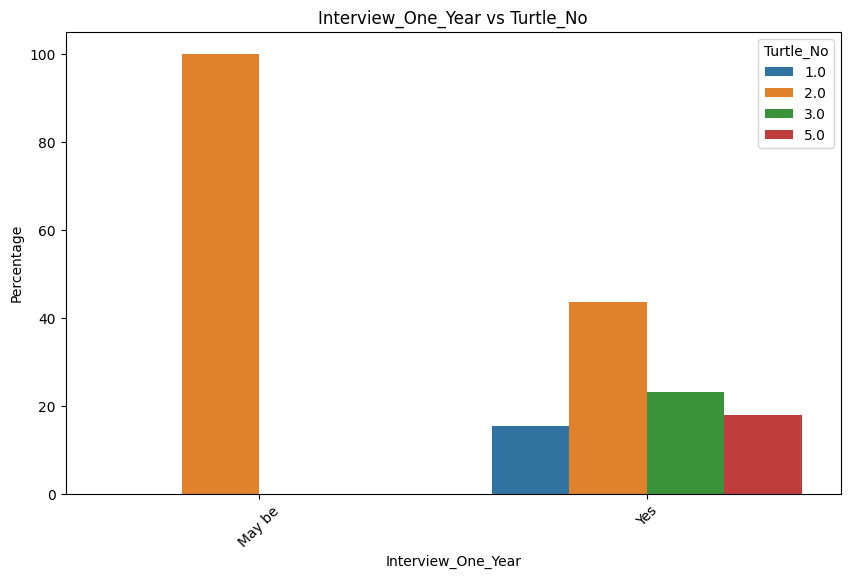

Dependent Variable: Dolphin_No
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Shifted Fishing Techniques  \
count                         203   
unique                          2   
top                            No   
freq                          197   

                            If yes, Change Technique name  \
count                                                   7   
unique                                                  6   
top     Increased the number of floaters and sinkers o...   
freq                                                    2   

       Awareness on Conservation Animals should not be caught  \
count                        201                          209   
unique                         3                            4   
top                           No                           No   
freq                         196                          114   

         If_Yes_Explain Facilitate data colle

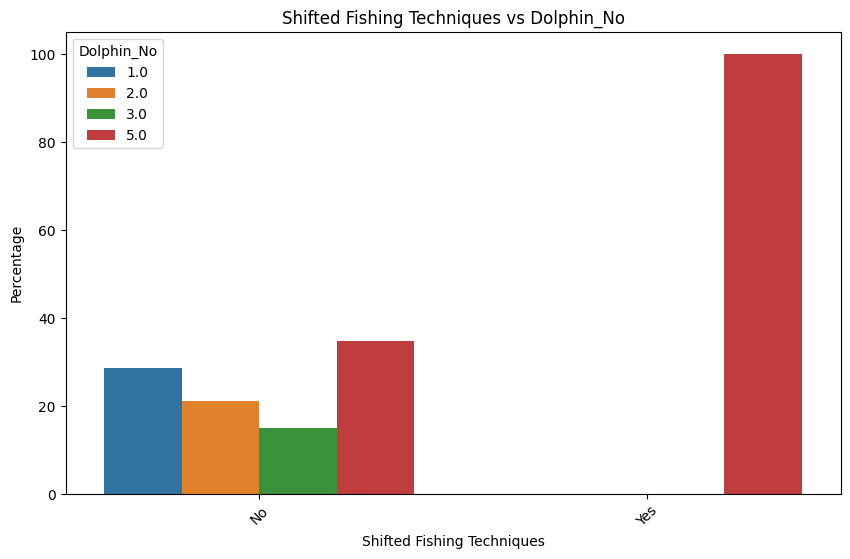

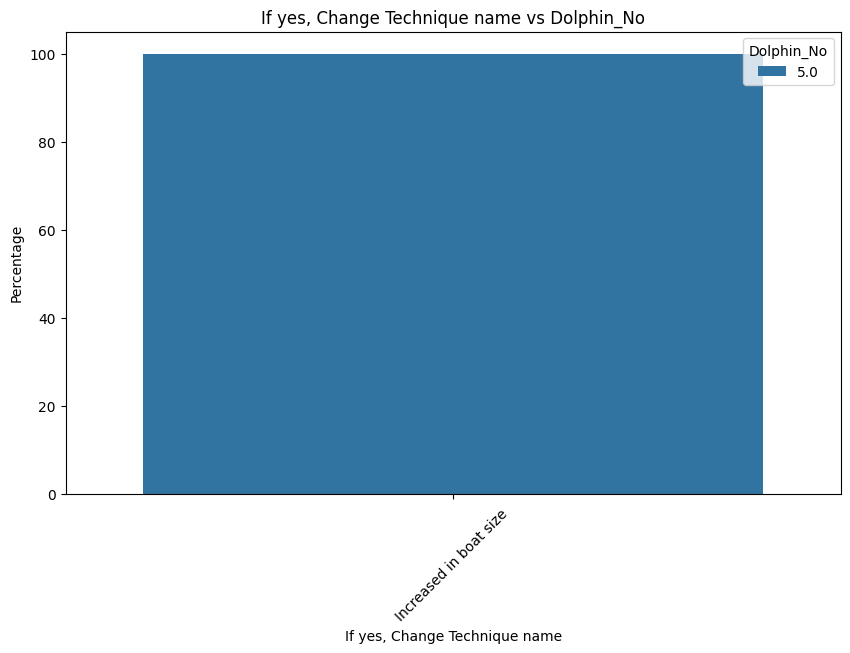

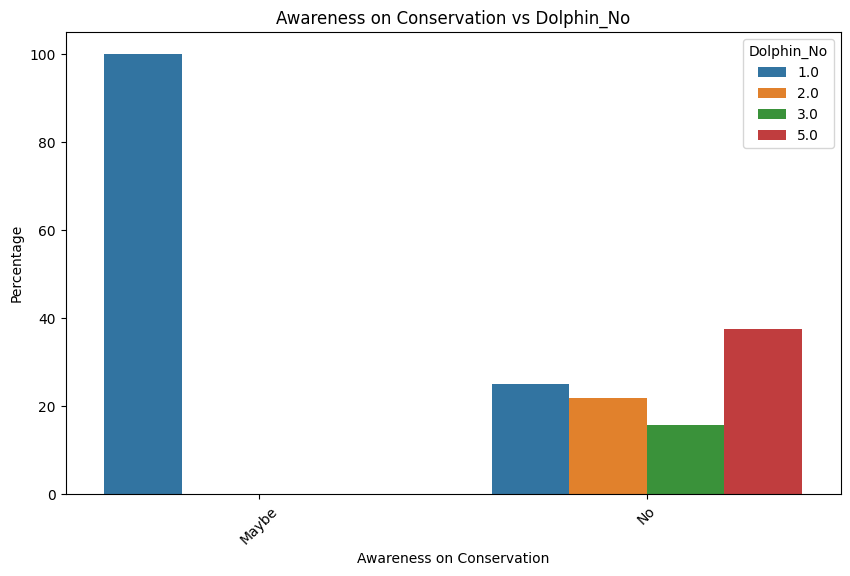

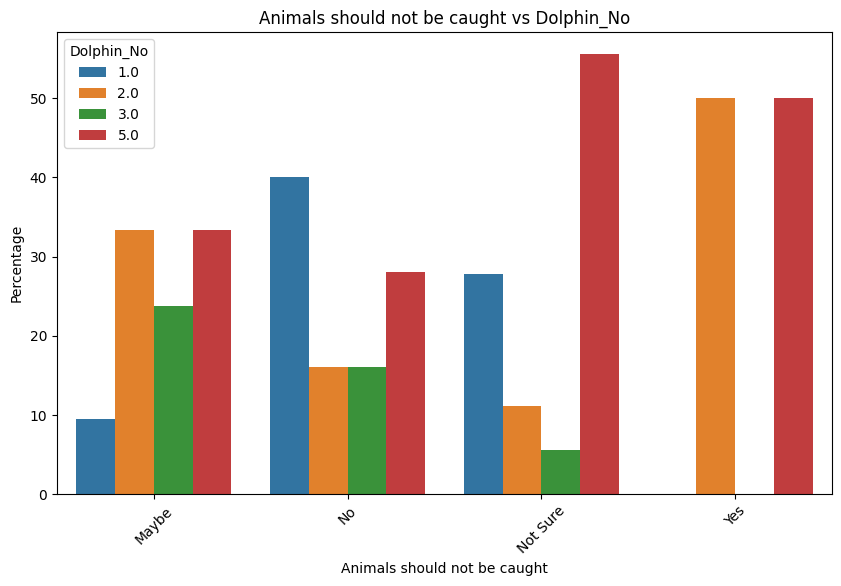

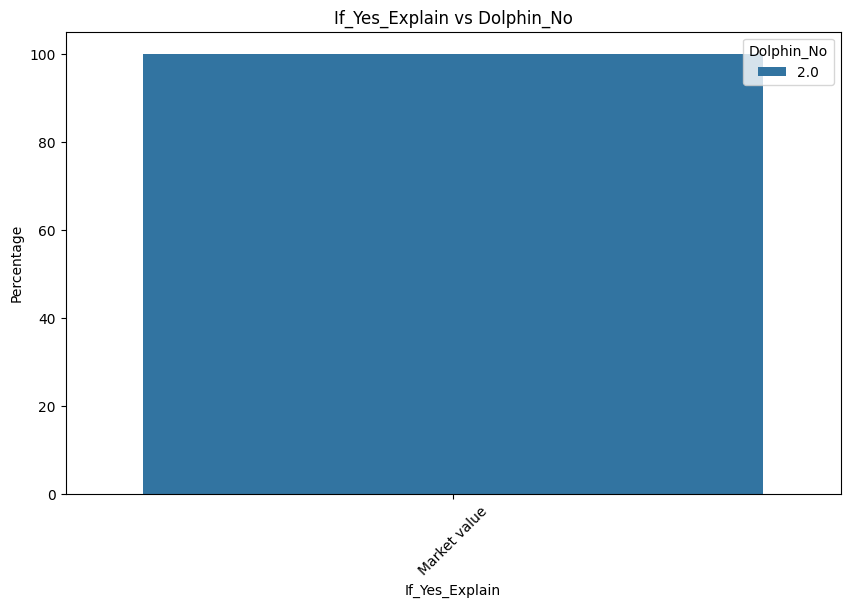

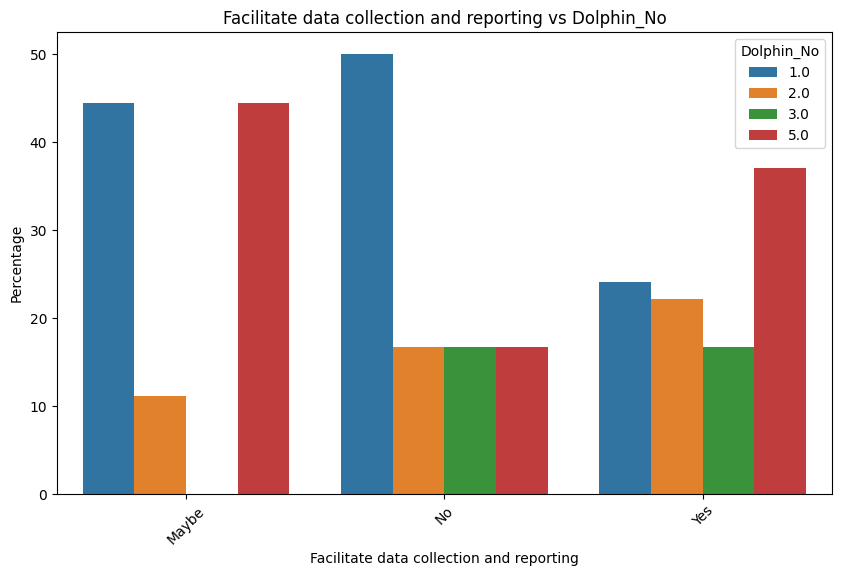

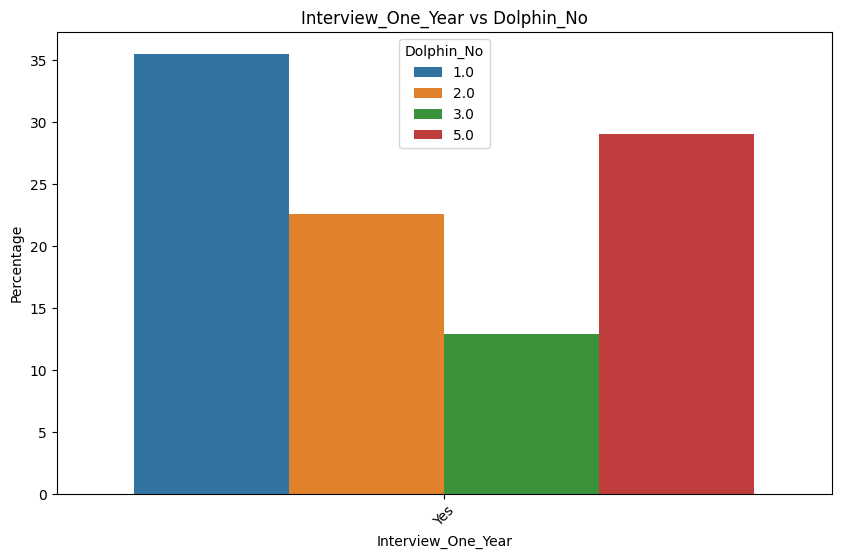

Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Shifted Fishing Techniques  \
count                         203   
unique                          2   
top                            No   
freq                          197   

                            If yes, Change Technique name  \
count                                                   7   
unique                                                  6   
top     Increased the number of floaters and sinkers o...   
freq                                                    2   

       Awareness on Conservation Animals should not be caught  \
count                        201                          209   
unique                         3                            4   
top                           No                           No   
freq                         196                          114   

         If_Yes_Explain Facilitate data

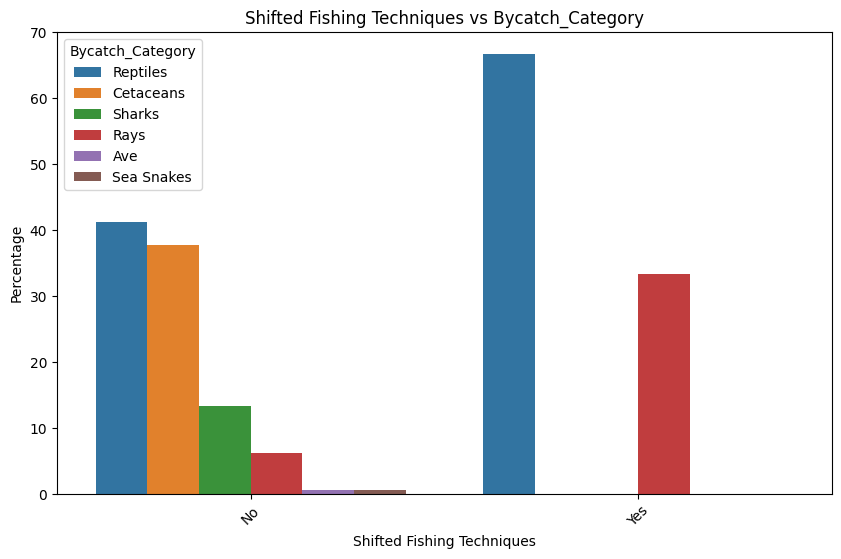

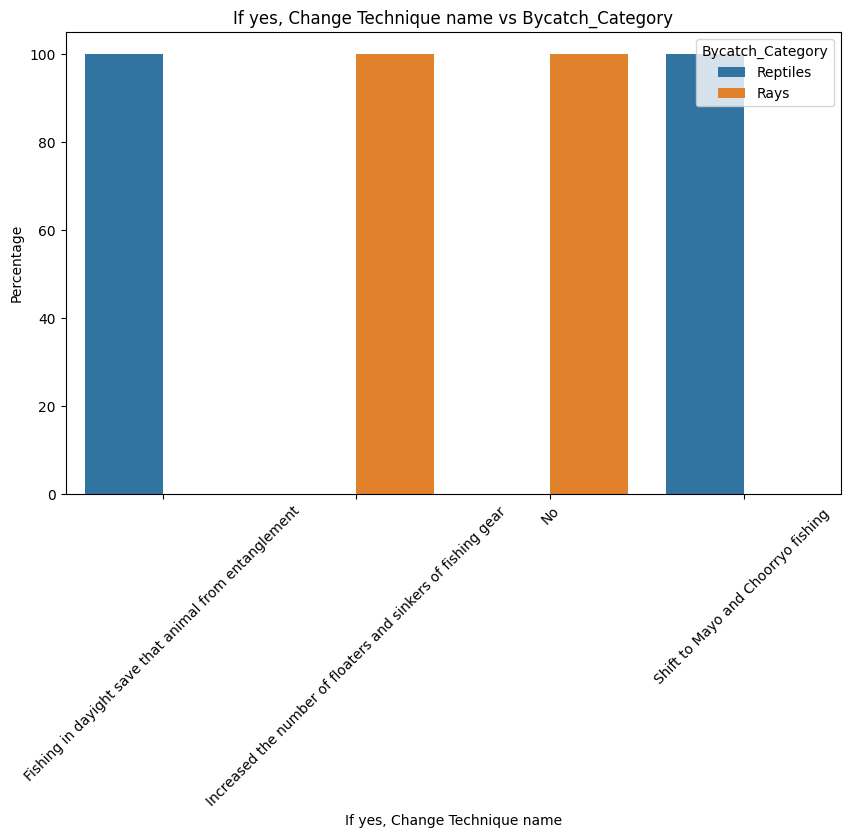

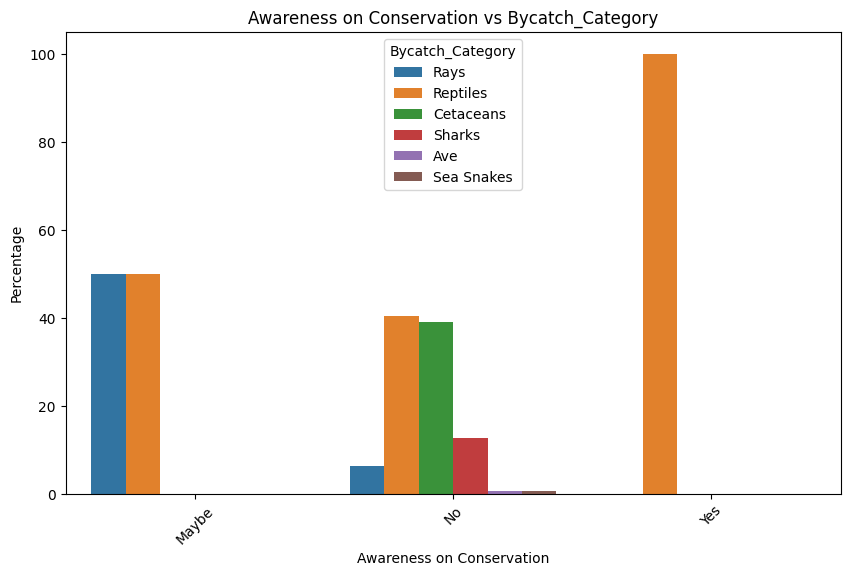

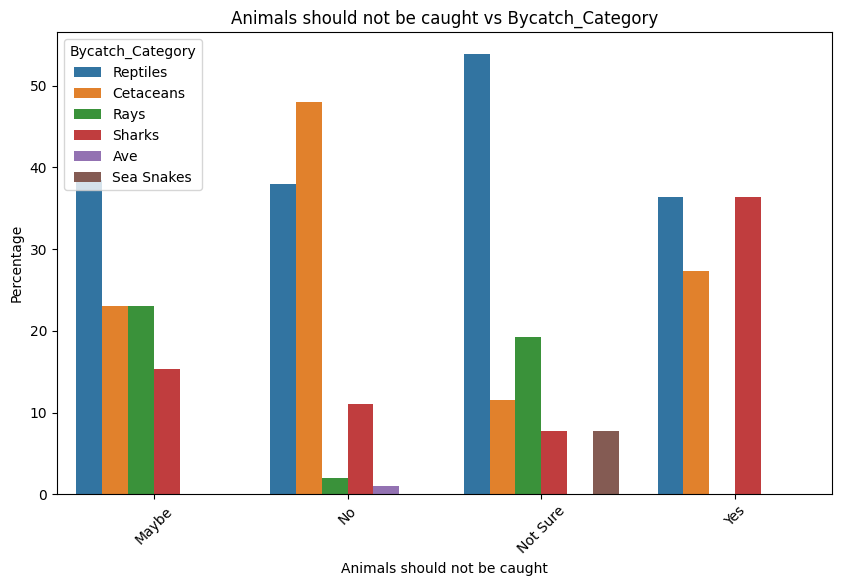

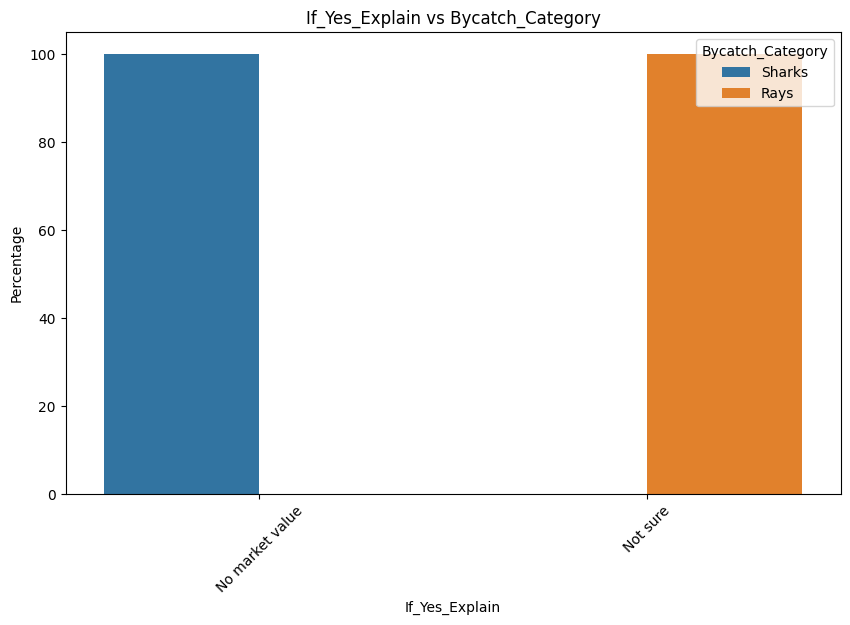

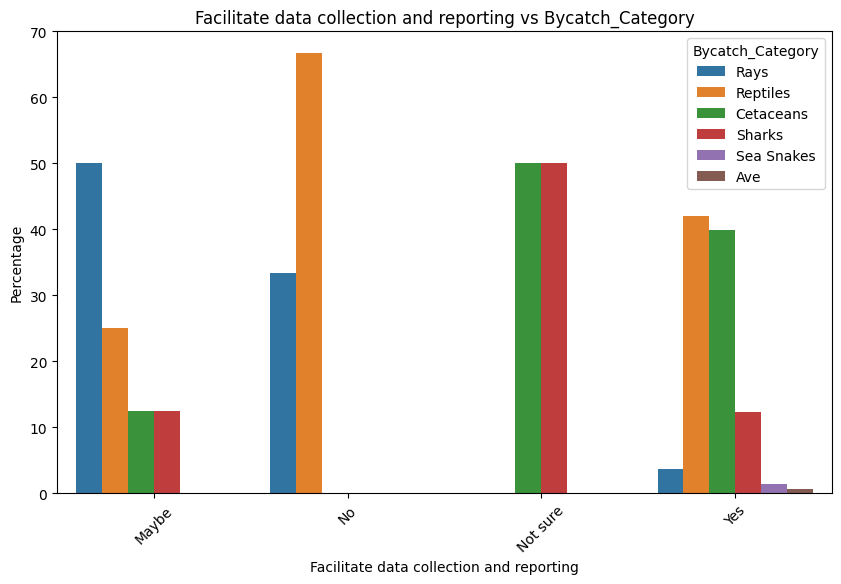

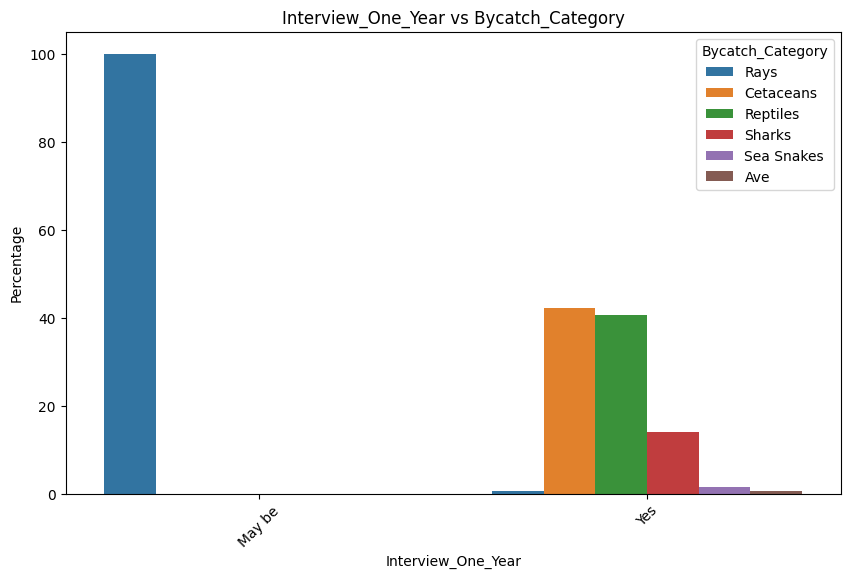

In [11]:
# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No', 'Dolphin_No', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Shifted Fishing Techniques','If yes, Change Technique name', 
                         'Awareness on Conservation','Animals should not be caught',
                         'If_Yes_Explain','Facilitate data collection and reporting', 'Interview_One_Year']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            plt.figure(figsize=(10, 6))
            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

  

# Correlation Analysis - No of Turtle and Dolphin vs Boat Size

Correlation Analysis:
             Boat_Sizeft  Turtle_No  Dolphin_No
Boat_Sizeft     1.000000  -0.187913   -0.166109
Turtle_No      -0.187913   1.000000    0.440662
Dolphin_No     -0.166109   0.440662    1.000000

Correlation Analysis:
Correlation coefficients for Turtle_No:
Boat_Sizeft   -0.187913
Turtle_No      1.000000
Dolphin_No     0.440662
Name: Turtle_No, dtype: float64

Correlation coefficients for Dolphin_No:
Boat_Sizeft   -0.166109
Turtle_No      0.440662
Dolphin_No     1.000000
Name: Dolphin_No, dtype: float64



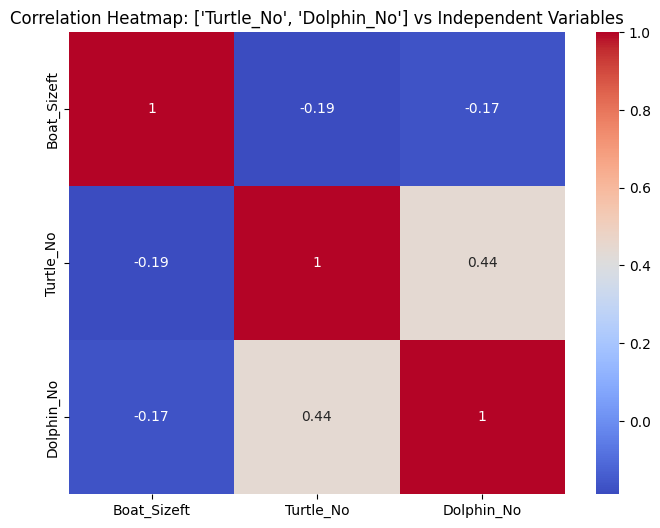

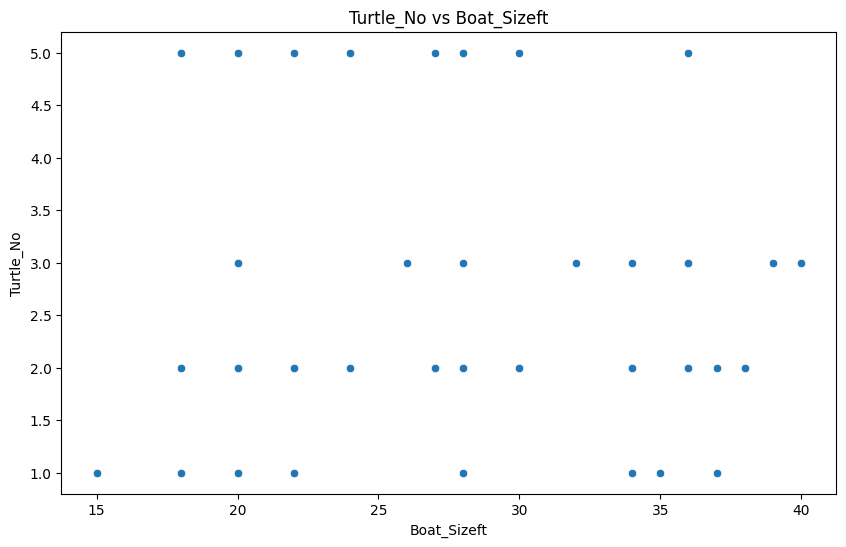

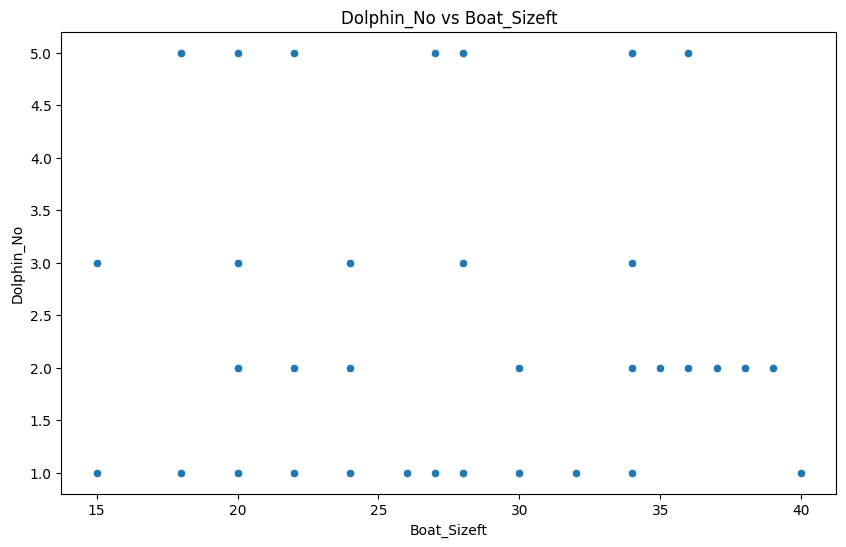

In [12]:
# Select the variables for correlation analysis
independent_variables = ['Boat_Sizeft']
dependent_variables = ['Turtle_No', 'Dolphin_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Perform correlation analysis
correlation_matrix = data.corr()


# Print the correlation coefficients
print("Correlation Analysis:")
print(correlation_matrix)
print()

# Print the correlation coefficients
print("Correlation Analysis:")
for dependent_variable in dependent_variables:
    print(f"Correlation coefficients for {dependent_variable}:")
    if dependent_variable in correlation_matrix:
        print(correlation_matrix[dependent_variable])
    else:
        print("Variable not found in the dataset.")
    print()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Heatmap: {dependent_variables} vs Independent Variables")
plt.show()

# Plot scatter plots of dependent variables against independent variables
for dependent_variable in dependent_variables:
    for independent_variable in independent_variables:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=independent_variable, y=dependent_variable)
        plt.title(f"{dependent_variable} vs {independent_variable}")
        plt.xlabel(independent_variable)
        plt.ylabel(dependent_variable)
        plt.show()


The given results show correlation analyses between three variables: Boat_Sizeft, Turtle_No, and Dolphin_No. Correlation measures the strength and direction of the linear relationship between two variables. Let's interpret the results:

1. Correlation Matrix:

The correlation matrix shows the correlation coefficients between each pair of variables:

- The correlation coefficient between Boat_Sizeft and Turtle_No is approximately -0.1879. This indicates a weak negative correlation between the boat size and the number of turtles observed. As boat size increases, the number of turtles observed tends to decrease slightly, but the correlation is not very strong.

- The correlation coefficient between Boat_Sizeft and Dolphin_No is approximately -0.1661. This also indicates a weak negative correlation between the boat size and the number of dolphins observed. As boat size increases, the number of dolphins observed tends to decrease slightly, but again, the correlation is not very strong.

- The correlation coefficient between Turtle_No and Dolphin_No is approximately 0.4407. This indicates a moderate positive correlation between the number of turtles and the number of dolphins observed. As the number of turtles observed increases, the number of dolphins observed also tends to increase.

2. Correlation Coefficients for Individual Variables:

The subsequent sections provide correlation coefficients for each variable separately:

- For the variable "Turtle_No":
  - The correlation coefficient with Boat_Sizeft is approximately -0.1879.
  - The correlation coefficient with Dolphin_No is approximately 0.4407.

- For the variable "Dolphin_No":
  - The correlation coefficient with Boat_Sizeft is approximately -0.1661.
  - The correlation coefficient with Turtle_No is approximately 0.4407.

Interpretation:

- Boat_Sizeft and Turtle_No have a weak negative correlation, indicating that as the boat size increases, the number of turtles observed tends to decrease slightly.

- Boat_Sizeft and Dolphin_No also have a weak negative correlation, indicating that as the boat size increases, the number of dolphins observed tends to decrease slightly.

- Turtle_No and Dolphin_No have a moderate positive correlation, suggesting that as the number of turtles observed increases, the number of dolphins observed also tends to increase.

It's important to note that correlation measures only linear relationships and does not imply causation. Additionally, the strength of the correlations is relatively weak, indicating that boat size is not a strong predictor of the number of turtles and dolphins observed. Other factors not considered in this analysis may have more significant influences on the observed numbers of turtles and dolphins.

# Correlation Analysis - Turtle and Dolphin vs Gear Lenght and Gear width

Correlation Analysis:
                  Gear_Length_(km)  Width (meters)  Turtle_No  Dolphin_No
Gear_Length_(km)          1.000000       -0.028450  -0.068967   -0.165946
Width (meters)           -0.028450        1.000000   0.118559    0.132273
Turtle_No                -0.068967        0.118559   1.000000    0.440662
Dolphin_No               -0.165946        0.132273   0.440662    1.000000

Correlation Analysis:
Correlation coefficients for Turtle_No:
Gear_Length_(km)   -0.068967
Width (meters)      0.118559
Turtle_No           1.000000
Dolphin_No          0.440662
Name: Turtle_No, dtype: float64

Correlation coefficients for Dolphin_No:
Gear_Length_(km)   -0.165946
Width (meters)      0.132273
Turtle_No           0.440662
Dolphin_No          1.000000
Name: Dolphin_No, dtype: float64



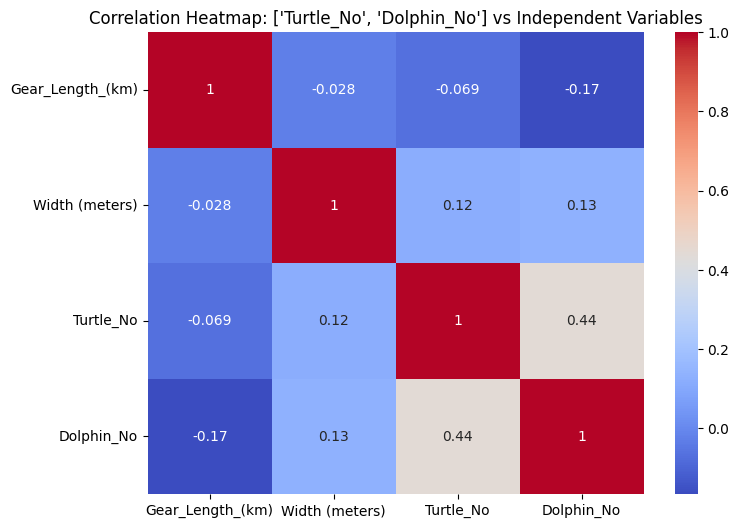

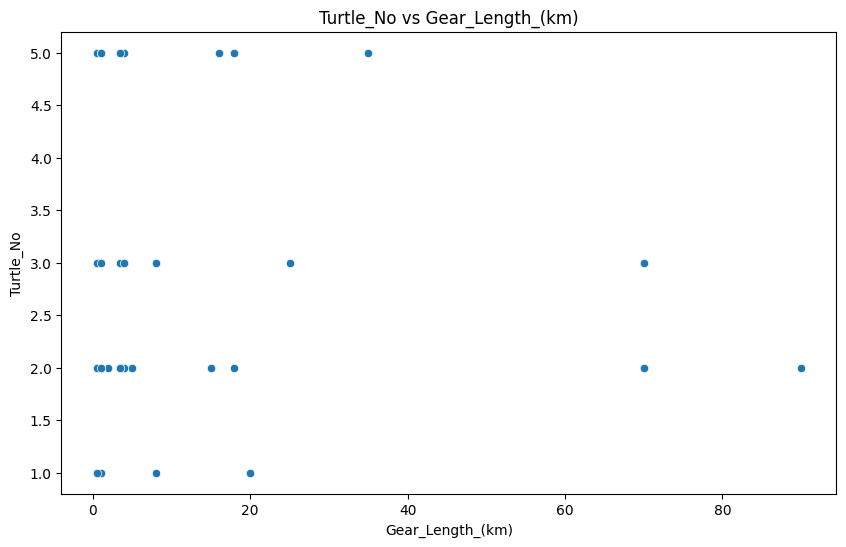

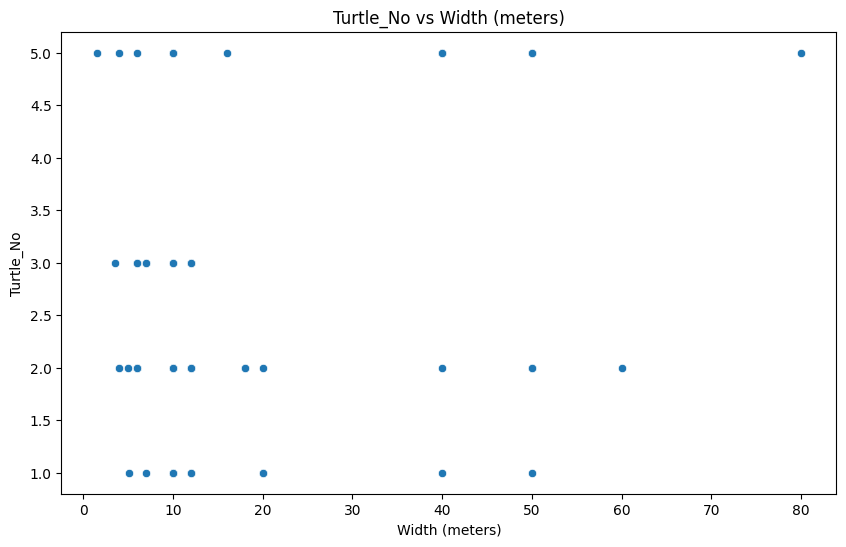

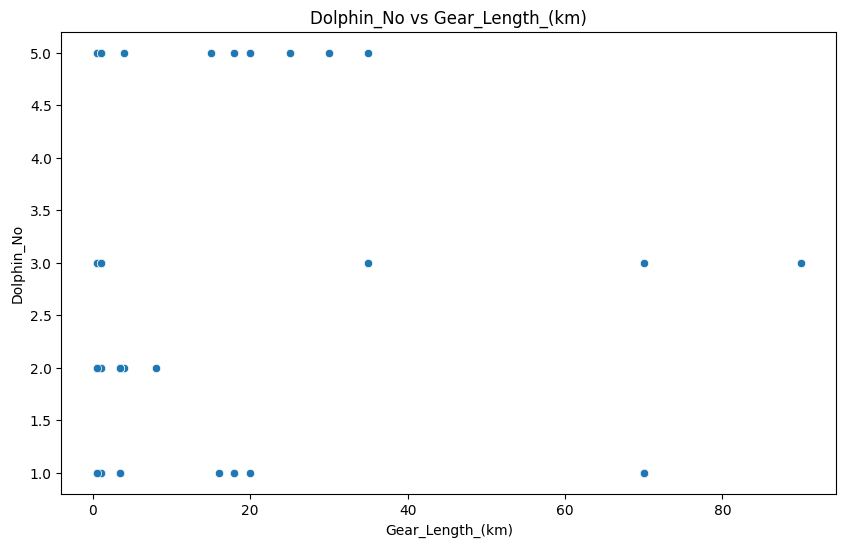

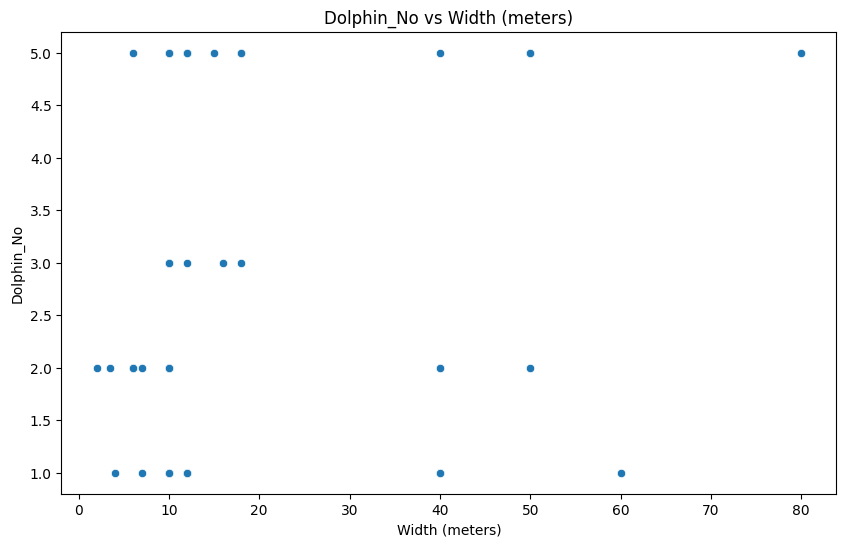

In [13]:

# Select the variables for correlation analysis
independent_variables = ['Gear_Length_(km)', 'Width (meters)']
dependent_variables = ['Turtle_No', 'Dolphin_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Perform correlation analysis
correlation_matrix = data.corr()


# Print the correlation coefficients
print("Correlation Analysis:")
print(correlation_matrix)
print()

# Print the correlation coefficients
print("Correlation Analysis:")
for dependent_variable in dependent_variables:
    print(f"Correlation coefficients for {dependent_variable}:")
    if dependent_variable in correlation_matrix:
        print(correlation_matrix[dependent_variable])
    else:
        print("Variable not found in the dataset.")
    print()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Heatmap: {dependent_variables} vs Independent Variables")
plt.show()

# Plot scatter plots of dependent variables against independent variables
for dependent_variable in dependent_variables:
    for independent_variable in independent_variables:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=independent_variable, y=dependent_variable)
        plt.title(f"{dependent_variable} vs {independent_variable}")
        plt.xlabel(independent_variable)
        plt.ylabel(dependent_variable)
        plt.show()


The given results show correlation analyses between four variables: Gear_Length_(km), Width (meters), Turtle_No, and Dolphin_No. Correlation measures the strength and direction of the linear relationship between two variables. 

1. Correlation Matrix:

The correlation matrix shows the correlation coefficients between each pair of variables:

- The correlation coefficient between Gear_Length_(km) and Width (meters) is approximately -0.0285. This indicates a very weak negative correlation between the gear length and width. As gear length increases, the width slightly decreases, but the correlation is almost negligible.

- The correlation coefficient between Gear_Length_(km) and Turtle_No is approximately -0.068967. This also indicates a very weak negative correlation between the gear length and the number of turtles observed. As gear length increases, the number of turtles observed slightly decreases, but the correlation is very weak.

- The correlation coefficient between Gear_Length_(km) and Dolphin_No is approximately -0.165946. Similarly, this indicates a weak negative correlation between the gear length and the number of dolphins observed. As gear length increases, the number of dolphins observed slightly decreases, but the correlation is still relatively weak.

- The correlation coefficient between Width (meters) and Turtle_No is approximately 0.118559. This indicates a weak positive correlation between the width and the number of turtles observed. As width increases, the number of turtles observed slightly increases.

- The correlation coefficient between Width (meters) and Dolphin_No is approximately 0.132273. This also indicates a weak positive correlation between the width and the number of dolphins observed. As width increases, the number of dolphins observed slightly increases.

- The correlation coefficient between Turtle_No and Dolphin_No is approximately 0.440662. This indicates a moderate positive correlation between the number of turtles and the number of dolphins observed. As the number of turtles observed increases, the number of dolphins observed also tends to increase.

2. Correlation Coefficients for Individual Variables:

The subsequent sections provide correlation coefficients for each variable separately:

- For the variable "Turtle_No":
  - The correlation coefficient with Gear_Length_(km) is approximately -0.068967.
  - The correlation coefficient with Width (meters) is approximately 0.118559.
  - The correlation coefficient with Dolphin_No is approximately 0.440662.

- For the variable "Dolphin_No":
  - The correlation coefficient with Gear_Length_(km) is approximately -0.165946.
  - The correlation coefficient with Width (meters) is approximately 0.132273.
  - The correlation coefficient with Turtle_No is approximately 0.440662.

Interpretation:

- There is no substantial correlation between gear length and width, as indicated by the very weak negative correlation coefficient.

- There is a very weak negative correlation between gear length and the number of turtles and dolphins observed. As gear length increases, the number of turtles and dolphins observed slightly decreases, but the correlations are very weak.

- There is a weak positive correlation between the width and the number of turtles and dolphins observed. As width increases, the number of turtles and dolphins observed slightly increases.

- There is a moderate positive correlation between the number of turtles and the number of dolphins observed. As the number of turtles observed increases, the number of dolphins observed also tends to increase.

Overall, the correlations are relatively weak, suggesting that there might be other factors at play in influencing the relationships between these variables. Additionally, it's essential to keep in mind that correlation does not imply causation, and further analysis would be needed to understand the underlying relationships between these variables.

# Liner Regression of Turtle vs Boat Size 

Regression results for Turtle_No:
                            OLS Regression Results                            
Dep. Variable:              Turtle_No   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.148
Date:                Thu, 27 Jul 2023   Prob (F-statistic):             0.0796
Time:                        17:17:41   Log-Likelihood:                -162.31
No. Observations:                  88   AIC:                             328.6
Df Residuals:                      86   BIC:                             333.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           

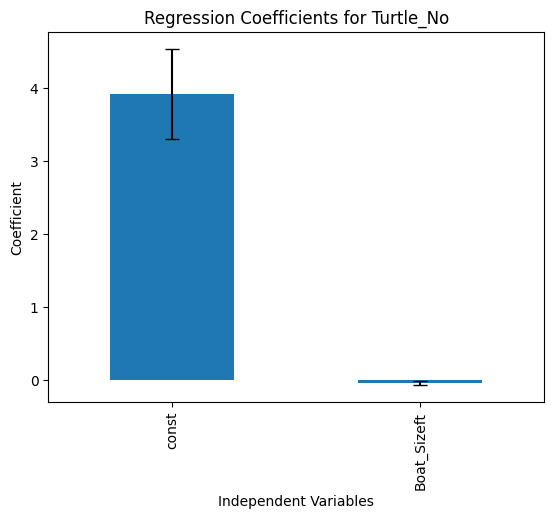

In [14]:

# Select the independent and dependent variables
independent_variables = ['Boat_Sizeft']
dependent_variables = ['Turtle_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Drop rows with missing or infinite values
data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Split the data into X (independent variables) and y (dependent variables)
X = data[independent_variables]
X = sm.add_constant(X)
y = data[dependent_variables]

# Fit separate linear regression models for each dependent variable
models = []
for col in y.columns:
    model = sm.OLS(y[col], X).fit()
    models.append(model)

# Print the regression results
for model, col in zip(models, y.columns):
    print(f"Regression results for {col}:")
    print(model.summary())
    print()

    # Display the results in a table
    results_table = model.summary().tables[1]
    print(results_table)

    # Plot the coefficients
    coefficients = model.params
    coefficients.plot(kind='bar', yerr=model.bse, capsize=5)
    plt.xlabel("Independent Variables")
    plt.ylabel("Coefficient")
    plt.title(f"Regression Coefficients for {col}")
    plt.show()


Regression results for turtles 

The given results are from a simple linear regression analysis for the variable "Turtle_No" with respect to the predictor variable "Boat_Sizeft." The regression aims to understand the relationship between the number of turtles observed ("Turtle_No") and the size of the boat ("Boat_Sizeft"). 

1. Model Summary:
   - R-squared: R-squared is a measure of how well the model explains the variability in the dependent variable. In this case, R-squared is 0.035, which means that approximately 3.5% of the variation in the number of turtles observed can be explained by the boat size.
   - Adj. R-squared: This is the adjusted R-squared, which takes into account the number of predictors in the model. It is 0.024, slightly lower than the R-squared.
   - F-statistic: The F-statistic tests the overall significance of the model. Here, it has a value of 3.148, and the associated probability (Prob (F-statistic)) is 0.0796, indicating that the model is not statistically significant at a significance level of 0.05.

2. Regression Coefficients:
   - The regression equation for the model is: Turtle_No = 3.9267 - 0.0418 * Boat_Sizeft
   - "const" represents the intercept of the regression line, which is 3.9267. It means that when the boat size is zero (which is not practically meaningful), the estimated number of turtles observed is 3.9267.
   - "Boat_Sizeft" is the coefficient for the predictor variable. It has a value of -0.0418, indicating that for each one-unit increase in boat size (in feet), the estimated number of turtles observed decreases by 0.0418.

3. Statistical Significance of Coefficients:
   - P>|t|: This column provides the p-value associated with each coefficient estimate. In this case, the p-value for "Boat_Sizeft" is 0.080, which is greater than the significance level of 0.05. Therefore, the coefficient for "Boat_Sizeft" is not statistically significant, indicating that there is no strong evidence of a relationship between boat size and the number of turtles observed.

4. Other Statistics:
   - Omnibus: A test for the normality of the residuals. Here, the p-value is 0.000, indicating that the residuals are not normally distributed.
   - Durbin-Watson: A test for autocorrelation (dependence) in the residuals. A value close to 2 (here, it's 0.686) suggests no significant autocorrelation.
   - Jarque-Bera (JB): Another test for normality. The p-value is 0.0220, indicating that the residuals are close to being normally distributed.
   - Skewness and Kurtosis: These statistics describe the shape of the distribution of the residuals.

Interpretation:

The regression analysis shows that there is no statistically significant relationship between the boat size and the number of turtles observed. The low R-squared value suggests that boat size does not explain much of the variability in the number of turtles observed. Additionally, the p-value for the coefficient of "Boat_Sizeft" is 0.080, which is slightly above the 0.05 significance level. This indicates that the relationship between boat size and the number of turtles observed is not statistically significant at the conventional 0.05 significance level.



# Liner Regression of Dolphin vs Boat Size 

Regression results for Dolphin_No:
                            OLS Regression Results                            
Dep. Variable:             Dolphin_No   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.669
Date:                Thu, 27 Jul 2023   Prob (F-statistic):              0.195
Time:                        17:17:41   Log-Likelihood:                -144.02
No. Observations:                  76   AIC:                             294.0
Df Residuals:                      73   BIC:                             301.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const

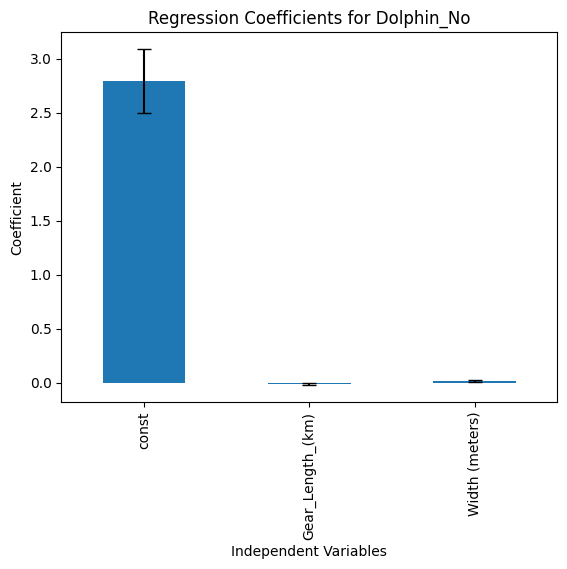

In [15]:

# Select the independent and dependent variables
independent_variables = ['Gear_Length_(km)', 'Width (meters)']
dependent_variables = [ 'Dolphin_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Drop rows with missing or infinite values
data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Split the data into X (independent variables) and y (dependent variables)
X = data[independent_variables]
X = sm.add_constant(X)
y = data[dependent_variables]

# Fit separate linear regression models for each dependent variable
models = []
for col in y.columns:
    model = sm.OLS(y[col], X).fit()
    models.append(model)

# Print the regression results
for model, col in zip(models, y.columns):
    print(f"Regression results for {col}:")
    print(model.summary())
    print()

    # Display the results in a table
    results_table = model.summary().tables[1]
    print(results_table)

    # Plot the coefficients
    coefficients = model.params
    coefficients.plot(kind='bar', yerr=model.bse, capsize=5)
    plt.xlabel("Independent Variables")
    plt.ylabel("Coefficient")
    plt.title(f"Regression Coefficients for {col}")
    plt.show()


Regression for dolphins 

The given results are from a multiple linear regression analysis for the variable "Dolphin_No" with respect to two predictor variables: "Gear_Length_(km)" and "Width (meters)." The regression aims to understand the relationship between the number of dolphins observed ("Dolphin_No") and the two predictor variables. Let's interpret the results step by step:

1. Model Summary:
   - R-squared: R-squared is a measure of how well the model explains the variability in the dependent variable. In this case, R-squared is 0.044, which means that approximately 4.4% of the variation in the number of dolphins observed can be explained by the two predictor variables.
   - Adj. R-squared: This is the adjusted R-squared, which takes into account the number of predictors in the model. It is 0.018, indicating that the adjusted R-squared is even lower, suggesting that the model is not a good fit for the data.
   - F-statistic: The F-statistic tests the overall significance of the model. Here, it has a value of 1.669, and the associated probability (Prob (F-statistic)) is 0.195, indicating that the model is not statistically significant at a significance level of 0.05.

2. Regression Coefficients:
   - The regression equation for the model is: Dolphin_No = 2.7935 - 0.0125 * Gear_Length_(km) + 0.0143 * Width (meters)
   - "const" represents the intercept of the regression line, which is 2.7935. It means that when the predictor variables (Gear_Length_(km) and Width (meters)) are both zero (which might not be practically meaningful), the estimated number of dolphins observed is 2.7935.
   - "Gear_Length_(km)" is one of the predictor variables, and it has a coefficient of -0.0125. This coefficient suggests that for each one-unit increase in gear length (in kilometers), the estimated number of dolphins observed decreases by 0.0125, but the coefficient is not statistically significant (P>|t| = 0.161 > 0.05).
   - "Width (meters)" is the other predictor variable, and it has a coefficient of 0.0143. This coefficient suggests that for each one-unit increase in width (in meters), the estimated number of dolphins observed increases by 0.0143, but the coefficient is also not statistically significant (P>|t| = 0.270 > 0.05).

3. Statistical Significance of Coefficients:
   - P>|t|: This column provides the p-value associated with each coefficient estimate. In this case, the p-values for both "Gear_Length_(km)" and "Width (meters)" are greater than the significance level of 0.05. Therefore, neither of the predictor variables is statistically significant, indicating that there is no strong evidence of a relationship between these variables and the number of dolphins observed.

4. Other Statistics:
   - Omnibus: A test for the normality of the residuals. Here, the p-value is 0.000, indicating that the residuals are not normally distributed.
   - Durbin-Watson: A test for autocorrelation (dependence) in the residuals. A value close to 2 (here, it's 0.979) suggests no significant autocorrelation.
   - Jarque-Bera (JB): Another test for normality. The p-value is 0.0195, indicating that the residuals are close to being normally distributed.
   - Skewness and Kurtosis: These statistics describe the shape of the distribution of the residuals.

Interpretation:

The multiple linear regression analysis indicates that neither "Gear_Length_(km)" nor "Width (meters)" have statistically significant relationships with the number of dolphins observed ("Dolphin_No"). The low R-squared value suggests that the two predictor variables explain only a small portion of the variability in the number of dolphins observed. The F-statistic also confirms that the overall model is not statistically significant, indicating that the model is not a good fit for the data.



Further investigation, data collection, and analysis may be needed to better understand the factors influencing the number of bycatch species(turtle/ dolphins) observed.